In [7]:
import geopandas as gpd
import pandas as pd
import numpy as np

import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob

In [ ]:
# Check 

In [241]:
# Set Paths
ROOT = Path("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/")
AUXDATA = Path(f"{ROOT}/aux_data")
RESULTS = Path(f"{ROOT}/calibration_results/run_standard/wflow_sbm/")

# Set Config
basins_shp = f"{AUXDATA}/CAMELS-GB/data/CAMELS_GB_catchment_boundaries/CAMELS_GB_catchment_boundaries.shp"
results_csv = f"{ROOT}/evaluation_results/calibration_overview_wflow.csv"

hydrogeo_file = f"{AUXDATA}/CAMELS-GB/data/CAMELS_GB_hydrogeology_attributes.csv"
soil_file = "/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/aux_data/CAMELS-GB/data/CAMELS_GB_soil_attributes.csv"
human_file = "/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/aux_data/CAMELS-GB/data/CAMELS_GB_humaninfluence_attributes.csv"
topo_file = "/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/aux_data/CAMELS-GB/data/CAMELS_GB_topographic_attributes.csv"
land_file = "/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/aux_data/CAMELS-GB/data/CAMELS_GB_landcover_attributes.csv"
hydro_file = "/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/aux_data/CAMELS-GB/data/CAMELS_GB_hydrologic_attributes.csv"
hydrometry_file = "/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/aux_data/CAMELS-GB/data/CAMELS_GB_hydrometry_attributes.csv"
climate_file = "/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/aux_data/CAMELS-GB/data/CAMELS_GB_climatic_attributes.csv"

In [242]:
# Read shapefile
gdf = gpd.read_file(basins_shp)
gdf = gdf.set_index('ID_STRING')
gdf.index = gdf.index.astype(int)

# Reproject shapefile
gdf = gdf.to_crs({'init':'epsg:4326'})
gdf['centroid'] = gdf.centroid.to_crs("EPSG:4326")

/home/jaerts/miniconda3/envs/wflow_state_flux/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/scratch-local/jaerts.1636796/ipykernel_2007344/1606819374.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid.to_crs("EPSG:4326")


In [243]:
# Load results dataframe
df = pd.read_csv(results_csv, index_col='basin_id')

# Merge results and shapefile
gdf_results = gdf.merge(df, left_index=True, right_index=True, how="inner")
gdf_results = gdf_results.set_geometry("centroid")
len(gdf_results)


618

# GEO

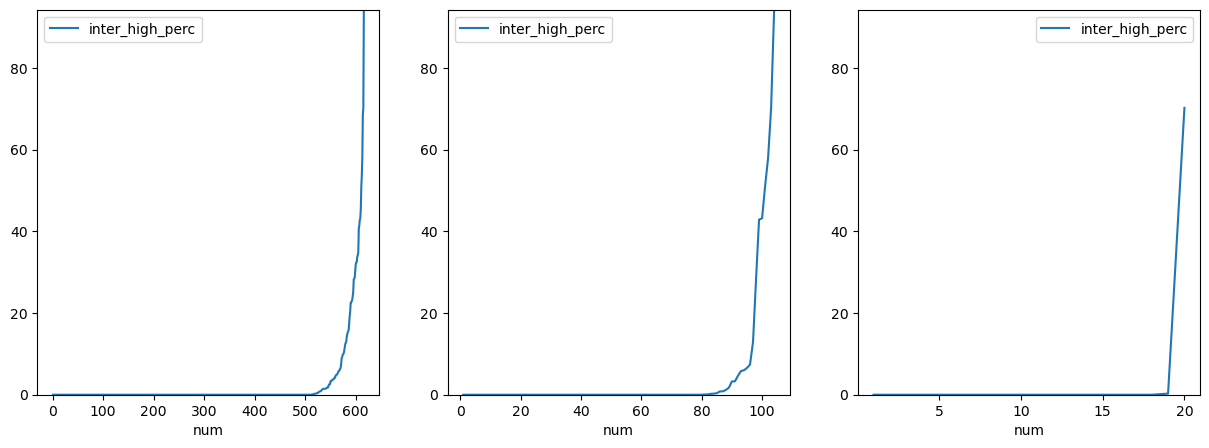

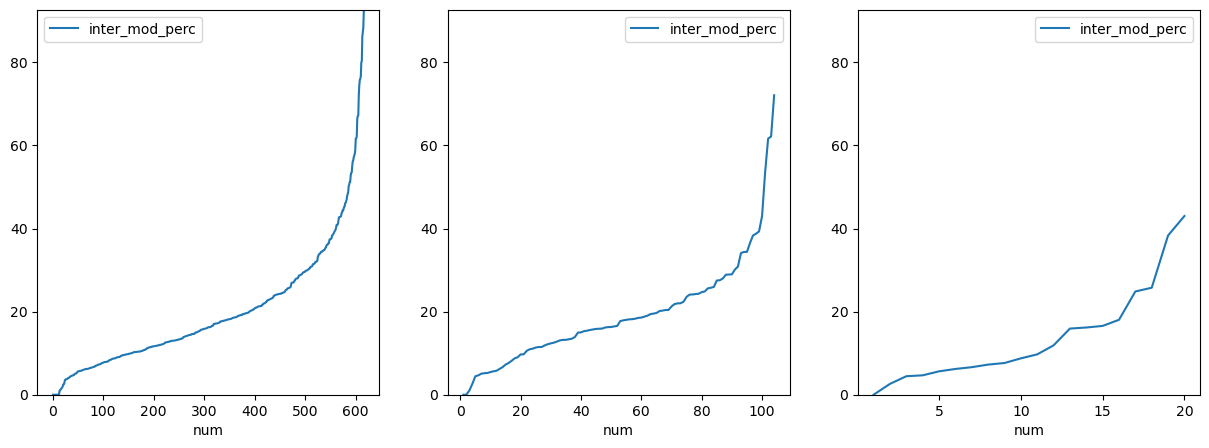

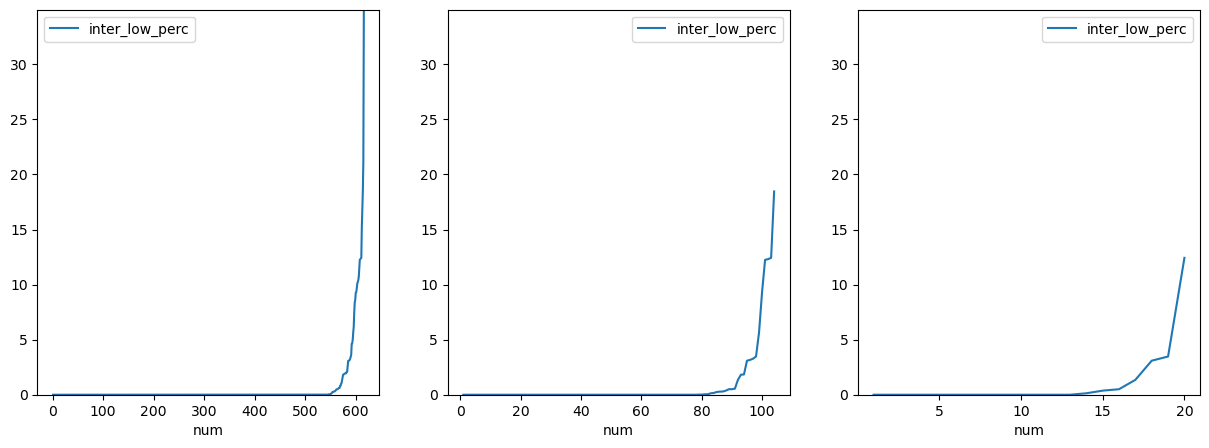

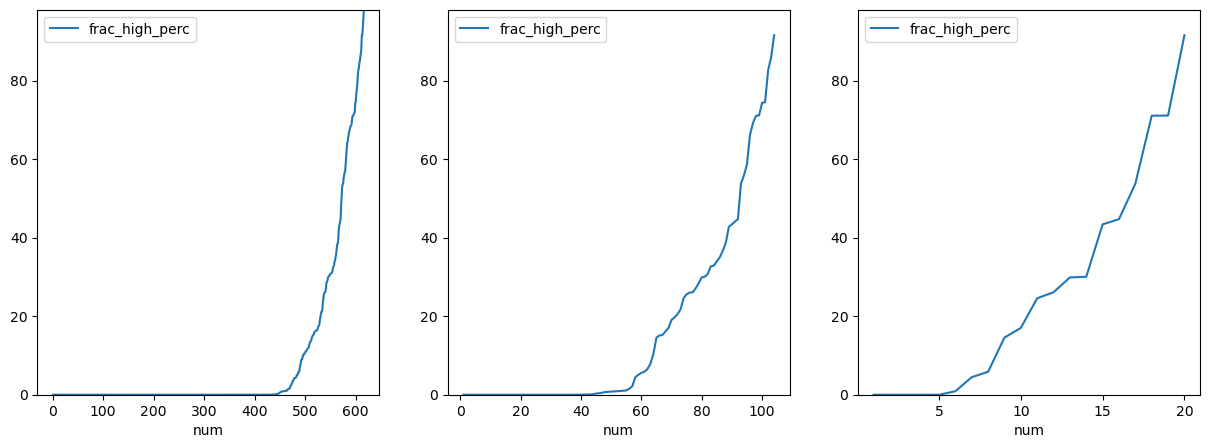

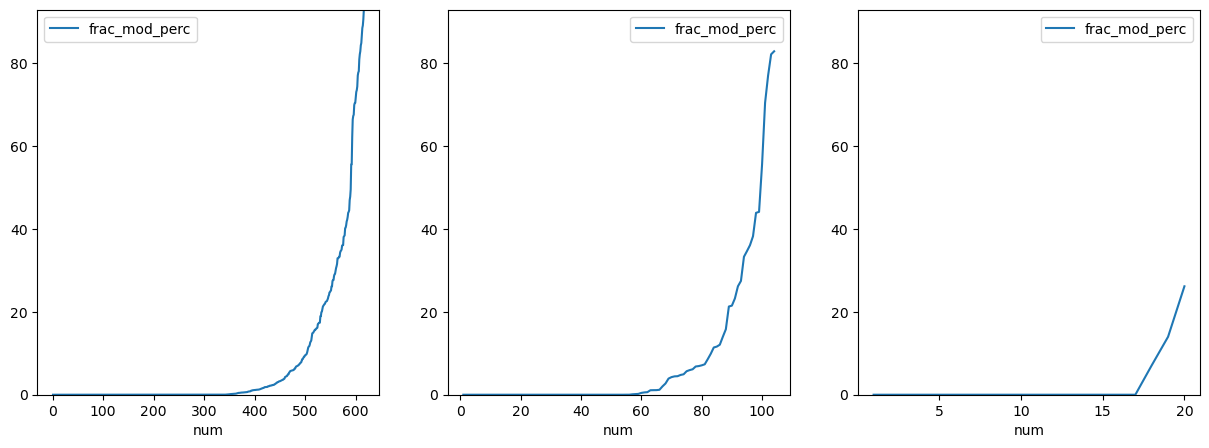

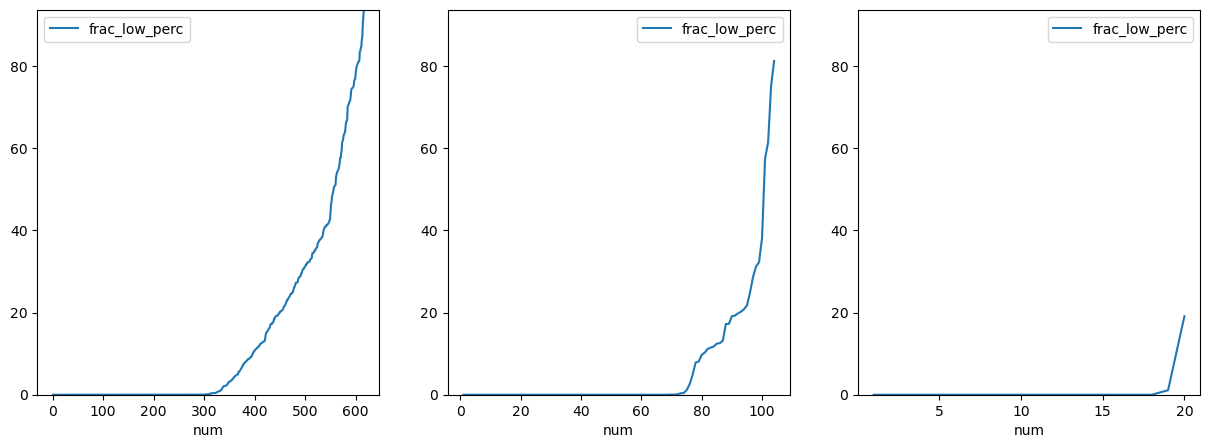

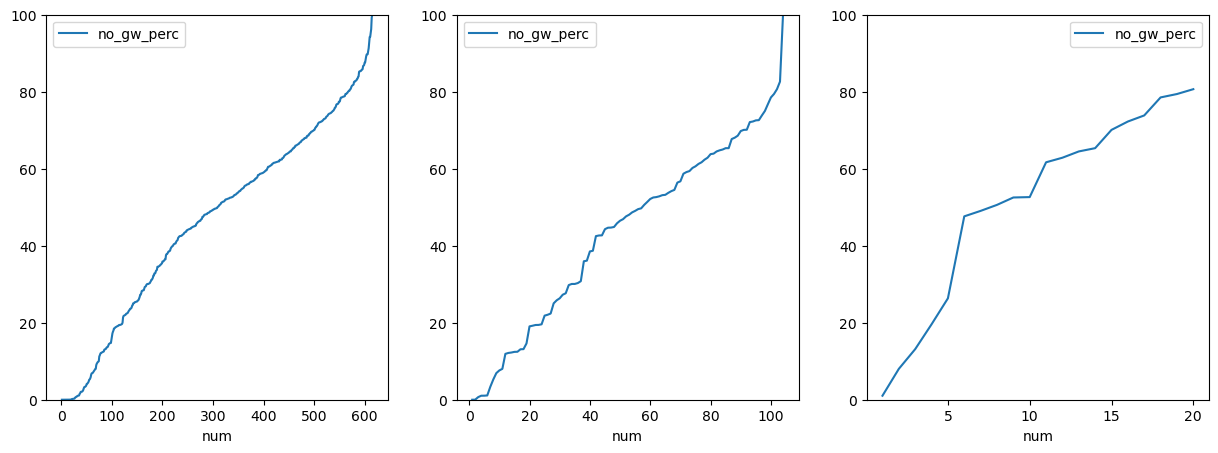

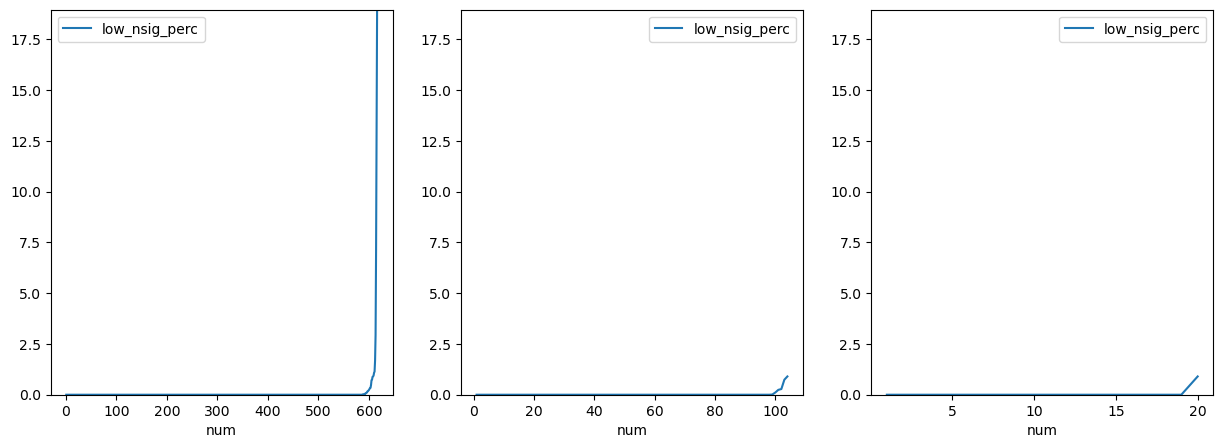

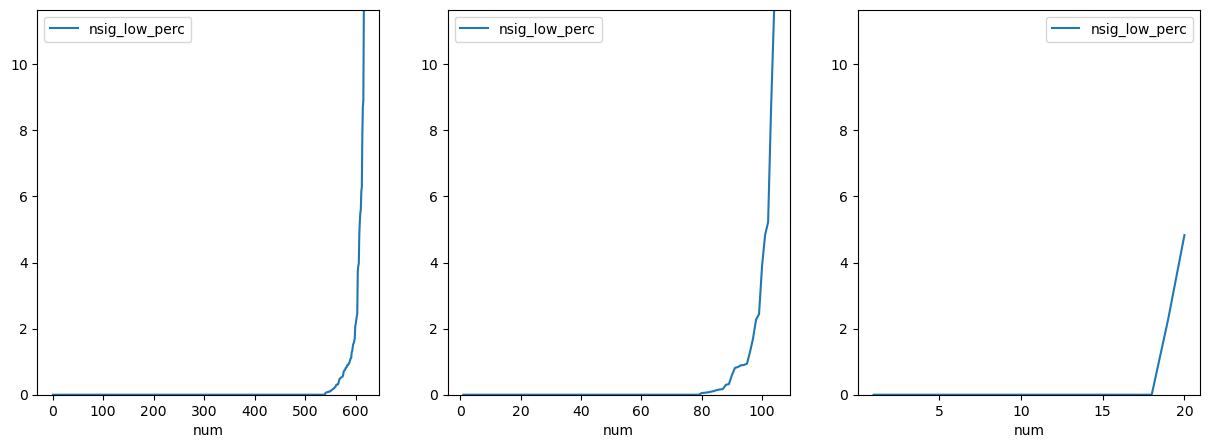

In [250]:
df = pd.read_csv(hydrogeo_file, index_col='gauge_id')

gdf_all = gdf_results[gdf_results.kge_np  < 1]
gdf_all = gdf_all['kge_np'].to_frame()
gdf_all = gdf_all.join(df)

gdf_small = gdf_results[gdf_results.kge_np  < 0]
gdf_small = gdf_small['kge_np'].to_frame()
gdf_small = gdf_small.join(df)

gdf_low = gdf_results[gdf_results.kge_np  < -1]
gdf_low = gdf_low['kge_np'].to_frame()
gdf_low = gdf_low.join(df)

for column in df.columns:
    fig, axes = plt.subplots(1,3,figsize=(15, 5))

    gdf_all = gdf_all.sort_values(by=column)
    gdf_all['num'] = list(range(1,len(gdf_all)+1))
    gdf_all = gdf_all.set_index('num')
    gdf_all[column].plot(ax=axes[0],label=column).legend()
    
    gdf_small = gdf_small.sort_values(by=column)
    gdf_small['num'] = list(range(1,len(gdf_small)+1))
    gdf_small = gdf_small.set_index('num')
    gdf_small[column].plot(ax=axes[1],label=column).legend()
    
    #edfsdf
    gdf_low = gdf_low.sort_values(by=column)
    gdf_low['num'] = list(range(1,len(gdf_low)+1))
    gdf_low = gdf_low.set_index('num')
    gdf_low[column].plot(ax=axes[2],label=column).legend()
    
    axes[0].set_ylim([0, gdf_all[column].max()])
    axes[1].set_ylim([0, gdf_all[column].max()])
    axes[2].set_ylim([0, gdf_all[column].max()])
    
    plt.show()
    

# Soil

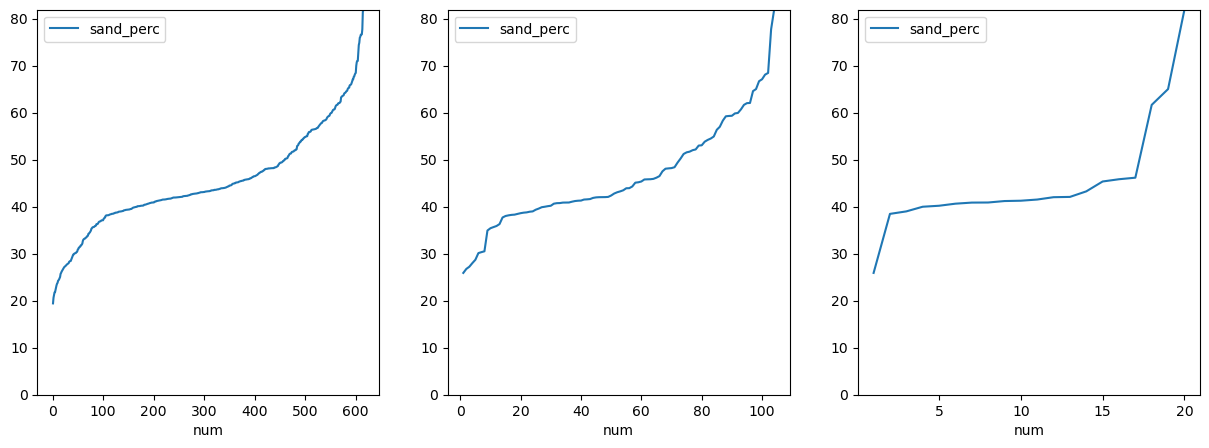

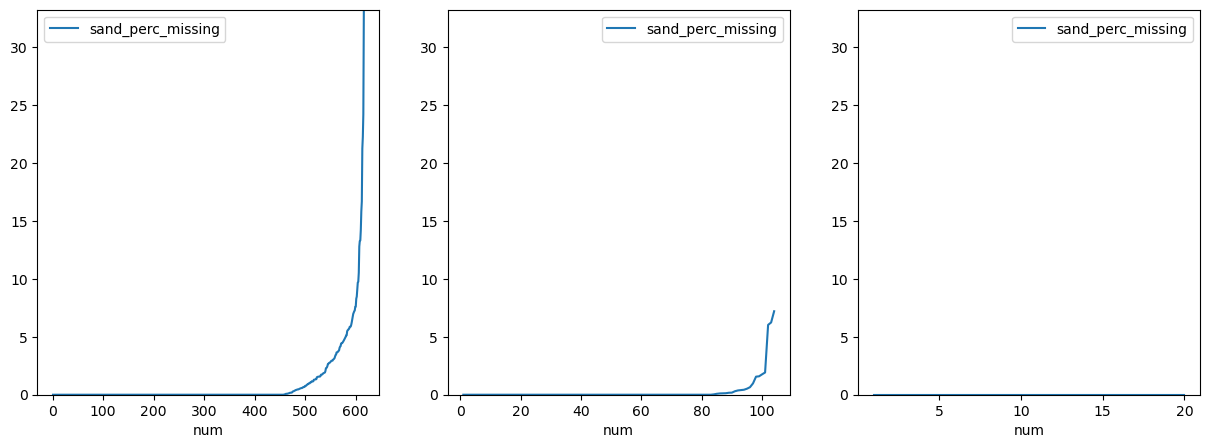

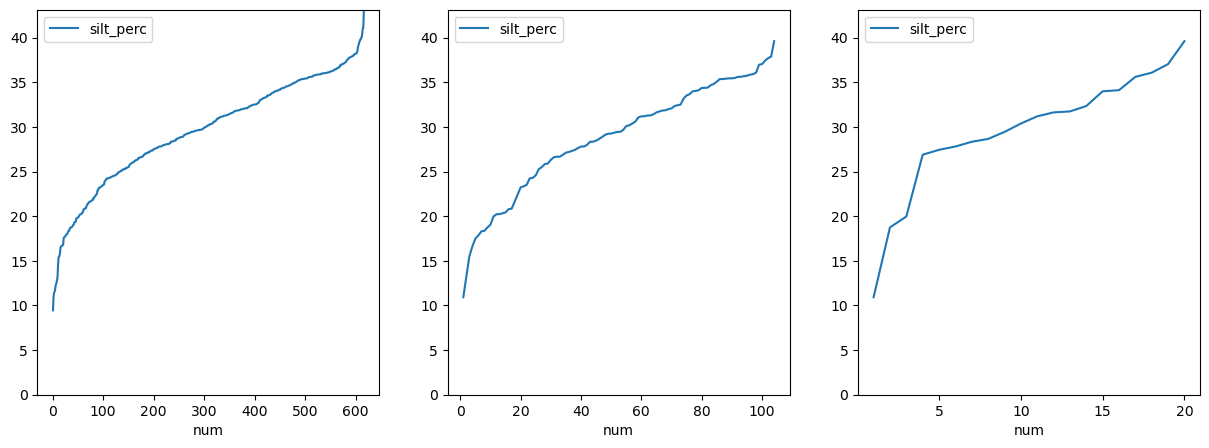

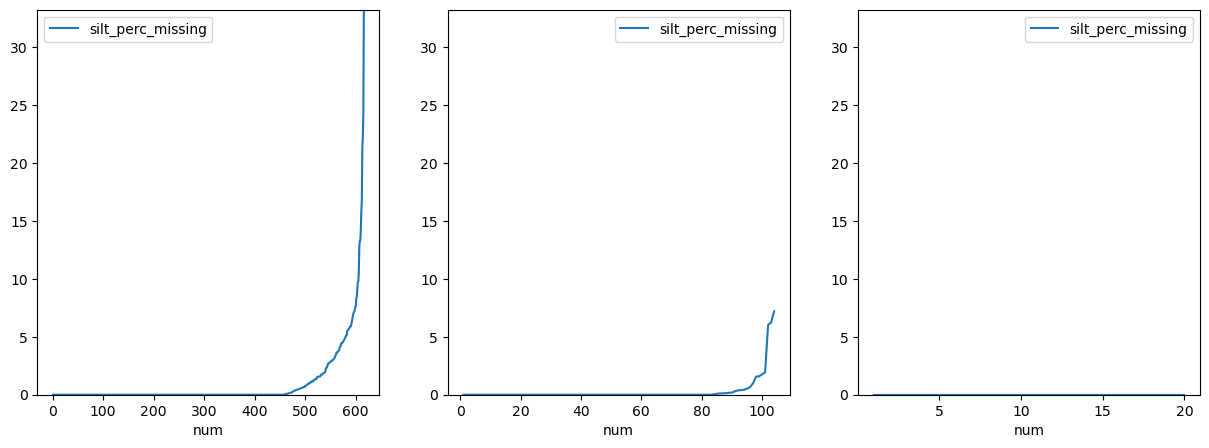

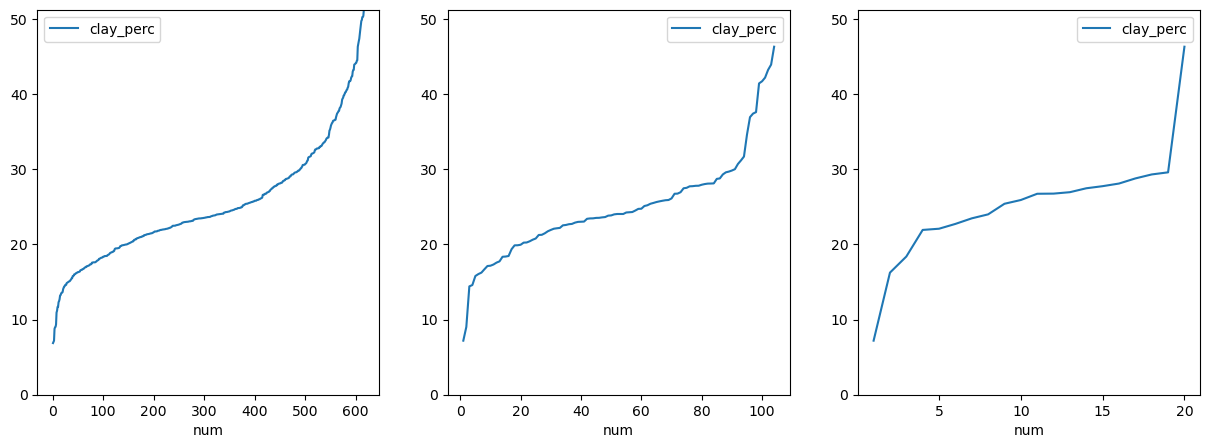

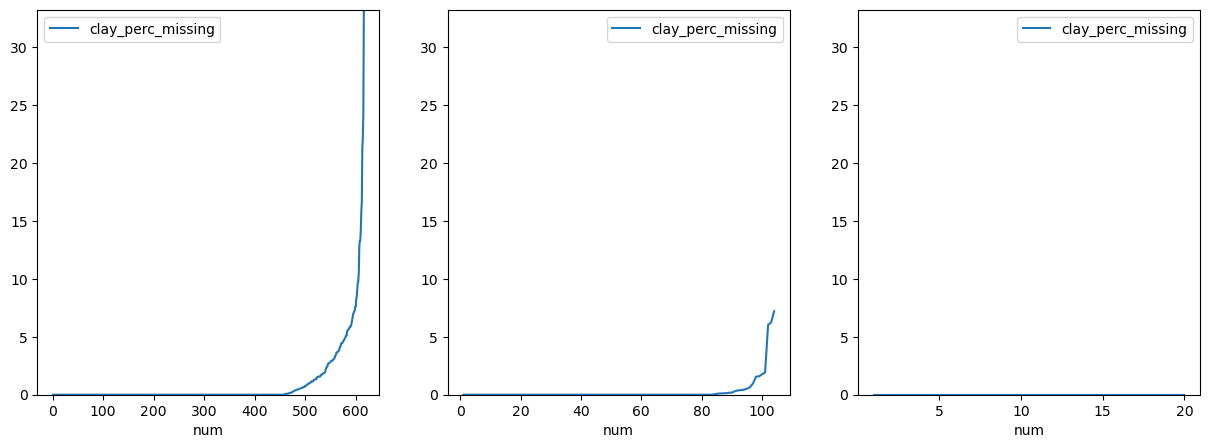

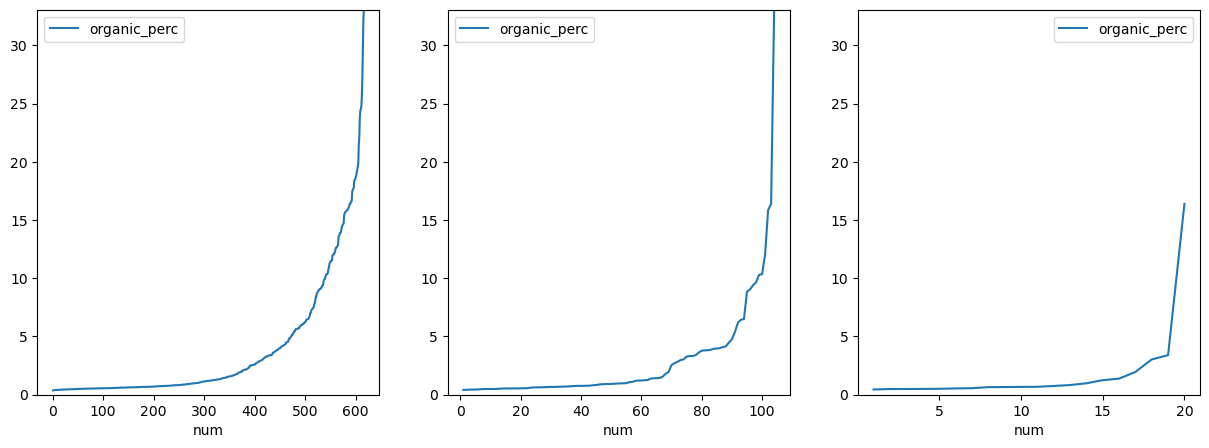

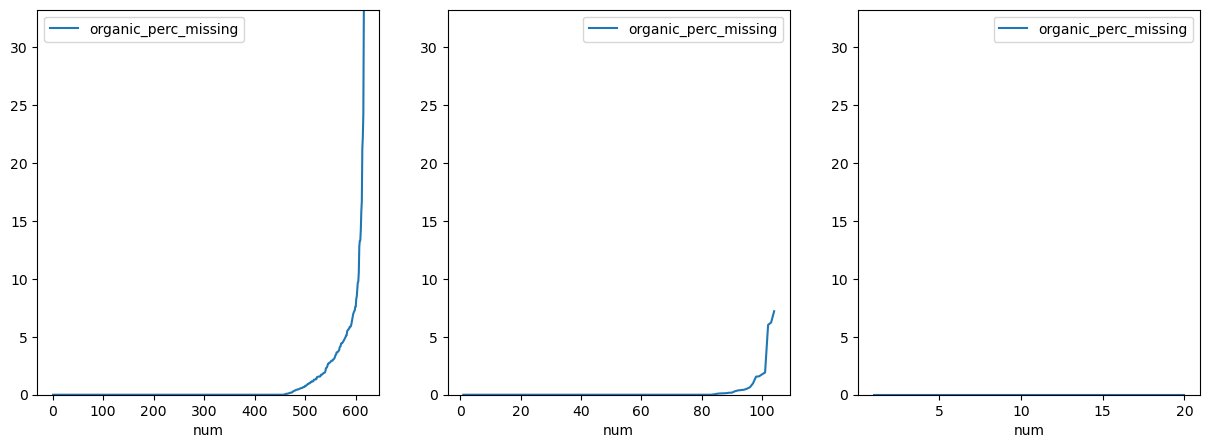

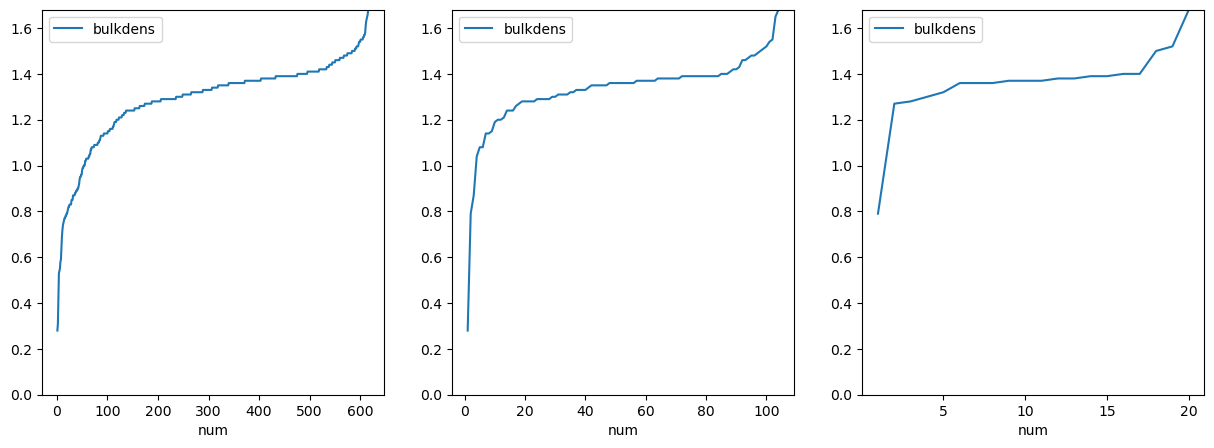

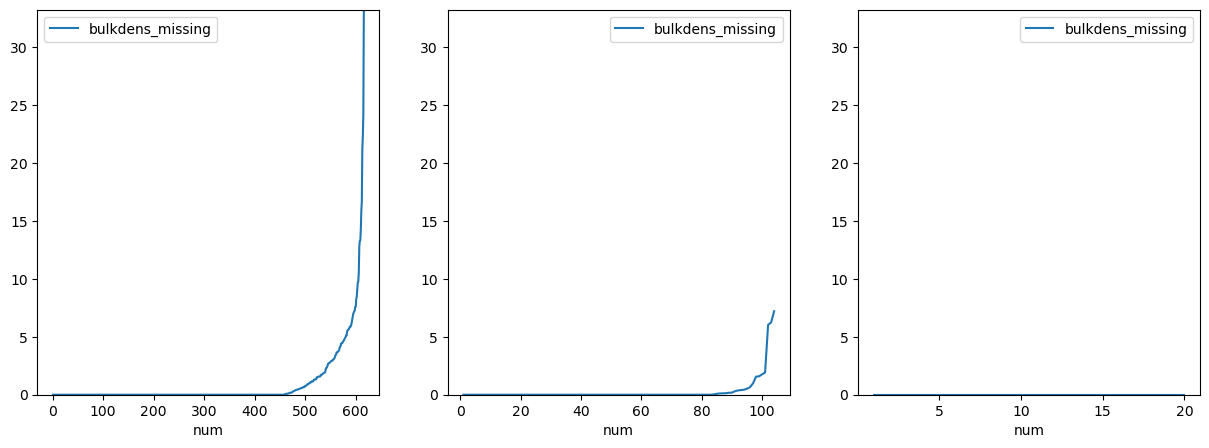

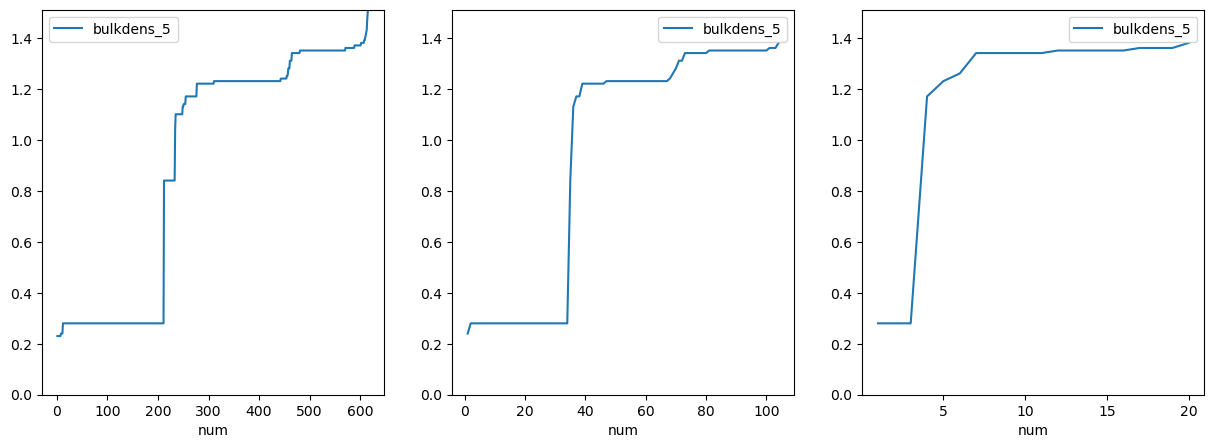

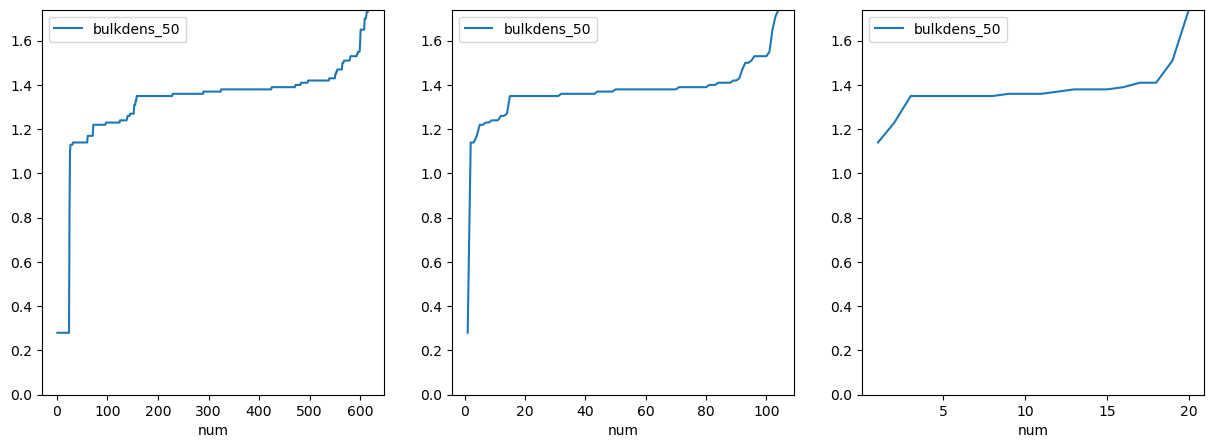

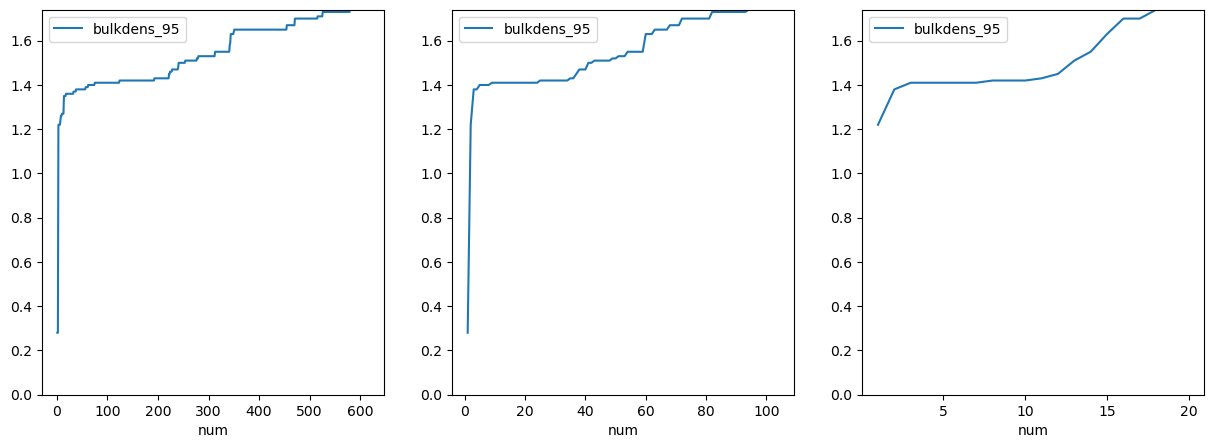

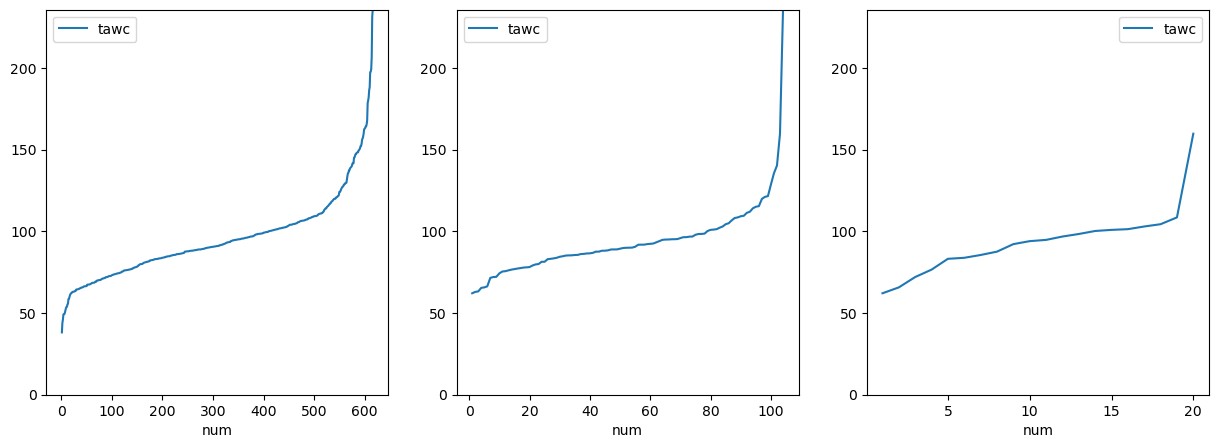

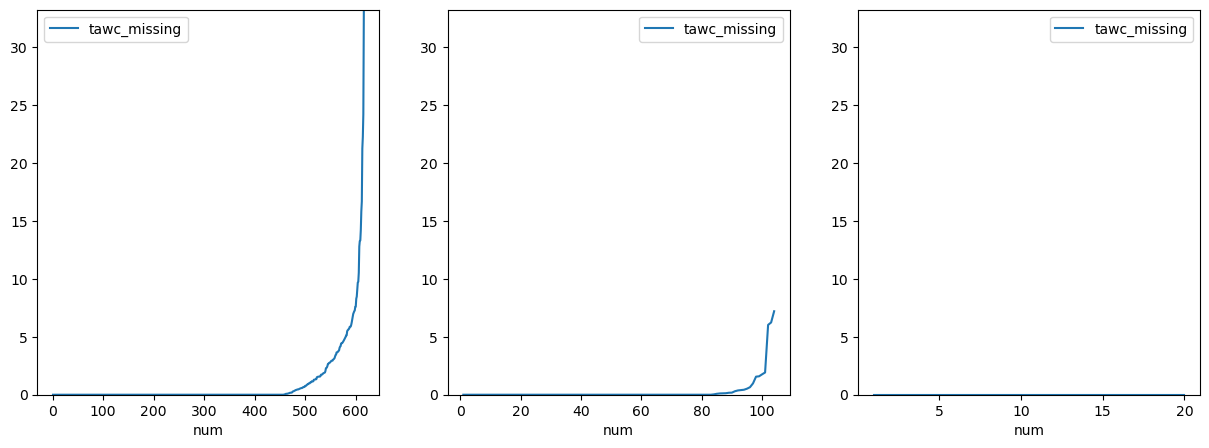

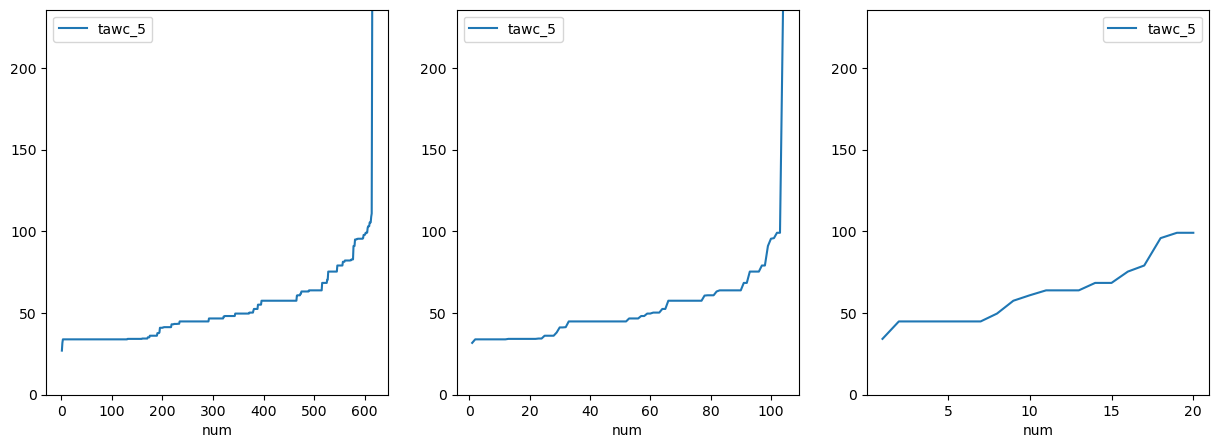

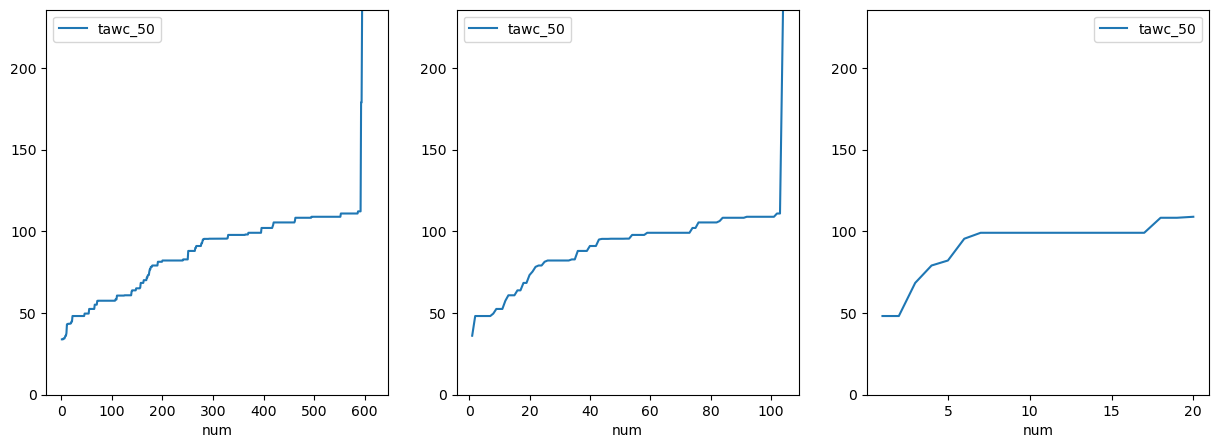

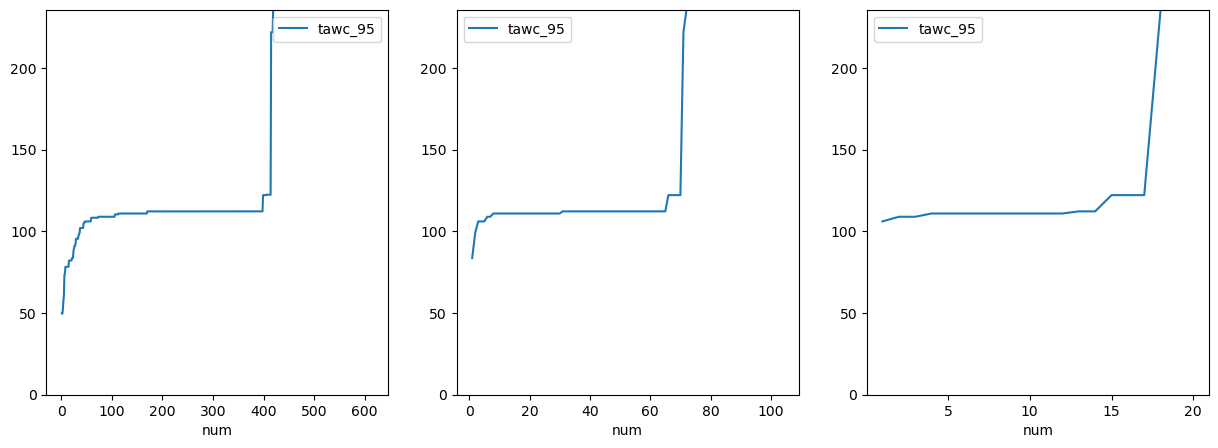

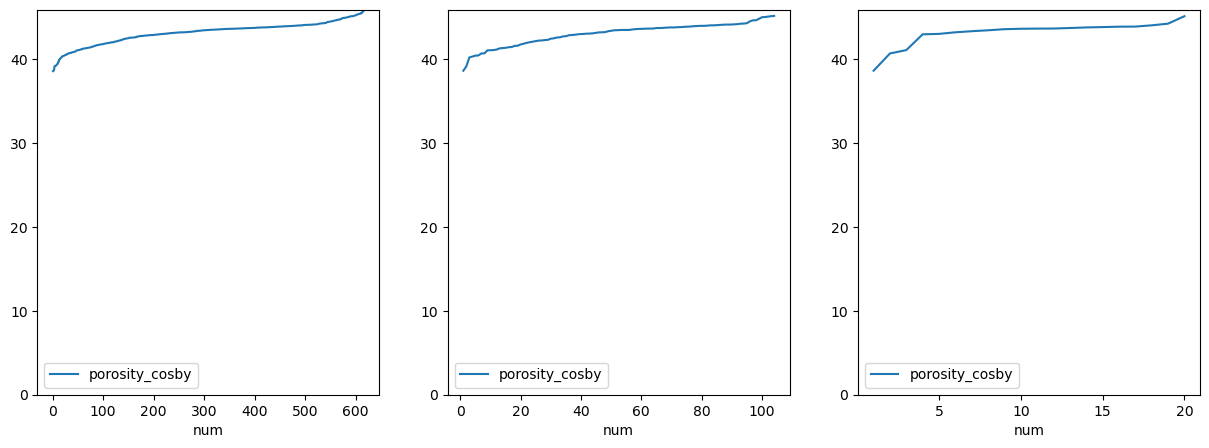

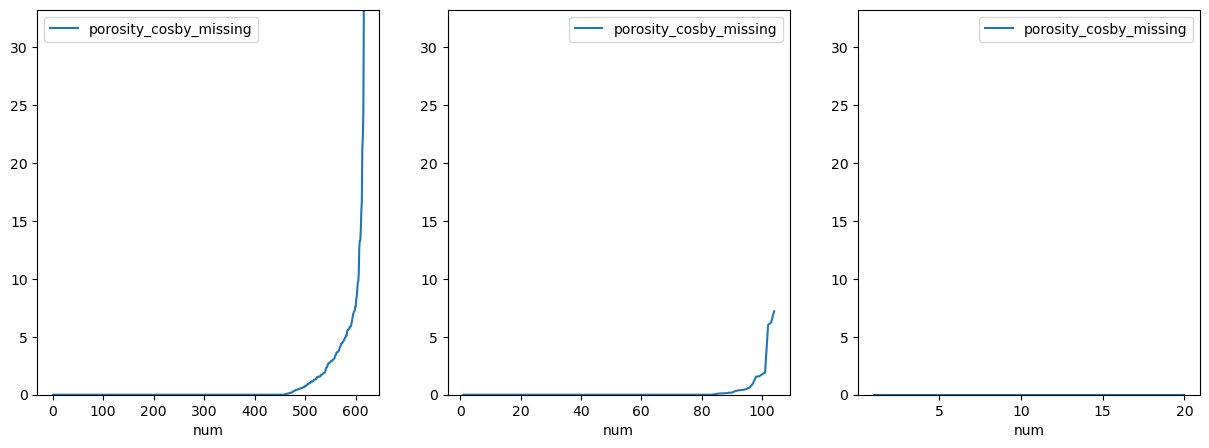

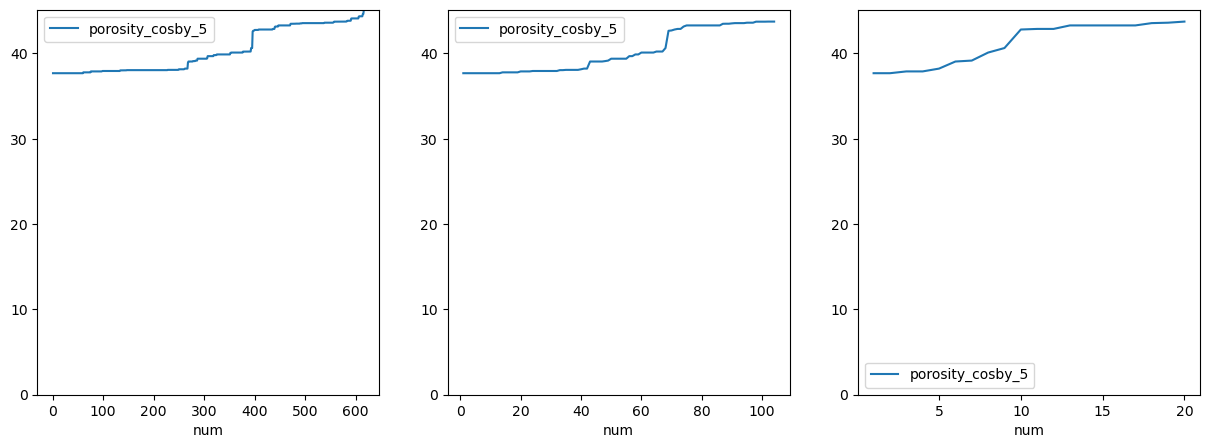

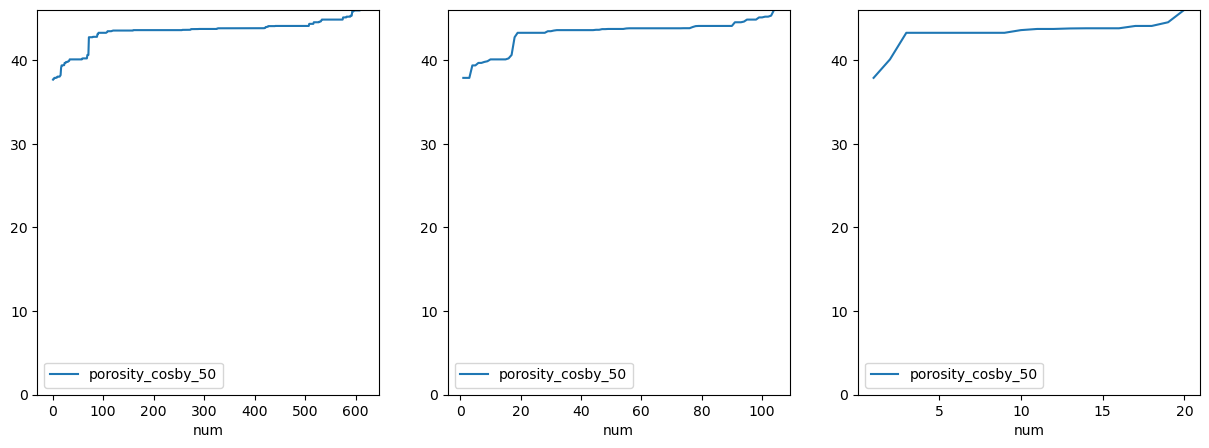

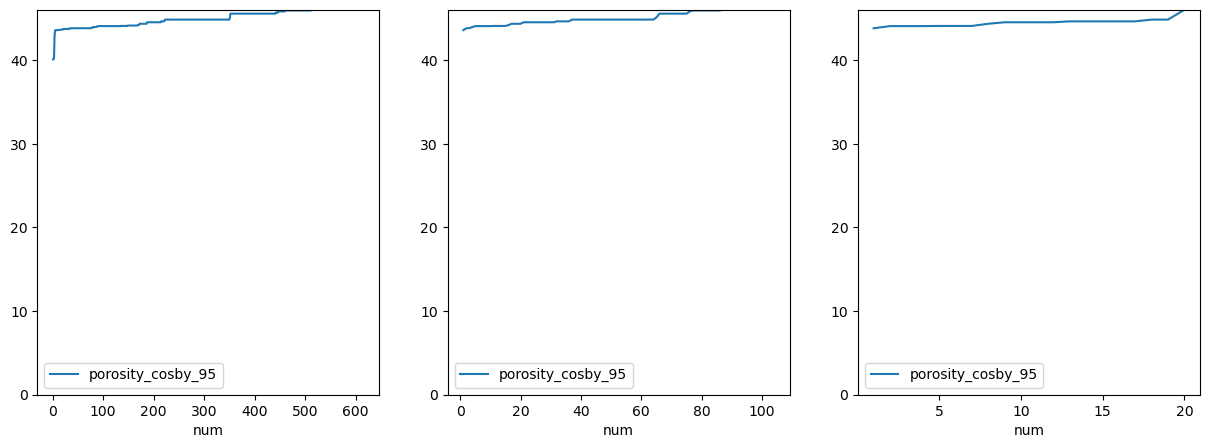

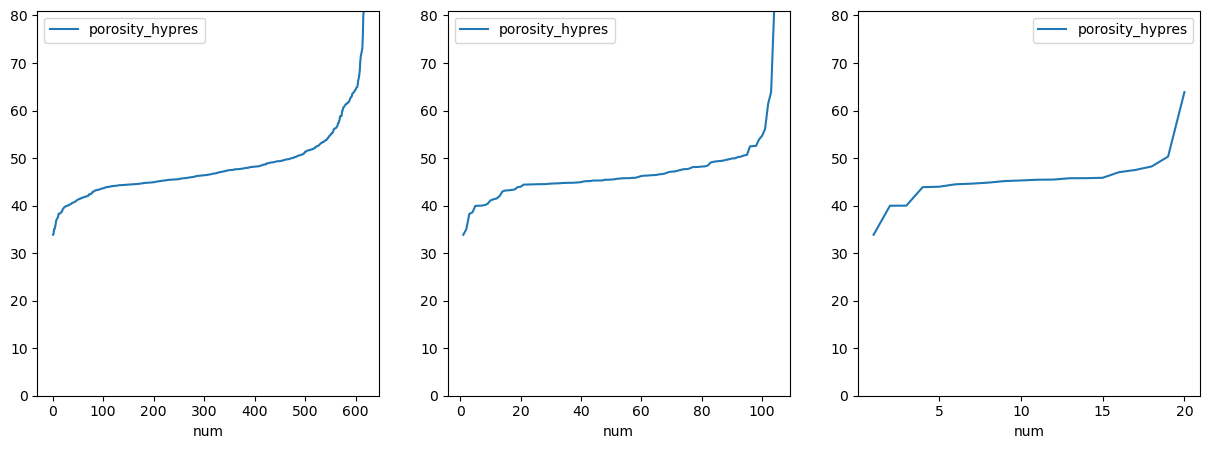

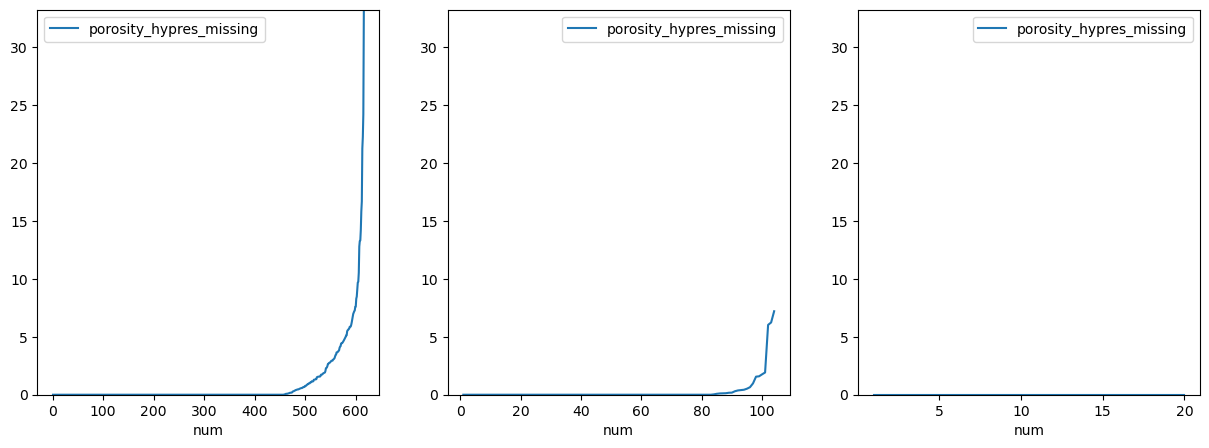

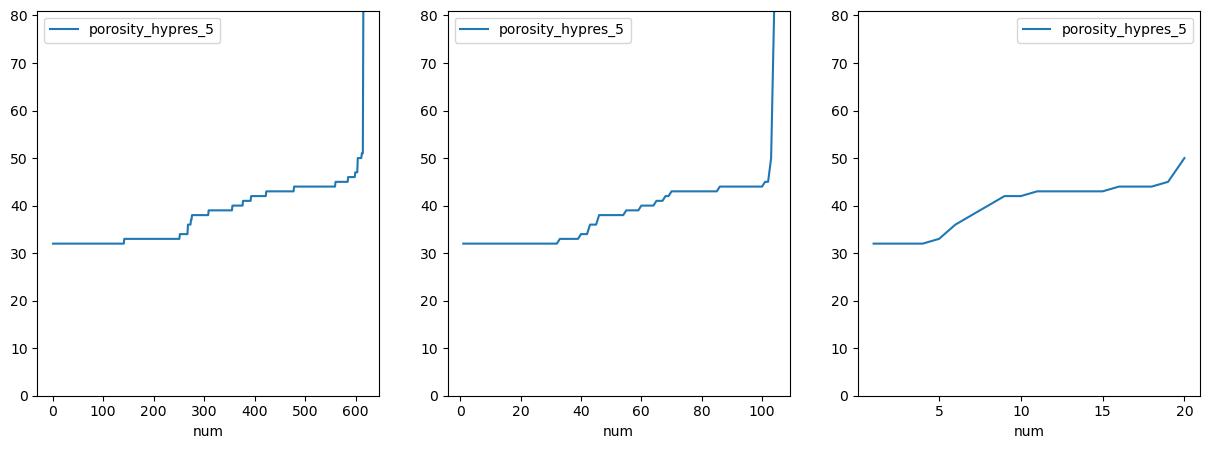

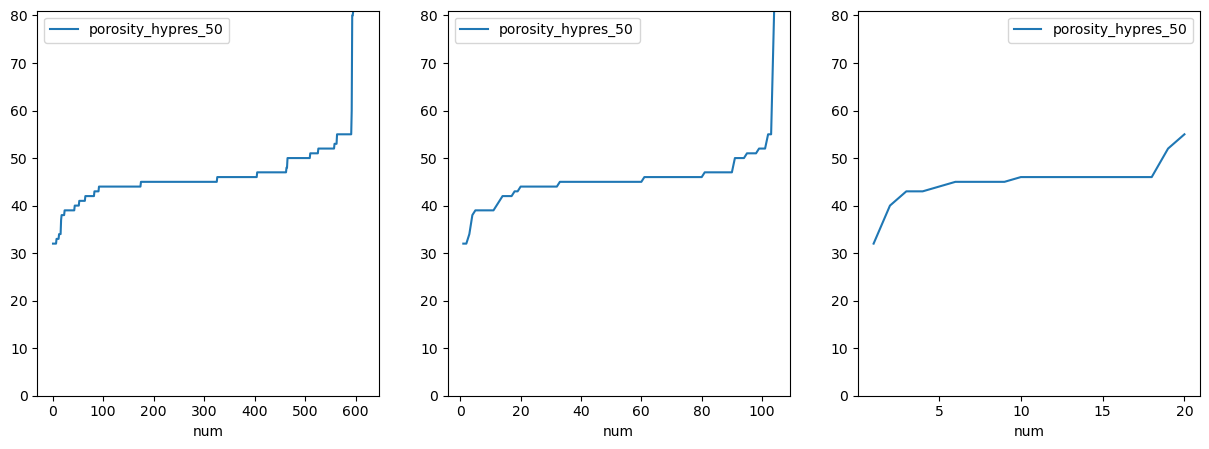

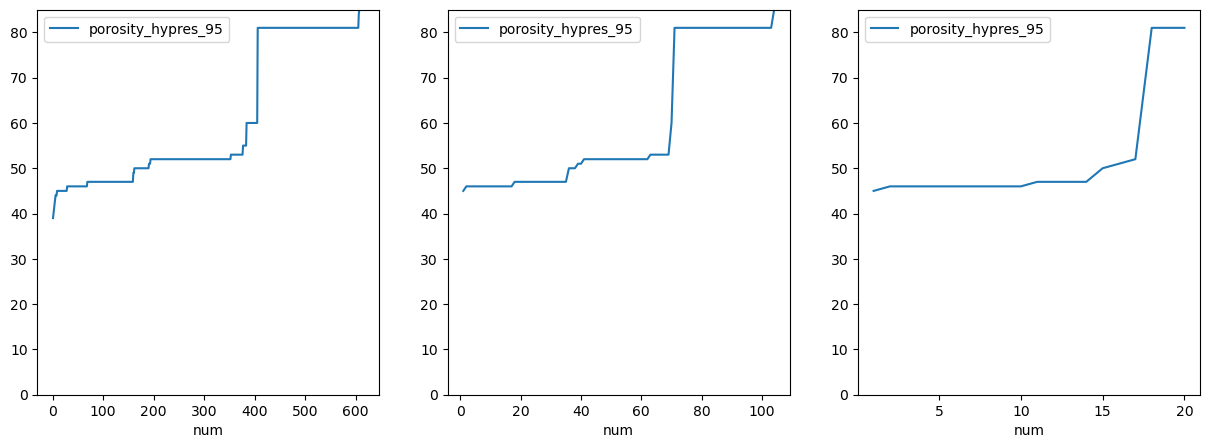

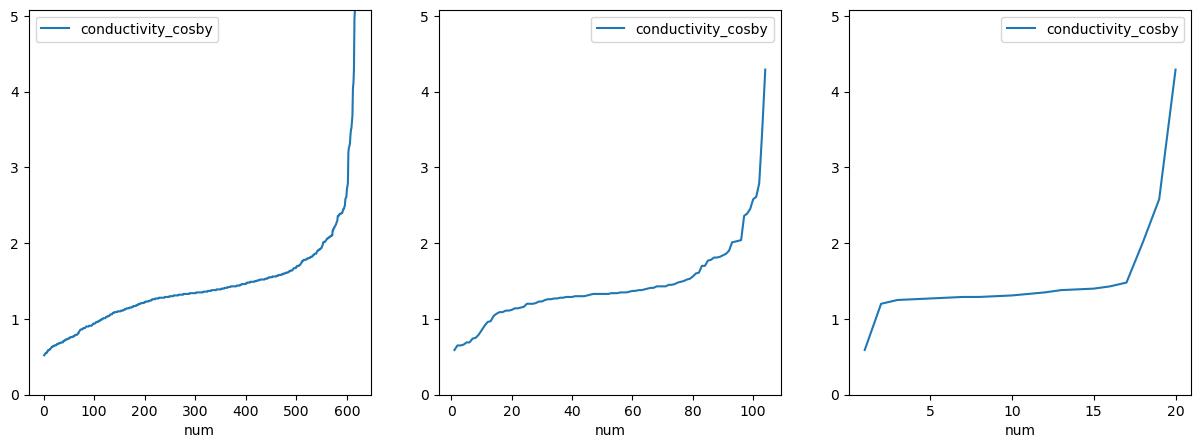

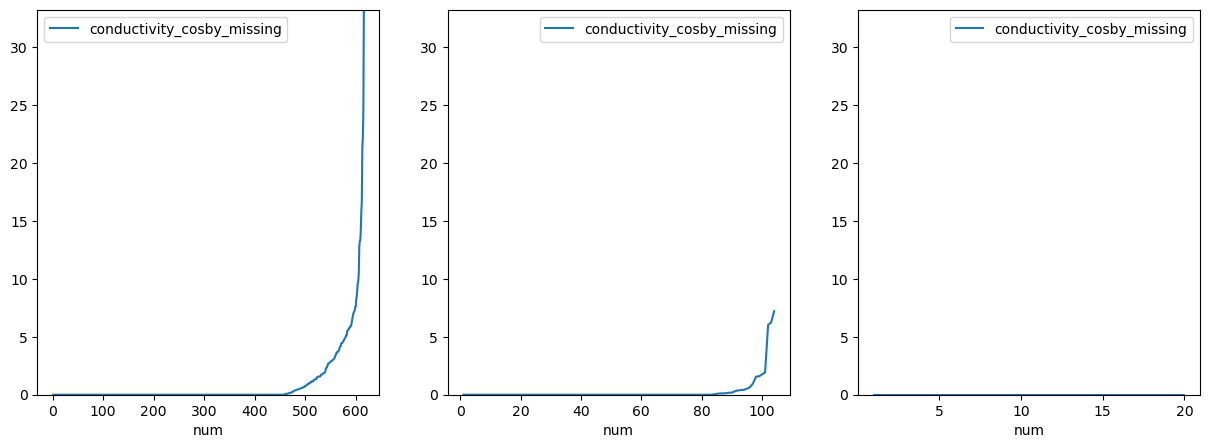

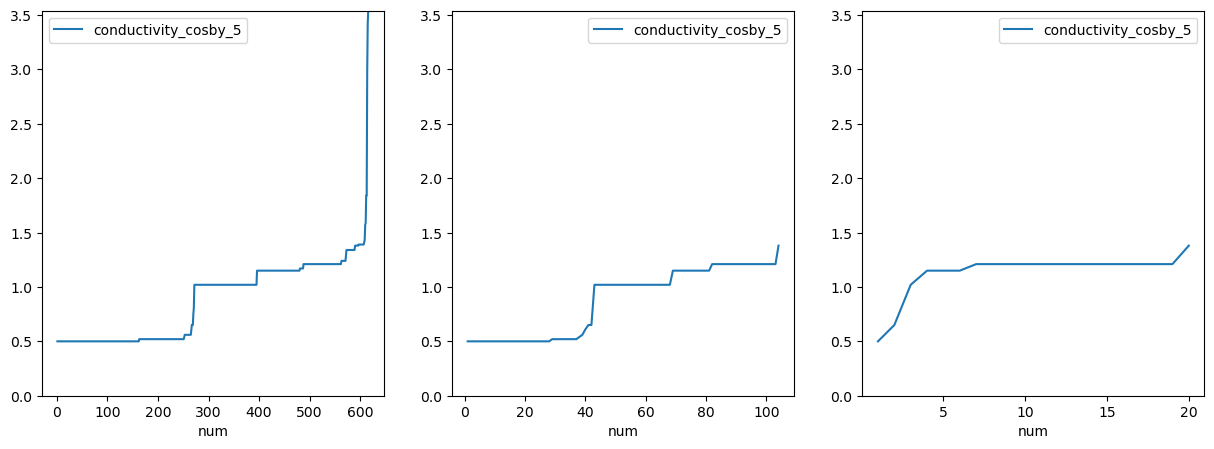

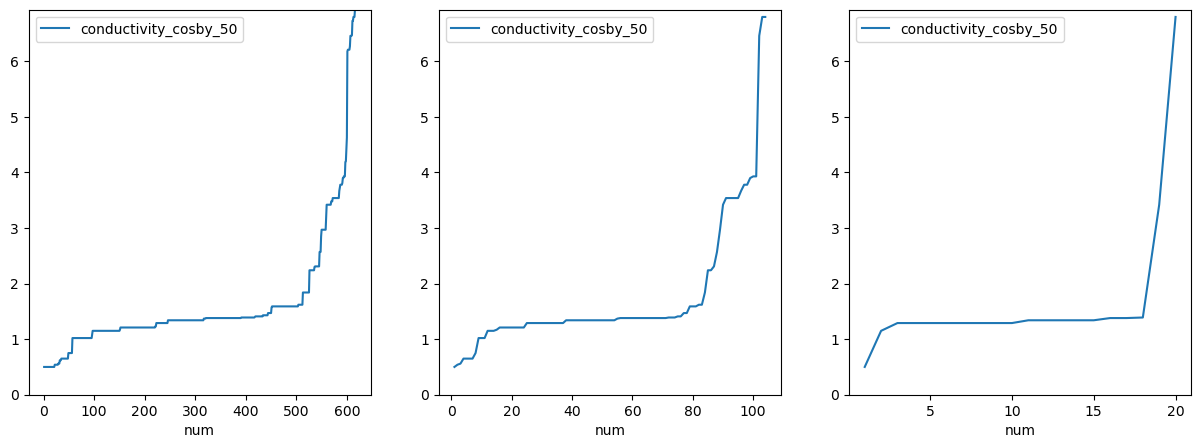

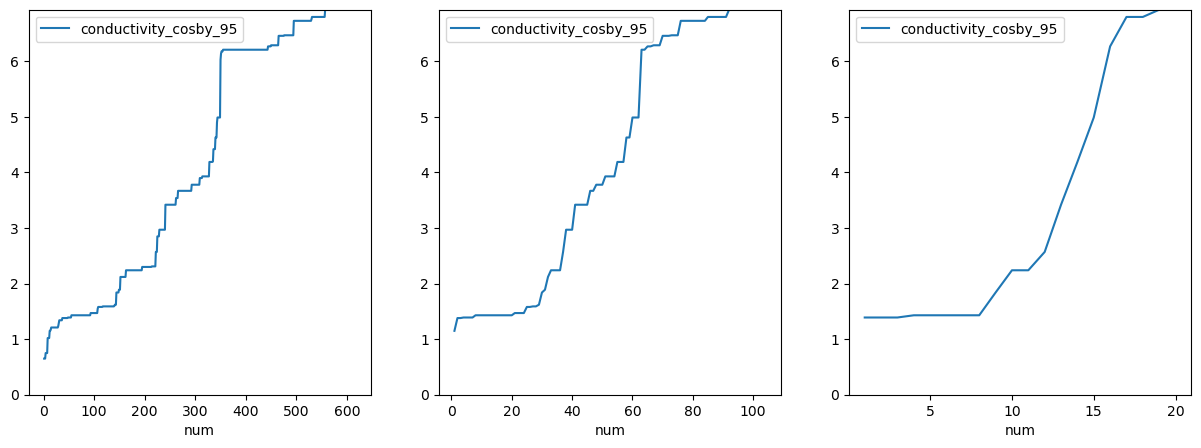

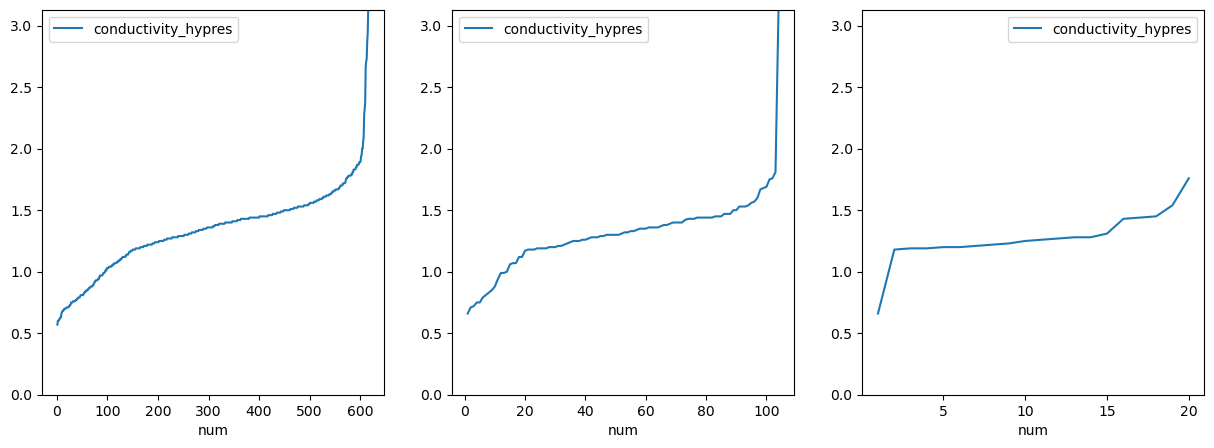

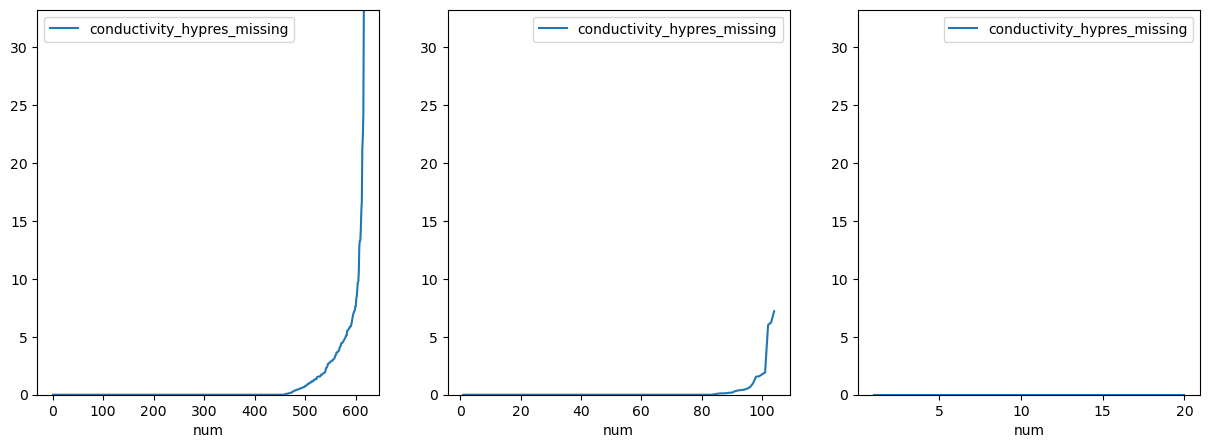

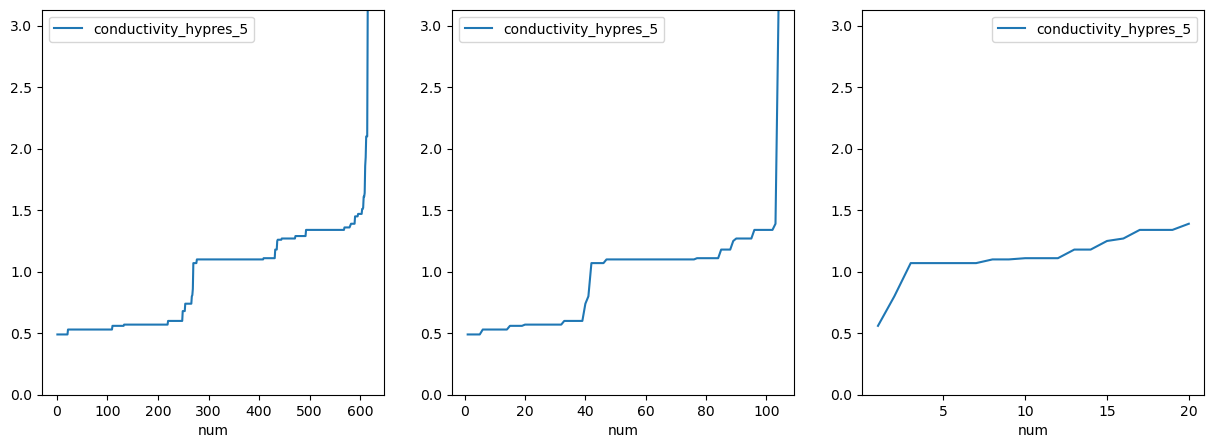

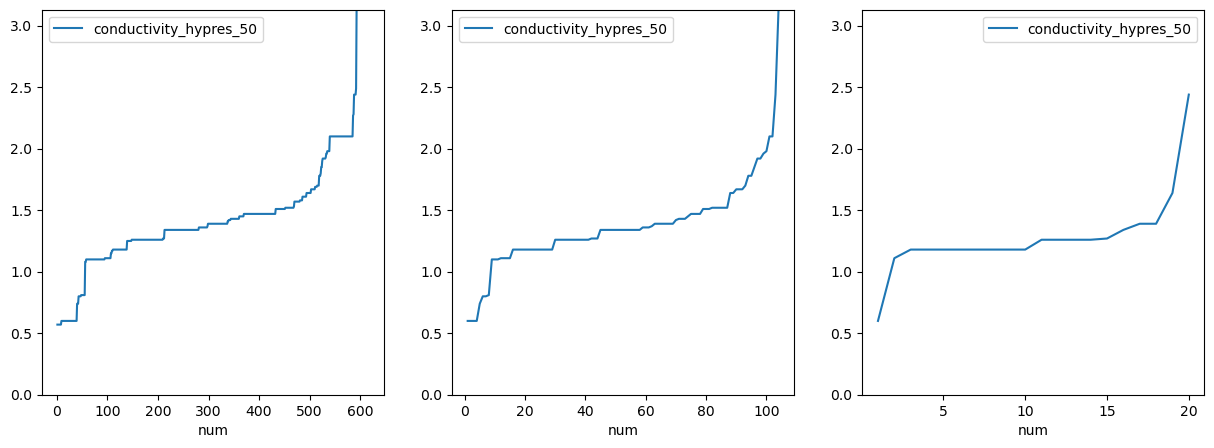

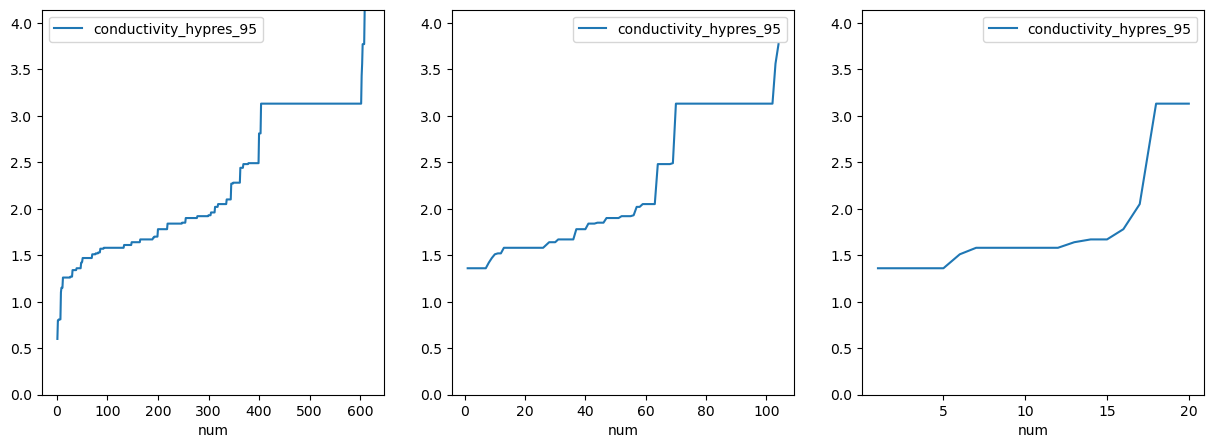

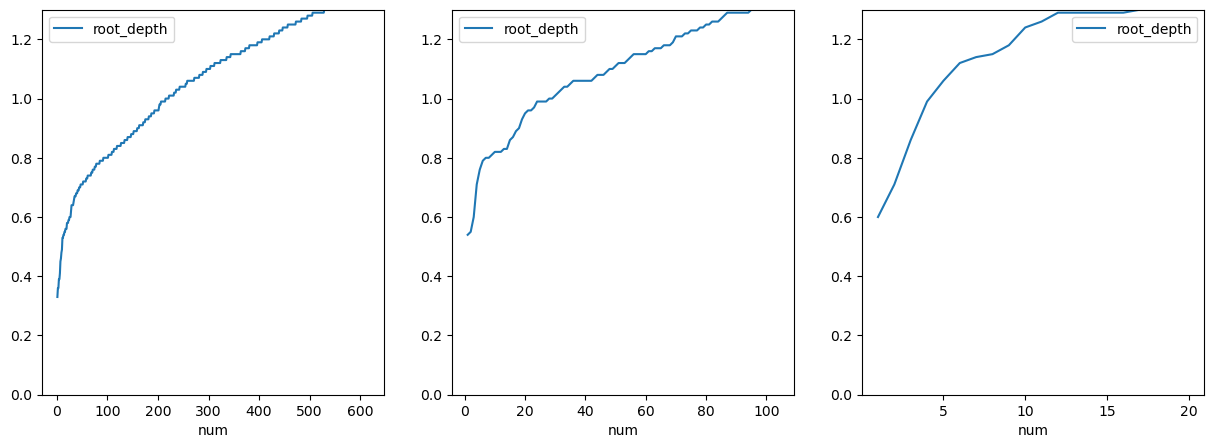

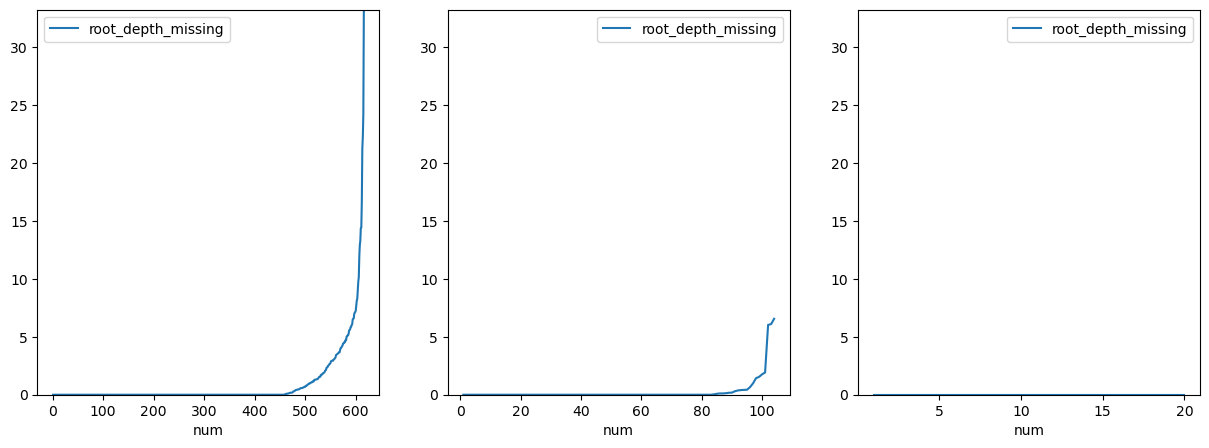

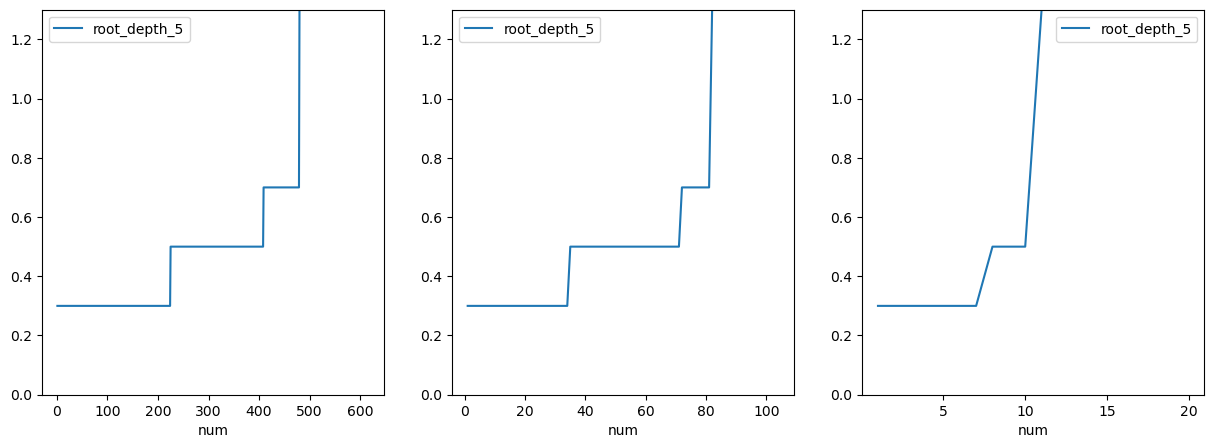

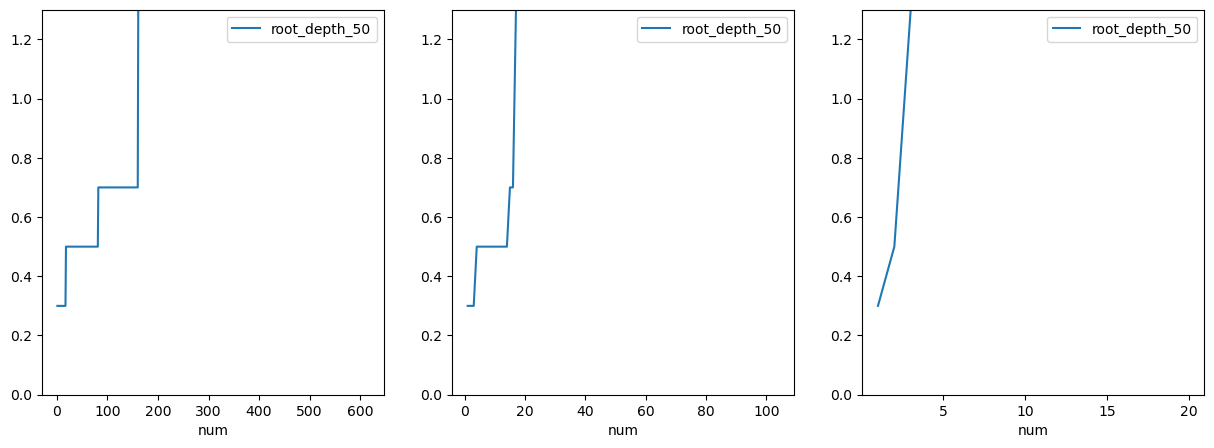

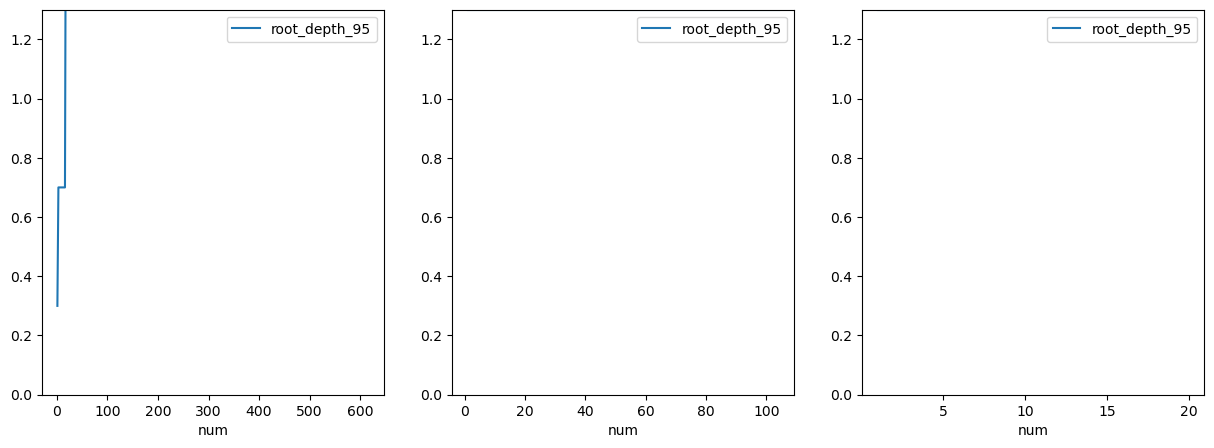

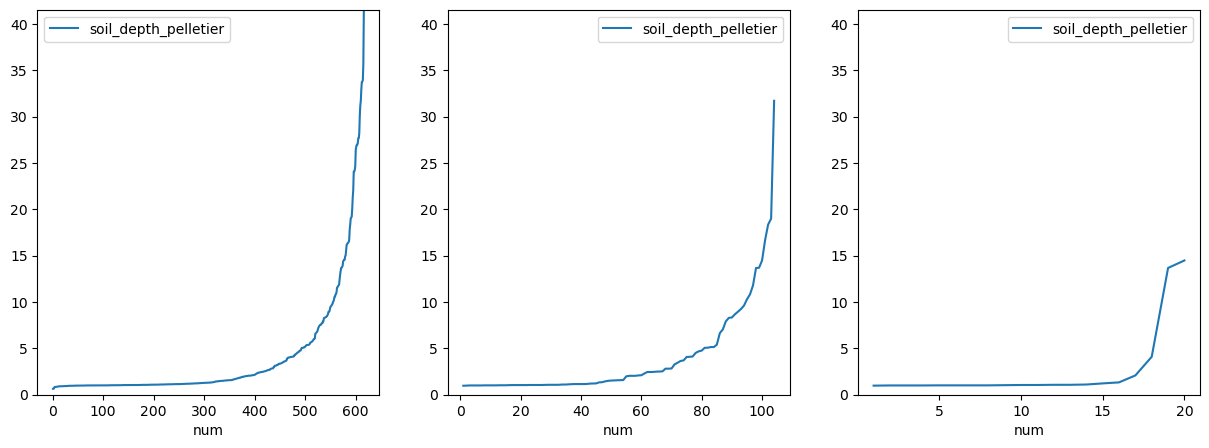

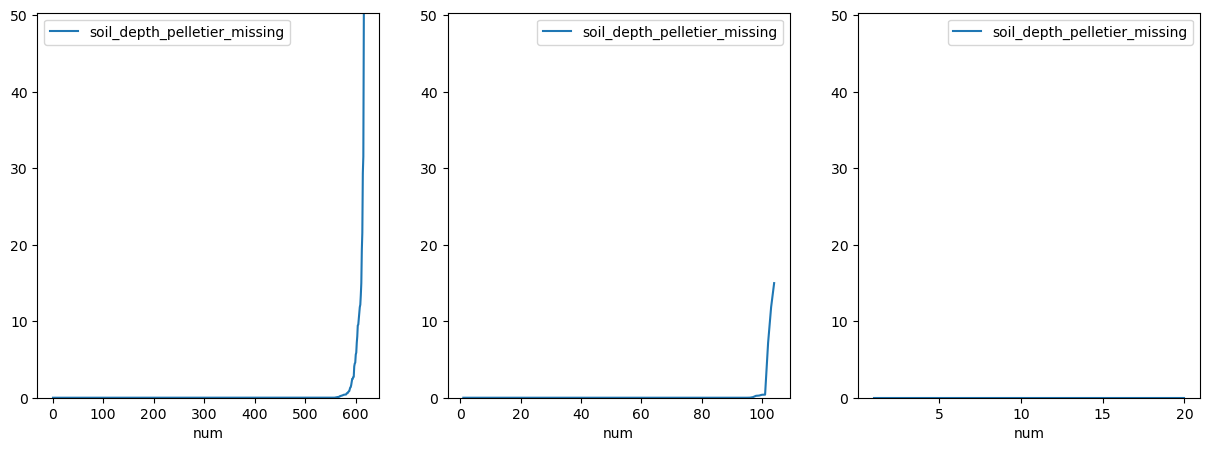

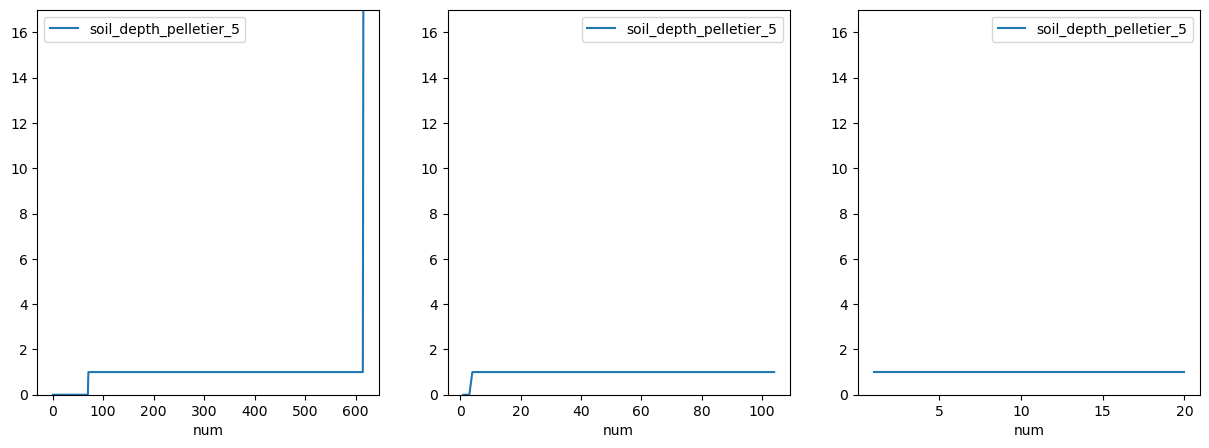

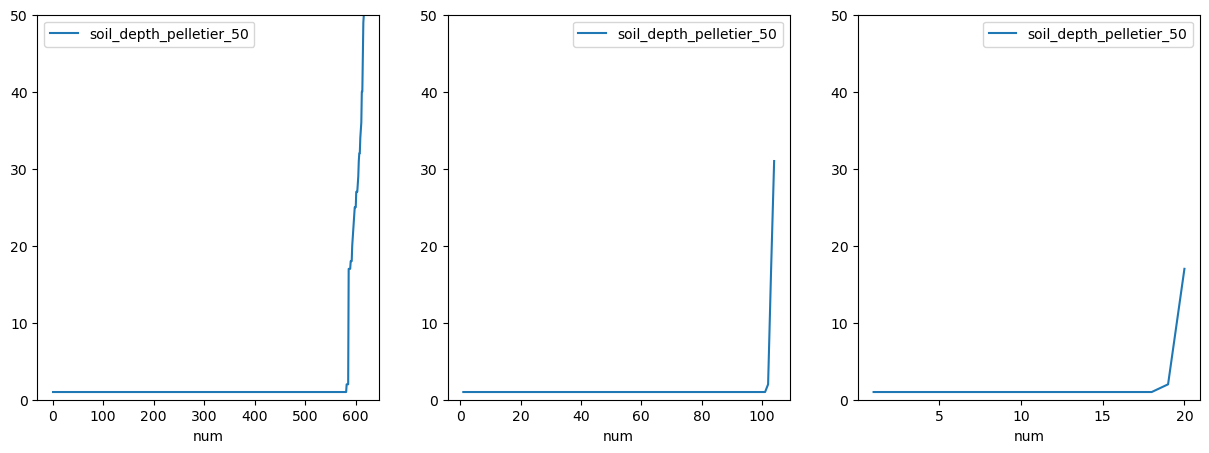

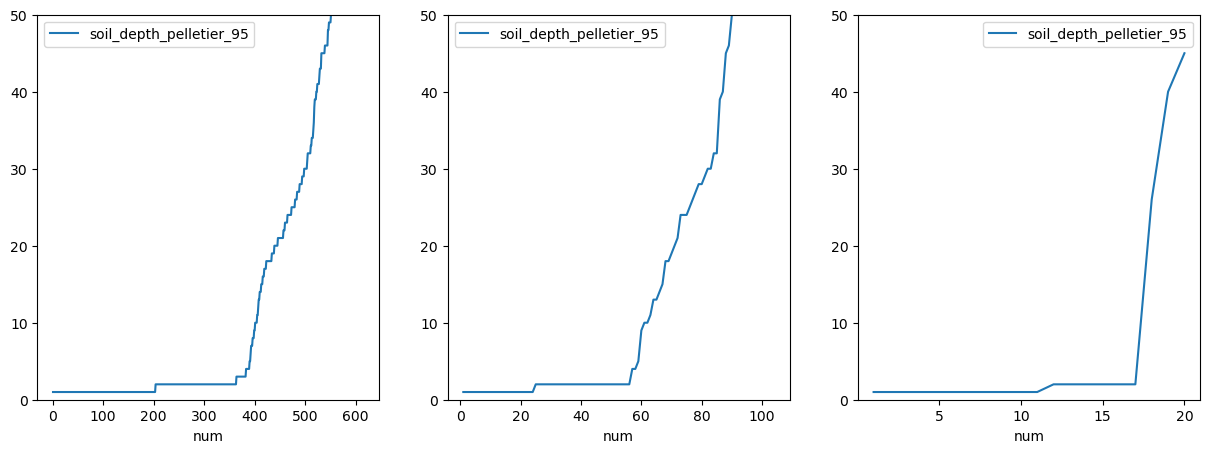

In [251]:
df = pd.read_csv(soil_file, index_col='gauge_id')

gdf_all = gdf_results[gdf_results.kge_np  < 1]
gdf_all = gdf_all['kge_np'].to_frame()
gdf_all = gdf_all.join(df)

gdf_small = gdf_results[gdf_results.kge_np  < 0]
gdf_small = gdf_small['kge_np'].to_frame()
gdf_small = gdf_small.join(df)

gdf_low = gdf_results[gdf_results.kge_np  < -1]
gdf_low = gdf_low['kge_np'].to_frame()
gdf_low = gdf_low.join(df)

for column in df.columns:
    fig, axes = plt.subplots(1,3,figsize=(15, 5))

    gdf_all = gdf_all.sort_values(by=column)
    gdf_all['num'] = list(range(1,len(gdf_all)+1))
    gdf_all = gdf_all.set_index('num')
    gdf_all[column].plot(ax=axes[0],label=column).legend()
    
    gdf_small = gdf_small.sort_values(by=column)
    gdf_small['num'] = list(range(1,len(gdf_small)+1))
    gdf_small = gdf_small.set_index('num')
    gdf_small[column].plot(ax=axes[1],label=column).legend()
    
    #edfsdf
    gdf_low = gdf_low.sort_values(by=column)
    gdf_low['num'] = list(range(1,len(gdf_low)+1))
    gdf_low = gdf_low.set_index('num')
    gdf_low[column].plot(ax=axes[2],label=column).legend()
    
    axes[0].set_ylim([0, gdf_all[column].max()])
    axes[1].set_ylim([0, gdf_all[column].max()])
    axes[2].set_ylim([0, gdf_all[column].max()])
    
    plt.show()
    

In [124]:
df_soil = pd.read_csv("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/aux_data/CAMELS-GB/data/CAMELS_GB_soil_attributes.csv", index_col='gauge_id')

gdf_small = gdf_results[gdf_results.kge_np  < 1]
gdf_small = gdf_small['kge_np'].to_frame()
gdf_small = gdf_small.join(df_soil)
gdf_small

kge_np  sand_perc  sand_perc_missing  silt_perc  silt_perc_missing  \
10003   0.9224      43.79               0.00      37.96               0.00   
1001    0.8716      39.25               3.16      31.97               3.16   
101002  0.7674      70.99               0.00      15.36               0.00   
101005  0.3748      71.01               0.00      15.56               0.00   
102001  0.8992      39.28               0.00      36.00               0.00   
...        ...        ...                ...        ...                ...   
95001   0.6158      47.75              12.80      24.31              12.80   
96001   0.8636      41.07               0.58      26.97               0.58   
96002   0.8141      42.42               5.00      24.10               5.00   
96004   0.9039      48.17               3.10      23.40               3.10   
97002   0.7988      38.97               0.85      29.43               0.85   

        clay_perc  clay_perc_missing  organic_perc  organic_perc_missing  \
10003       18.25               0.00          1.58                  0.00   
1001        28.79               3.16         19.32                  3.16   
101002      13.66               0.00          0.43                  0.00   
101005      13.45               0.00          0.45                  0.00   
102001      24.71               0.00          0.57                  0.00   
...           ...                ...           ...                   ...   
95001       27.93              12.80         12.64                 12.80   
96001       31.97               0.58         25.52                  0.58   
96002       33.48               5.00         12.65                  5.00   
96004       28.42               3.10         17.41                  3.10   
97002       31.60               0.85         24.53                  0.85   

        bulkdens  ...  root_depth  root_depth_missing  root_depth_5  \
10003       1.29  ...        1.01                0.00           0.5   
1001        0.74  ...        1.30                3.16           1.3   
101002      1.55  ...        1.26                0.00           1.3   
101005      1.54  ...        1.25                0.00           1.3   
102001      1.38  ...        1.27                0.00           1.3   
...          ...  ...         ...                 ...           ...   
95001       1.02  ...        0.91               11.91           0.3   
96001       0.53  ...        1.24                0.58           0.5   
96002       0.96  ...        1.06                4.46           0.3   
96004       0.85  ...        1.04                3.10           0.3   
97002       0.55  ...        1.29                0.85           1.3   

        root_depth_50  root_depth_95  soil_depth_pelletier  \
10003             1.3            1.3                  7.52   
1001              1.3            1.3                 14.54   
101002            1.3            1.3                  2.80   
101005            1.3            1.3                  3.38   
102001            1.3            1.3                 26.95   
...               ...            ...                   ...   
95001             1.3            1.3                  1.03   
96001             1.3            1.3                  5.48   
96002             1.3            1.3                  1.76   
96004             1.3            1.3                  0.89   
97002             1.3            1.3                 13.27   

        soil_depth_pelletier_missing  soil_depth_pelletier_5  \
10003                            0.0                     1.0   
1001                             0.0                     1.0   
101002                           0.0                     1.0   
101005                           0.0                     1.0   
102001                           0.0                     1.0   
...                              ...                     ...   
95001                            0.0                     0.0   
96001                            0.0            

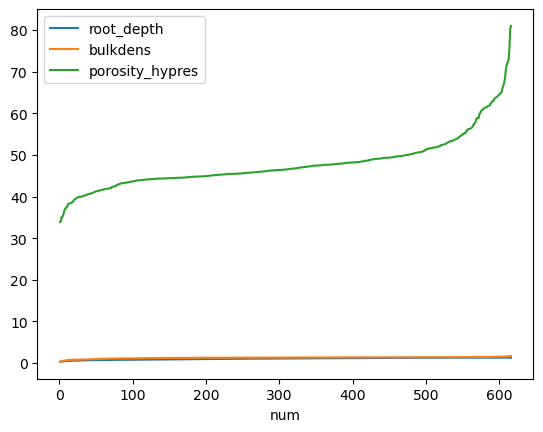

In [125]:
gdf_small = gdf_small.sort_values(by='soil_depth_pelletier')
gdf_small['num'] = list(range(1,len(gdf_small)+1))
gdf_small = gdf_small.set_index('num')
# gdf_small.soil_depth_pelletier.plot(label='soil_depth_pelletier').legend()

gdf_small = gdf_small.sort_values(by='root_depth')
gdf_small['num'] = list(range(1,len(gdf_small)+1))
gdf_small = gdf_small.set_index('num')
gdf_small.root_depth.plot(label='root_depth').legend()


gdf_small = gdf_small.sort_values(by='bulkdens')
gdf_small['num'] = list(range(1,len(gdf_small)+1))
gdf_small = gdf_small.set_index('num')
gdf_small.bulkdens.plot(label='bulkdens').legend()

gdf_small = gdf_small.sort_values(by='porosity_hypres')
gdf_small['num'] = list(range(1,len(gdf_small)+1))
gdf_small = gdf_small.set_index('num')
gdf_small.porosity_hypres.plot(label='porosity_hypres').legend()

In [126]:
gdf_small = gdf_results[gdf_results.kge_np  < 0]
gdf_small = gdf_small['kge_np'].to_frame()
gdf_small = gdf_small.join(df_soil)

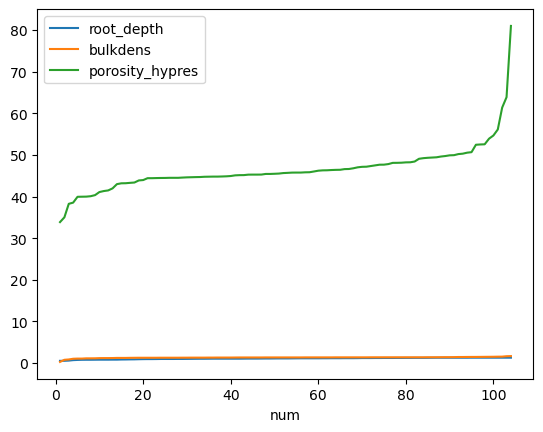

In [127]:
gdf_small = gdf_small.sort_values(by='soil_depth_pelletier')
gdf_small['num'] = list(range(1,len(gdf_small)+1))
gdf_small = gdf_small.set_index('num')
# gdf_small.soil_depth_pelletier.plot(label='soil_depth_pelletier').legend()

gdf_small = gdf_small.sort_values(by='root_depth')
gdf_small['num'] = list(range(1,len(gdf_small)+1))
gdf_small = gdf_small.set_index('num')
gdf_small.root_depth.plot(label='root_depth').legend()

gdf_small = gdf_small.sort_values(by='bulkdens')
gdf_small['num'] = list(range(1,len(gdf_small)+1))
gdf_small = gdf_small.set_index('num')
gdf_small.bulkdens.plot(label='bulkdens').legend()

gdf_small = gdf_small.sort_values(by='porosity_hypres')
gdf_small['num'] = list(range(1,len(gdf_small)+1))
gdf_small = gdf_small.set_index('num')
gdf_small.porosity_hypres.plot(label='porosity_hypres').legend()

# Human

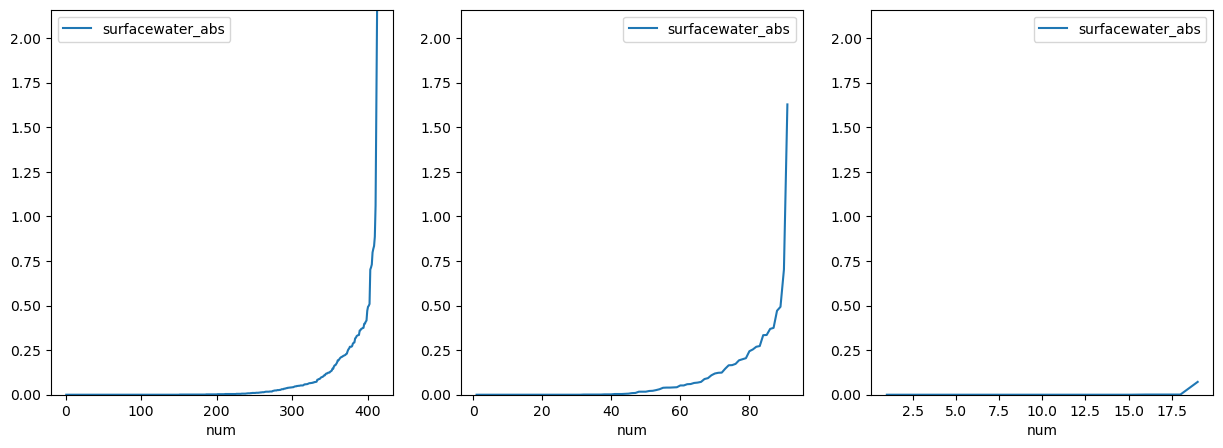

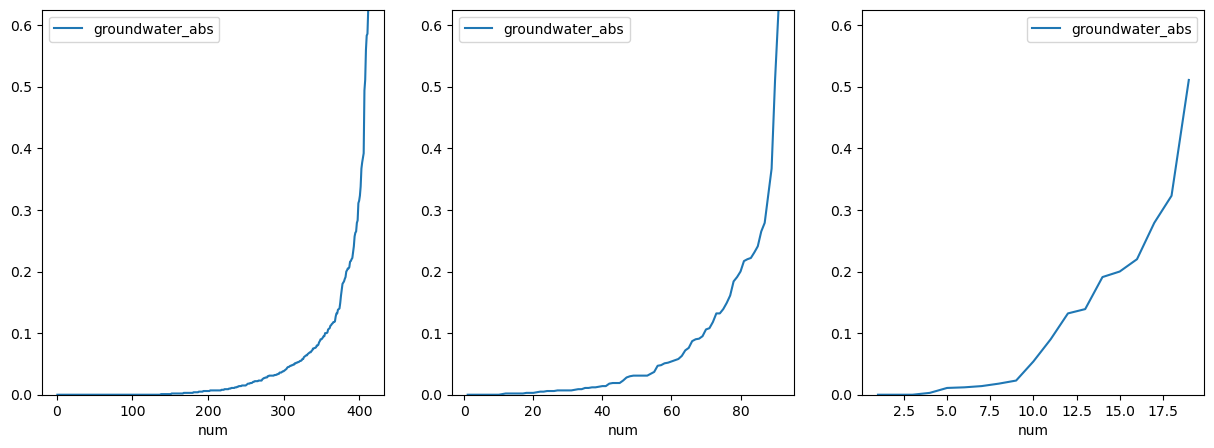

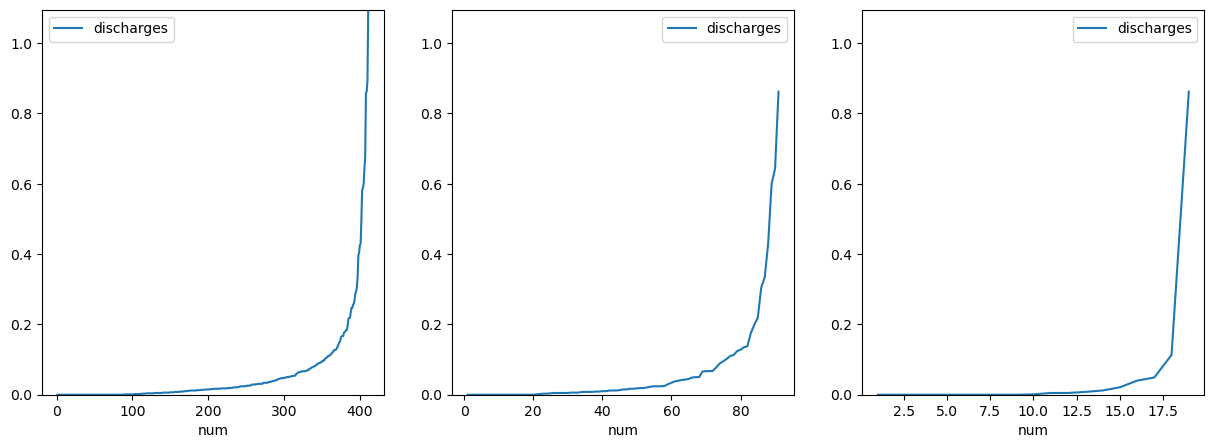

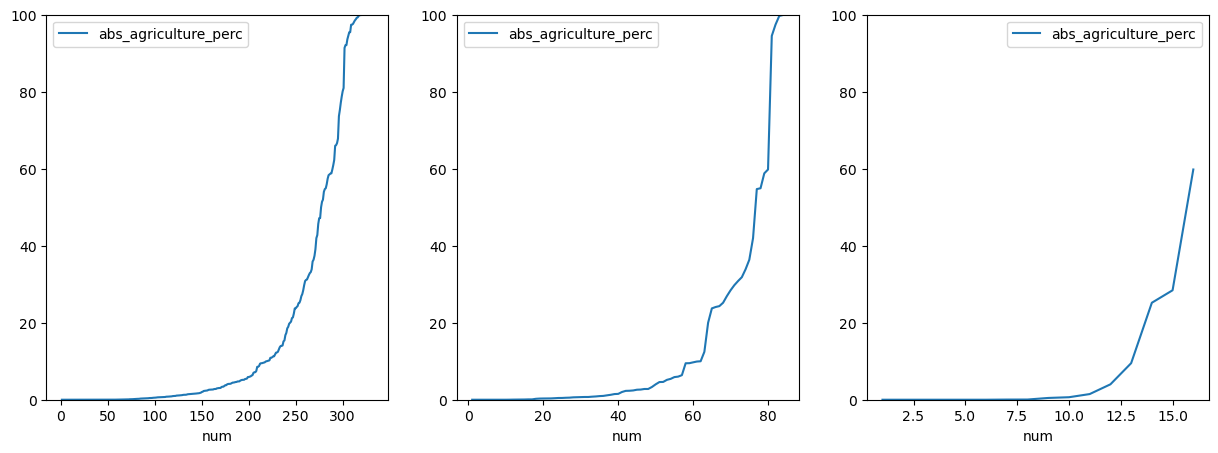

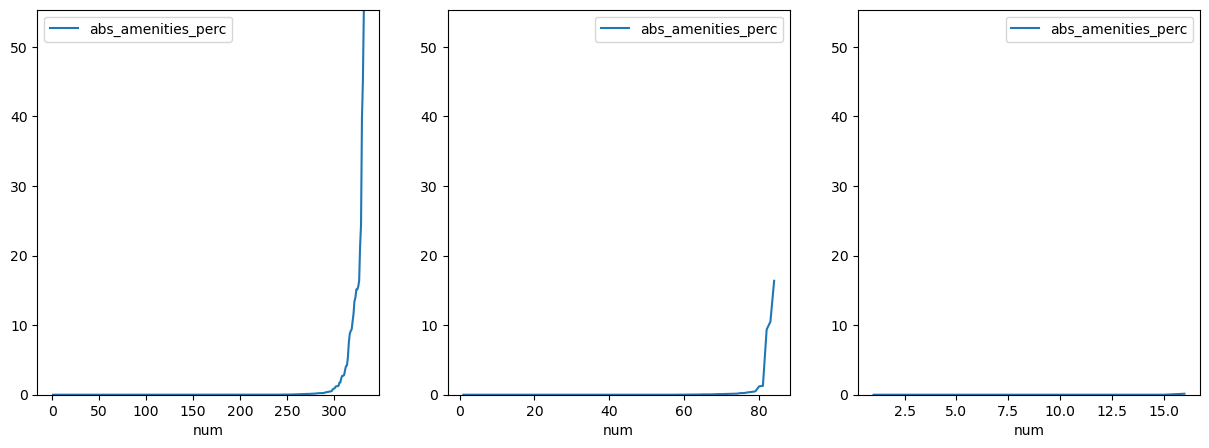

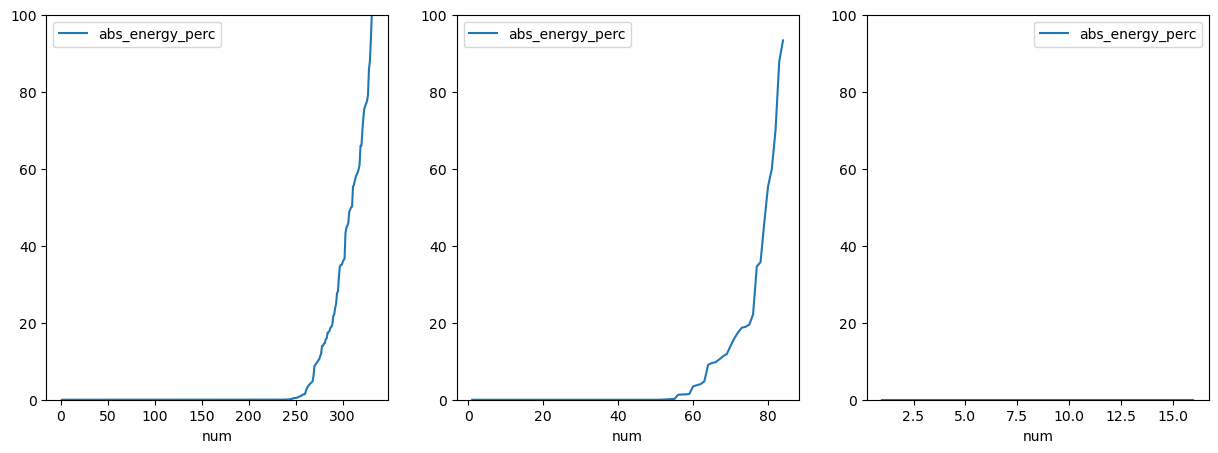

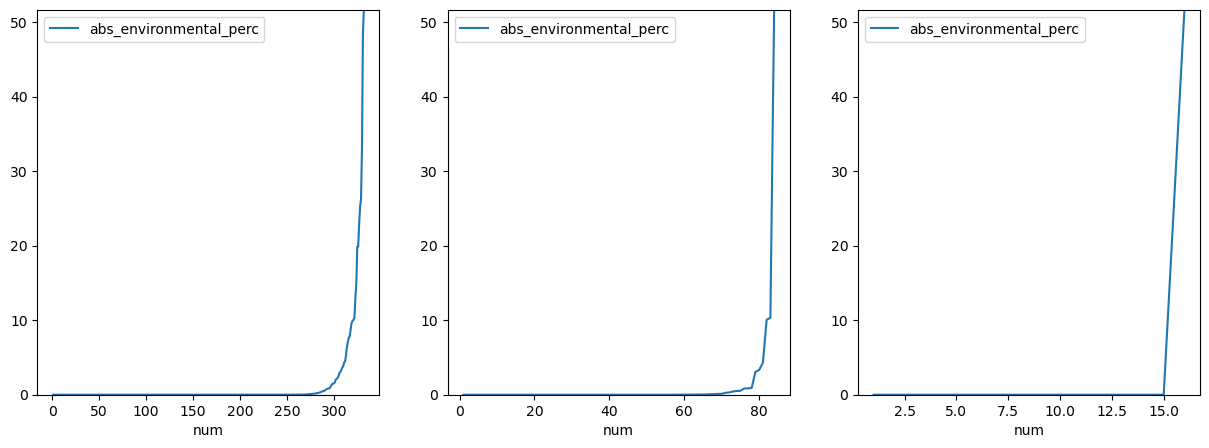

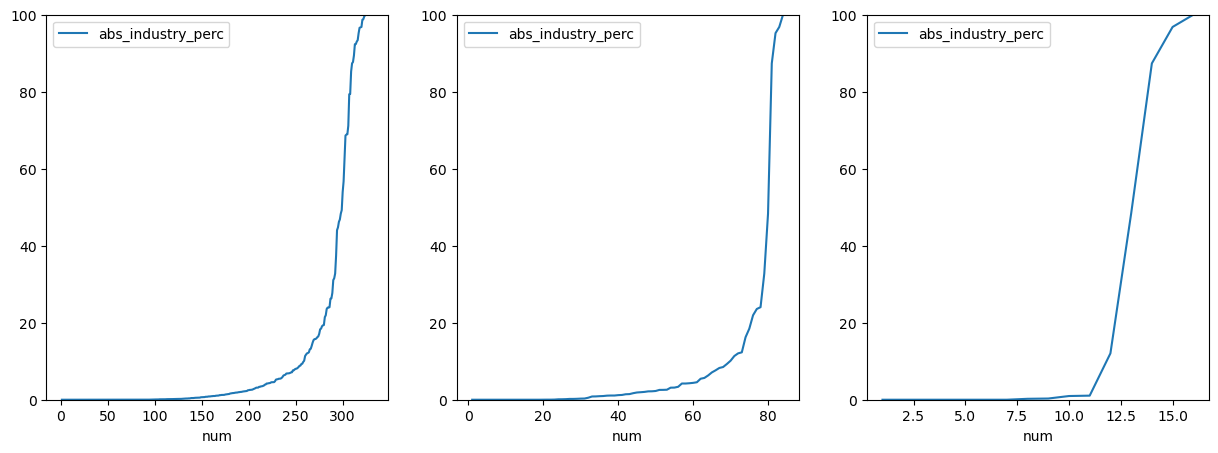

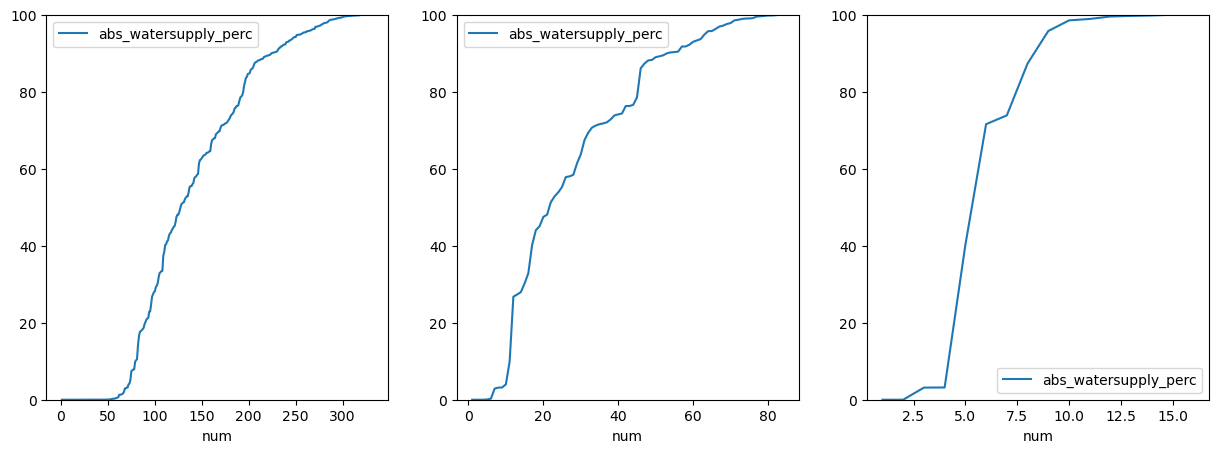

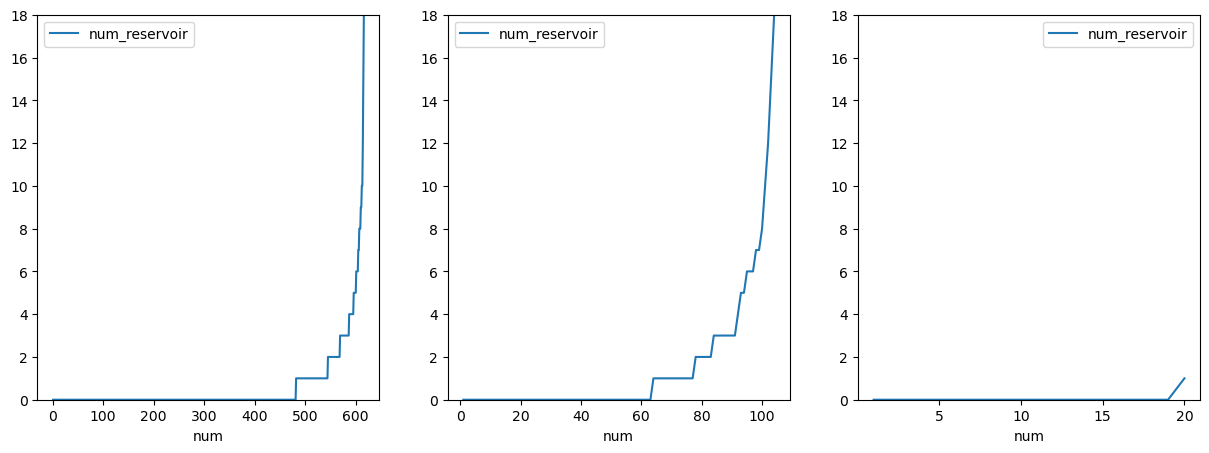

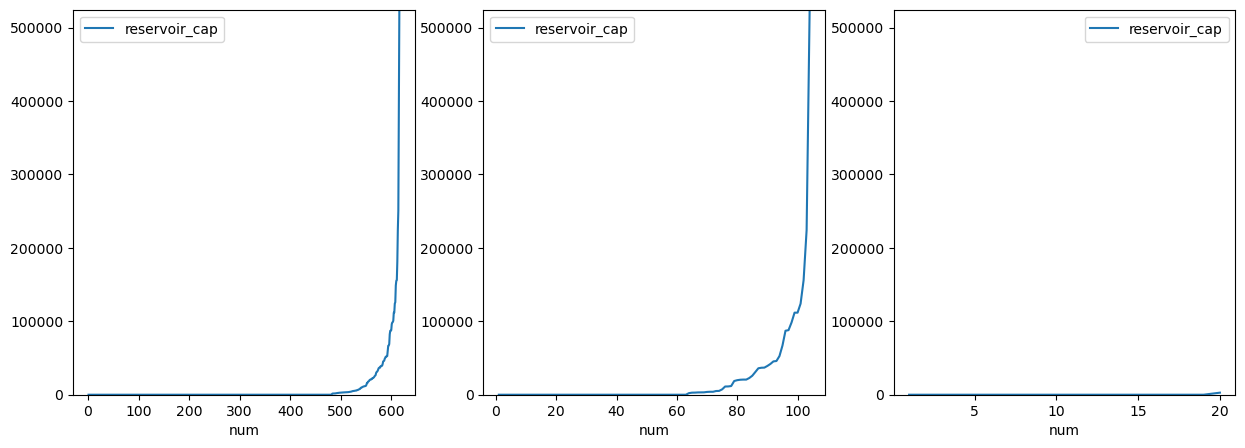

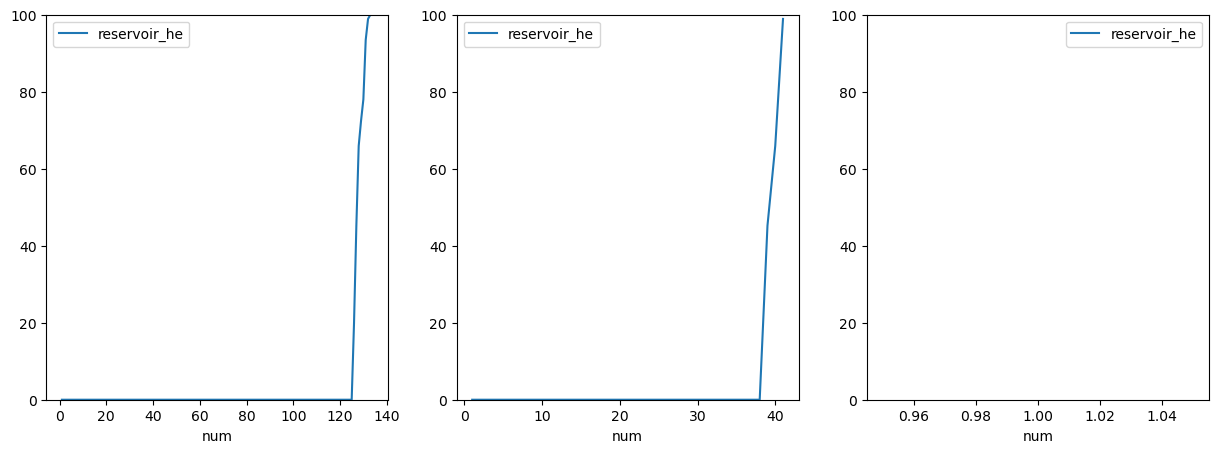

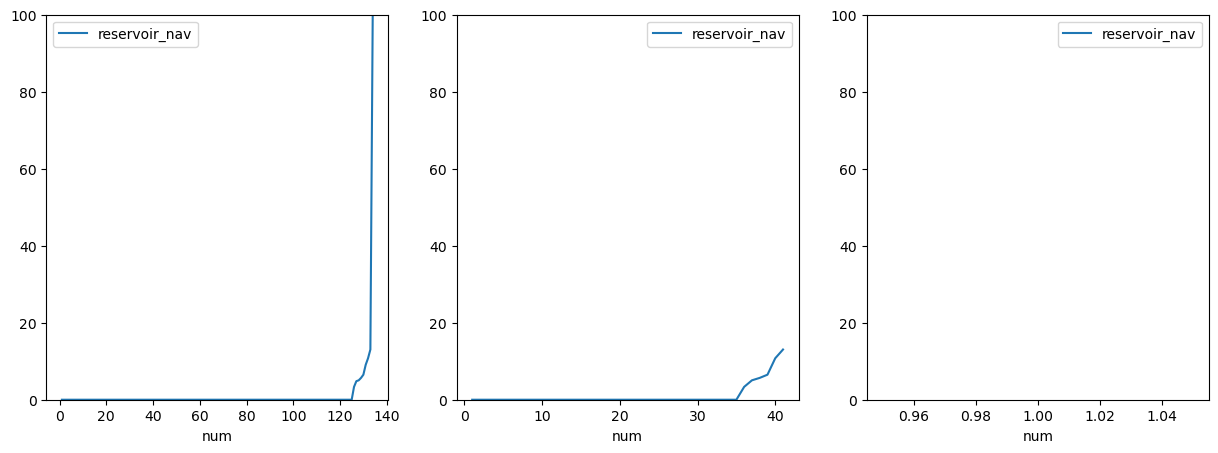

/scratch-local/jaerts.1636796/ipykernel_2007344/314484675.py:41: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/314484675.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/314484675.py:43: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[2].set_ylim([0, gdf_all[column].max()])


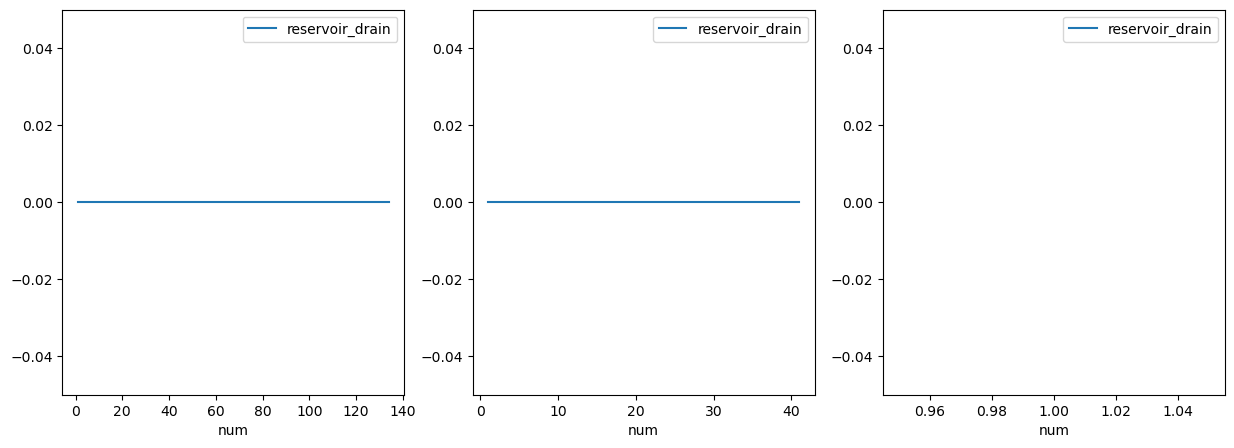

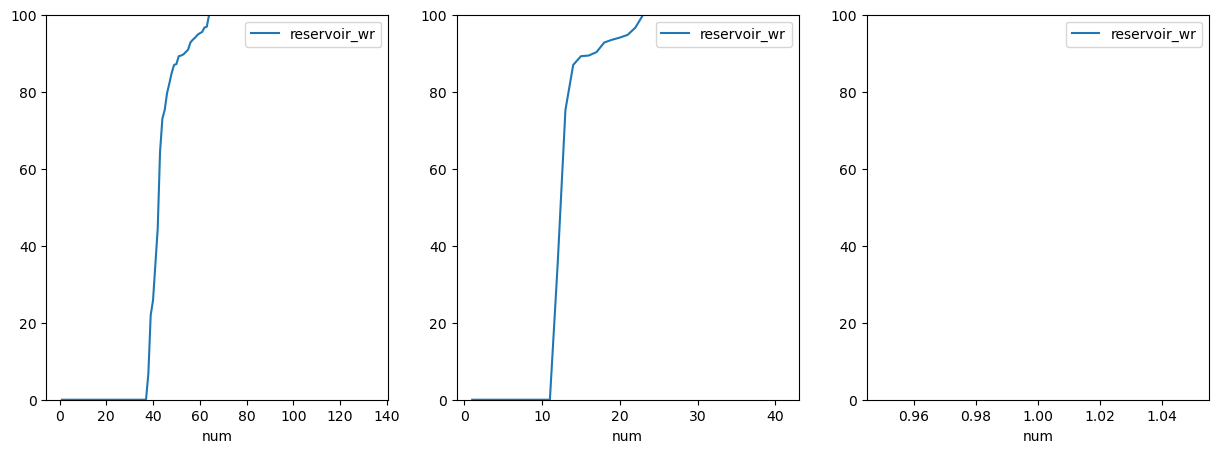

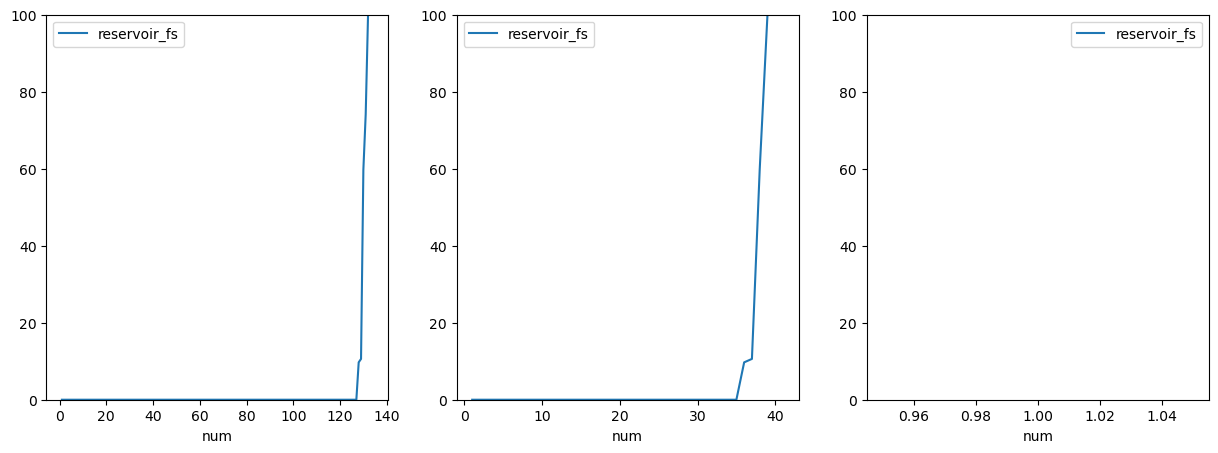

/scratch-local/jaerts.1636796/ipykernel_2007344/314484675.py:41: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/314484675.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/314484675.py:43: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[2].set_ylim([0, gdf_all[column].max()])


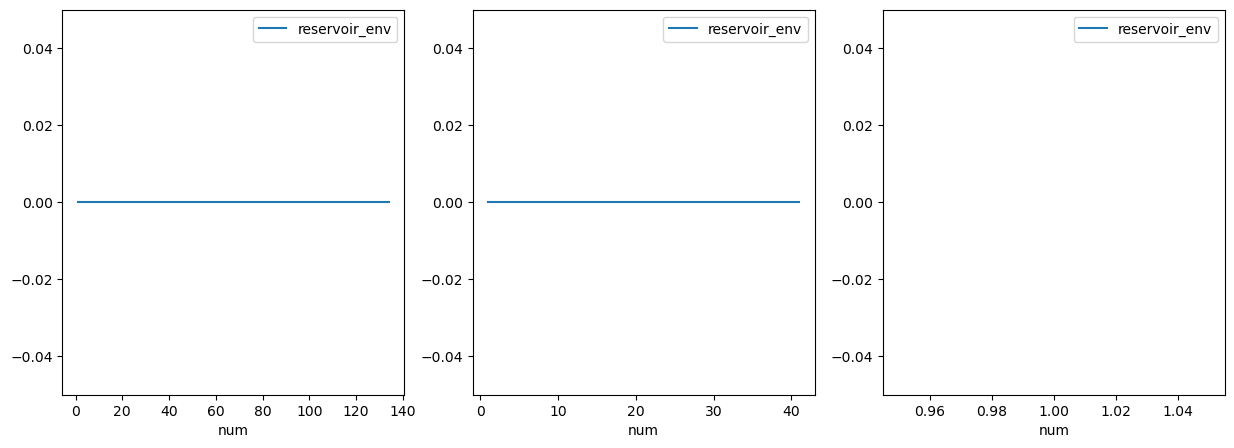

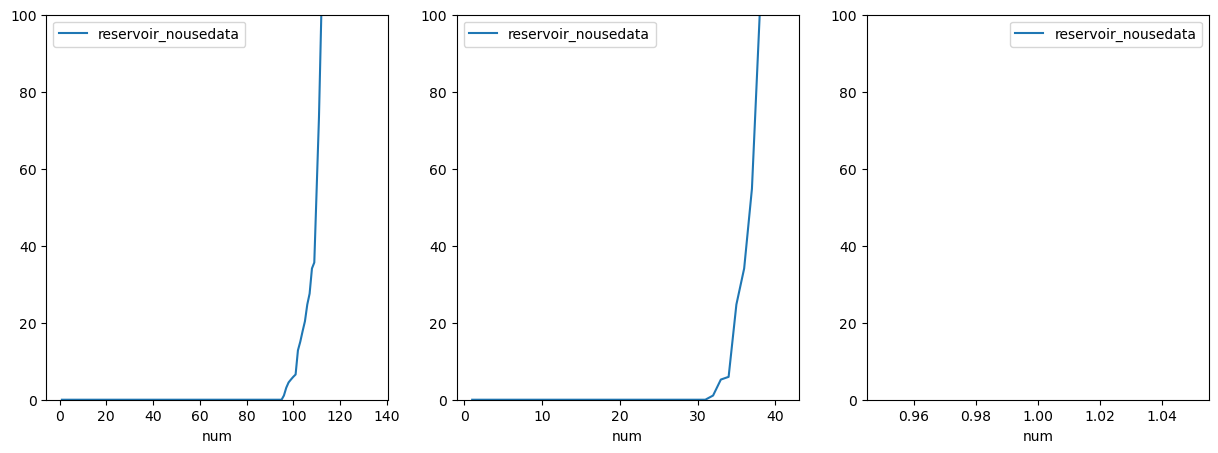

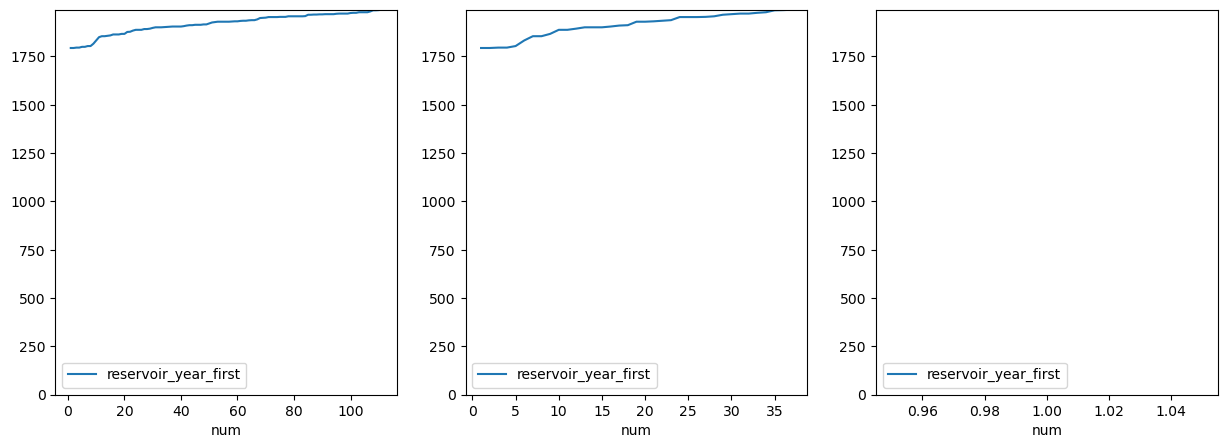

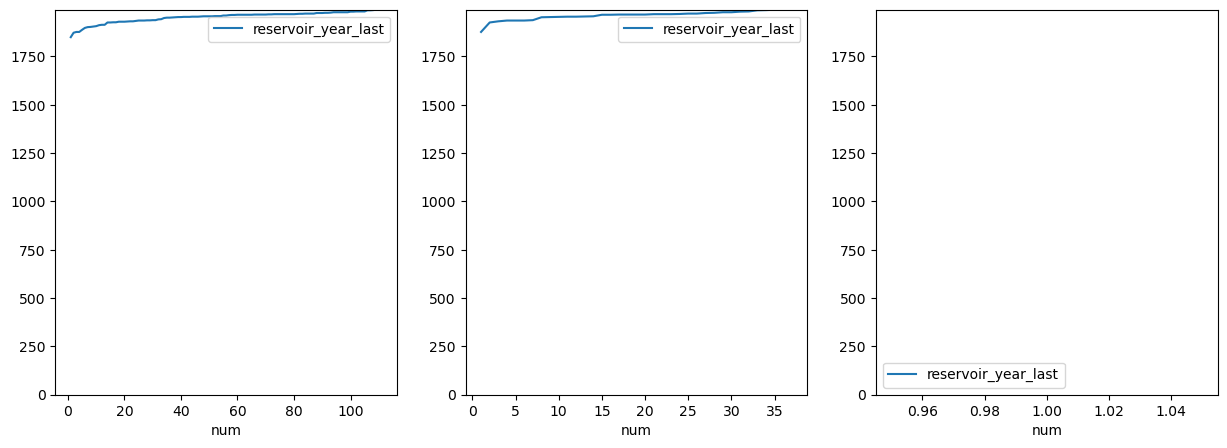

In [231]:
df = pd.read_csv(human_file, index_col='gauge_id')

gdf_all = gdf_results[gdf_results.kge_np  < 1]
gdf_all = gdf_all['kge_np'].to_frame()
gdf_all = gdf_all.join(df)

gdf_small = gdf_results[gdf_results.kge_np  < 0]
gdf_small = gdf_small['kge_np'].to_frame()
gdf_small = gdf_small.join(df)

gdf_low = gdf_results[gdf_results.kge_np  < -1]
gdf_low = gdf_low['kge_np'].to_frame()
gdf_low = gdf_low.join(df)

columns = ['surfacewater_abs', 'groundwater_abs', 'discharges',
       'abs_agriculture_perc', 'abs_amenities_perc', 'abs_energy_perc',
       'abs_environmental_perc', 'abs_industry_perc', 'abs_watersupply_perc',
       'num_reservoir', 'reservoir_cap', 'reservoir_he', 'reservoir_nav',
       'reservoir_drain', 'reservoir_wr', 'reservoir_fs', 'reservoir_env',
       'reservoir_nousedata', 'reservoir_year_first', 'reservoir_year_last']

for column in columns:
    fig, axes = plt.subplots(1,3,figsize=(15, 5))

    gdf_all = gdf_all.sort_values(by=column)
    gdf_all['num'] = list(range(1,len(gdf_all)+1))
    gdf_all = gdf_all.set_index('num')
    gdf_all[column].plot(ax=axes[0],label=column).legend()
    
    gdf_small = gdf_small.sort_values(by=column)
    gdf_small['num'] = list(range(1,len(gdf_small)+1))
    gdf_small = gdf_small.set_index('num')
    gdf_small[column].plot(ax=axes[1],label=column).legend()
    
    #edfsdf
    gdf_low = gdf_low.sort_values(by=column)
    gdf_low['num'] = list(range(1,len(gdf_low)+1))
    gdf_low = gdf_low.set_index('num')
    gdf_low[column].plot(ax=axes[2],label=column).legend()
    
    axes[0].set_ylim([0, gdf_all[column].max()])
    axes[1].set_ylim([0, gdf_all[column].max()])
    axes[2].set_ylim([0, gdf_all[column].max()])
    
    plt.show()
    

# Topo

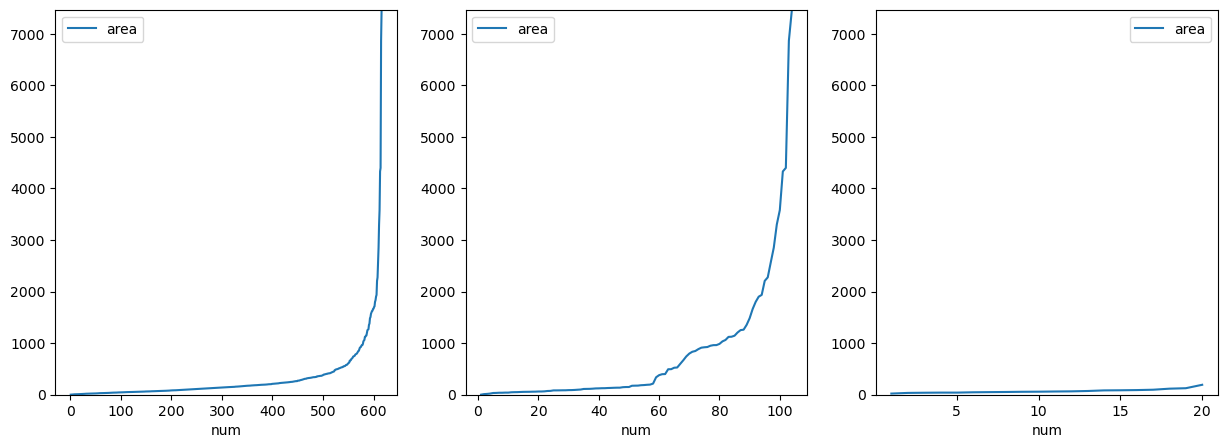

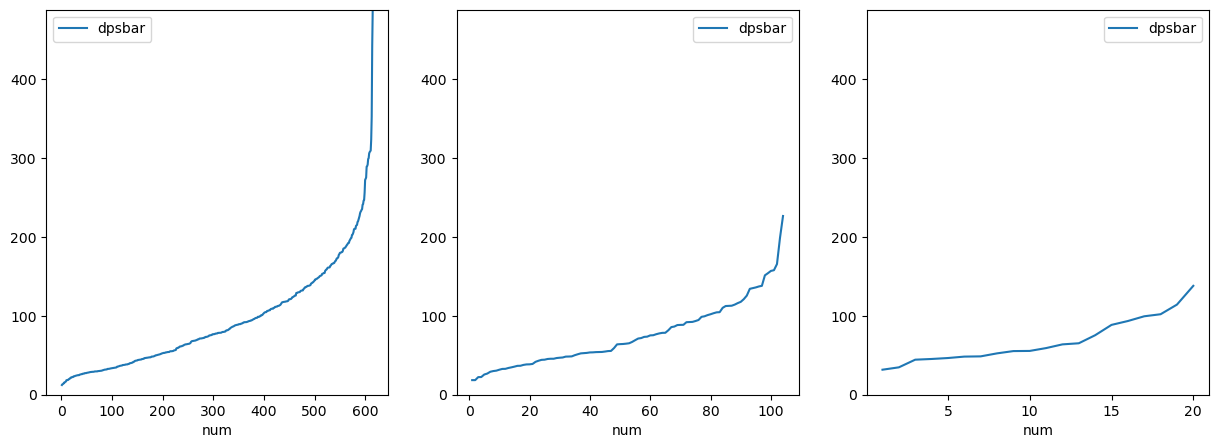

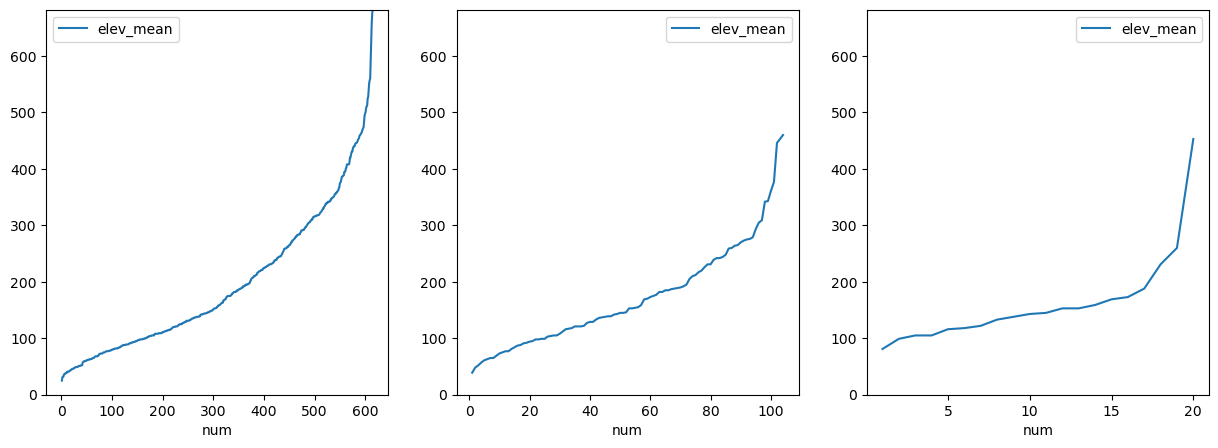

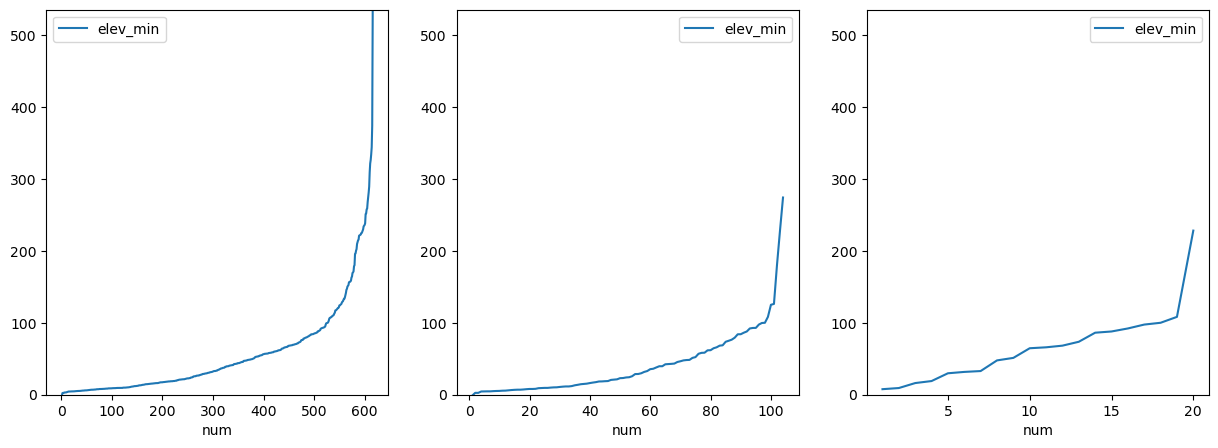

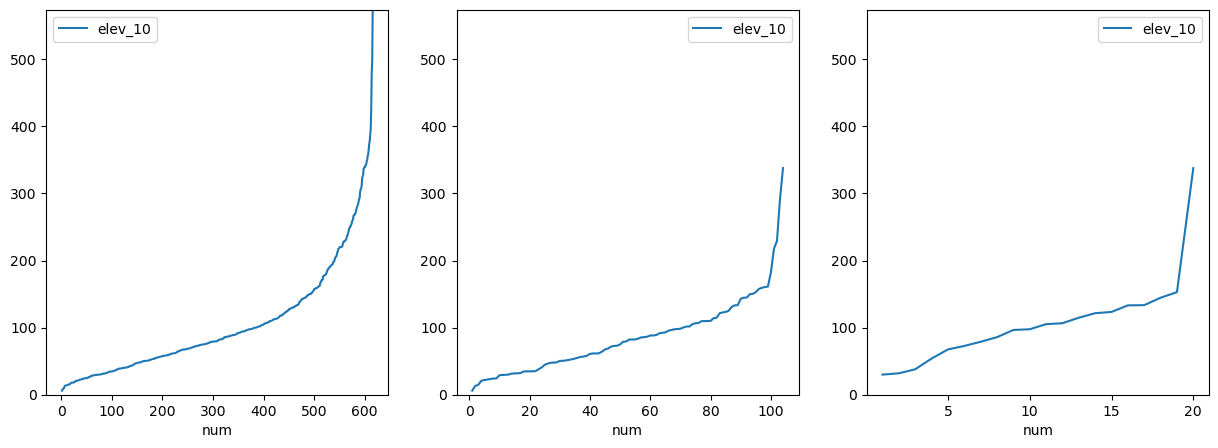

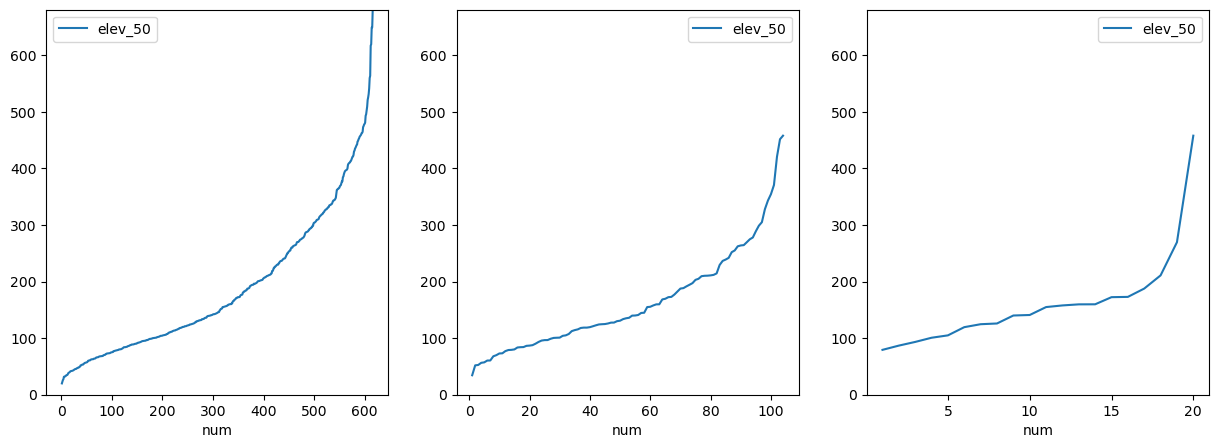

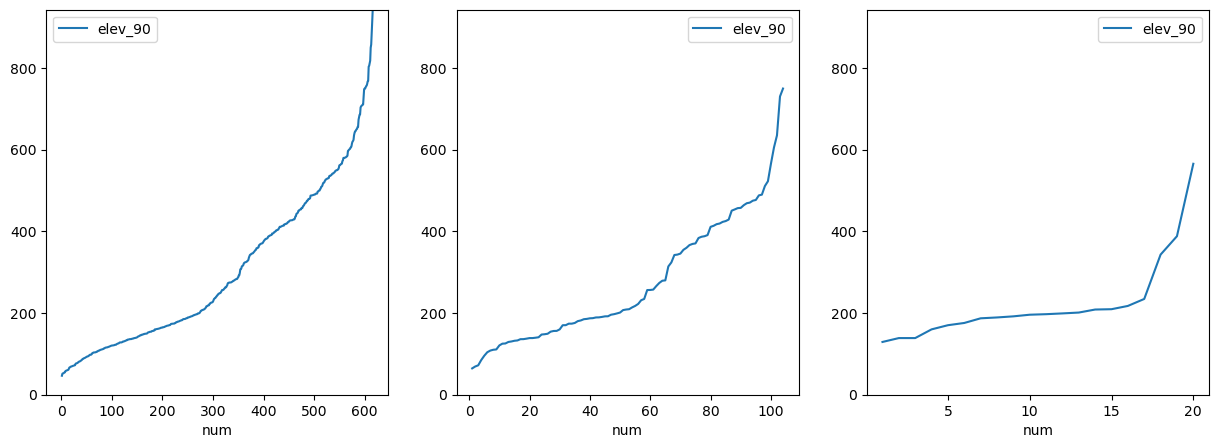

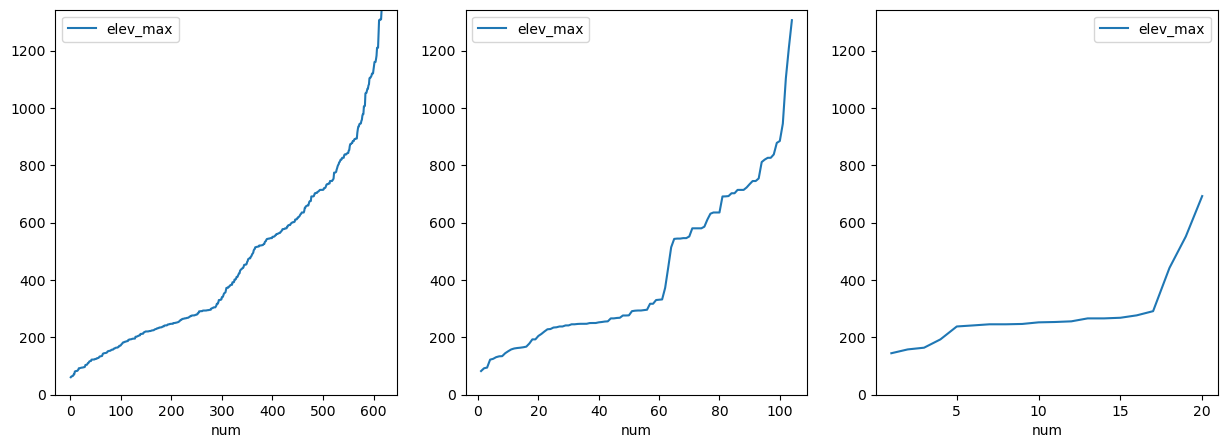

In [227]:
df = pd.read_csv(topo_file, index_col='gauge_id')

gdf_all = gdf_results[gdf_results.kge_np  < 1]
gdf_all = gdf_all['kge_np'].to_frame()
gdf_all = gdf_all.join(df)

gdf_small = gdf_results[gdf_results.kge_np  < 0]
gdf_small = gdf_small['kge_np'].to_frame()
gdf_small = gdf_small.join(df)

gdf_low = gdf_results[gdf_results.kge_np  < -1]
gdf_low = gdf_low['kge_np'].to_frame()
gdf_low = gdf_low.join(df)

columns = ['area', 'dpsbar','elev_mean', 'elev_min','elev_10','elev_50','elev_90','elev_max'] 

for column in columns:
    fig, axes = plt.subplots(1,3,figsize=(15, 5))

    gdf_all = gdf_all.sort_values(by=column)
    gdf_all['num'] = list(range(1,len(gdf_all)+1))
    gdf_all = gdf_all.set_index('num')
    gdf_all[column].plot(ax=axes[0],label=column).legend()
    
    gdf_small = gdf_small.sort_values(by=column)
    gdf_small['num'] = list(range(1,len(gdf_small)+1))
    gdf_small = gdf_small.set_index('num')
    gdf_small[column].plot(ax=axes[1],label=column).legend()
    
    #edfsdf
    gdf_low = gdf_low.sort_values(by=column)
    gdf_low['num'] = list(range(1,len(gdf_low)+1))
    gdf_low = gdf_low.set_index('num')
    gdf_low[column].plot(ax=axes[2],label=column).legend()
    
    axes[0].set_ylim([0, gdf_all[column].max()])
    axes[1].set_ylim([0, gdf_all[column].max()])
    axes[2].set_ylim([0, gdf_all[column].max()])
    
    plt.show()
    

# Land

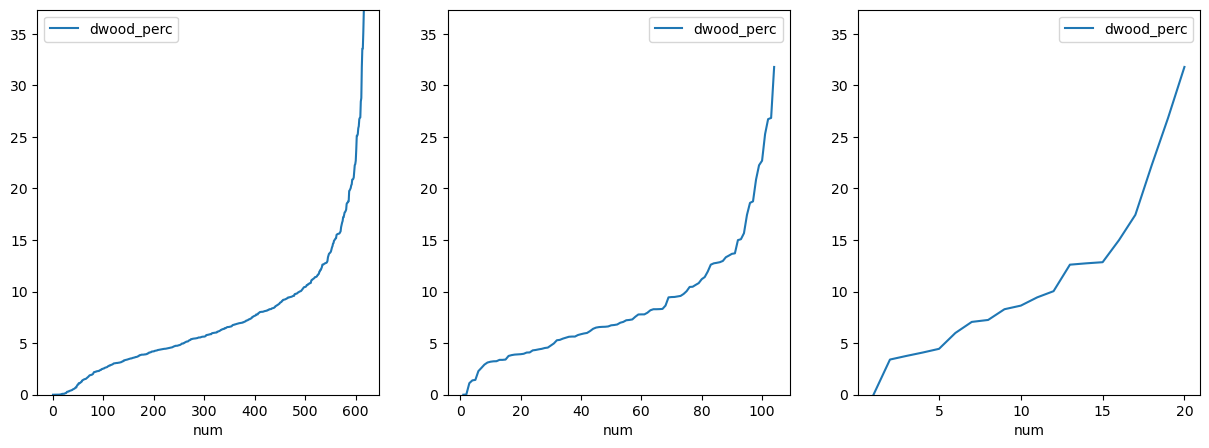

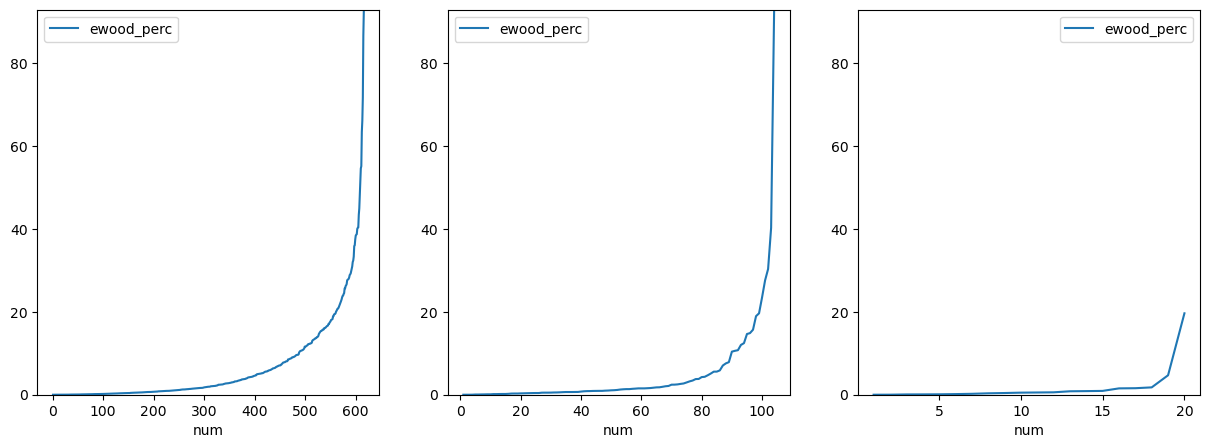

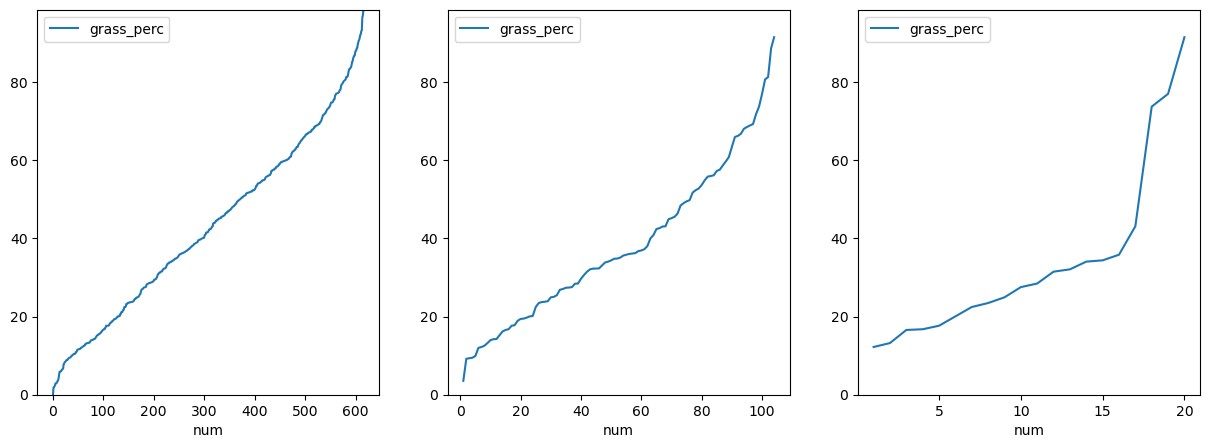

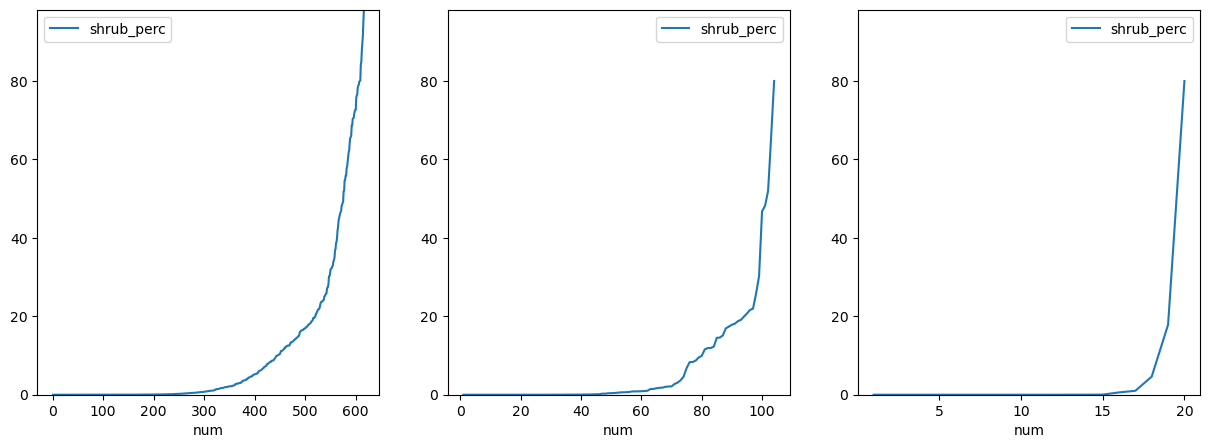

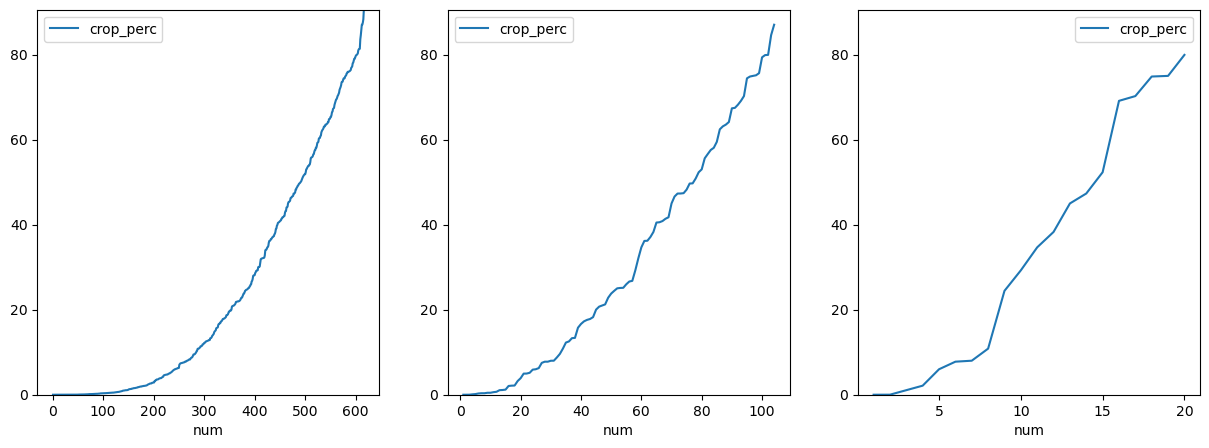

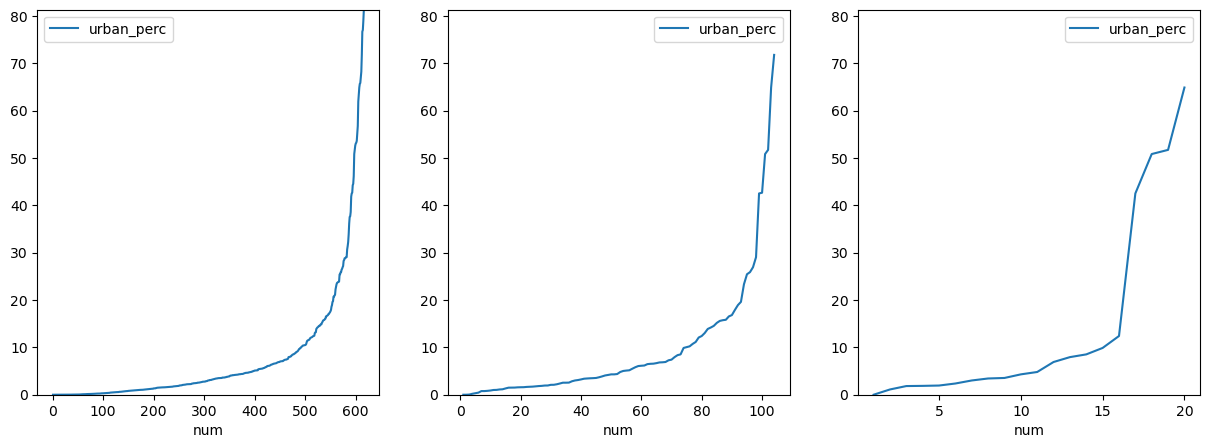

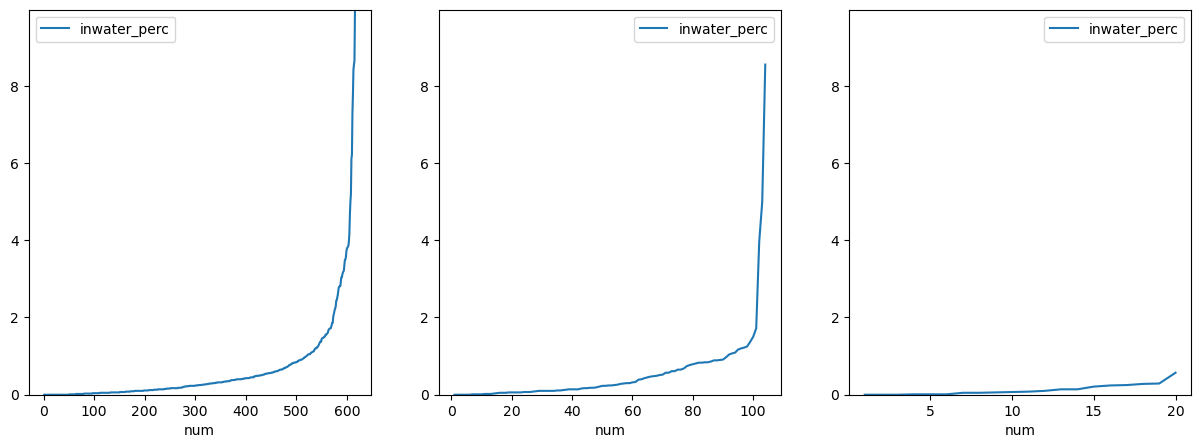

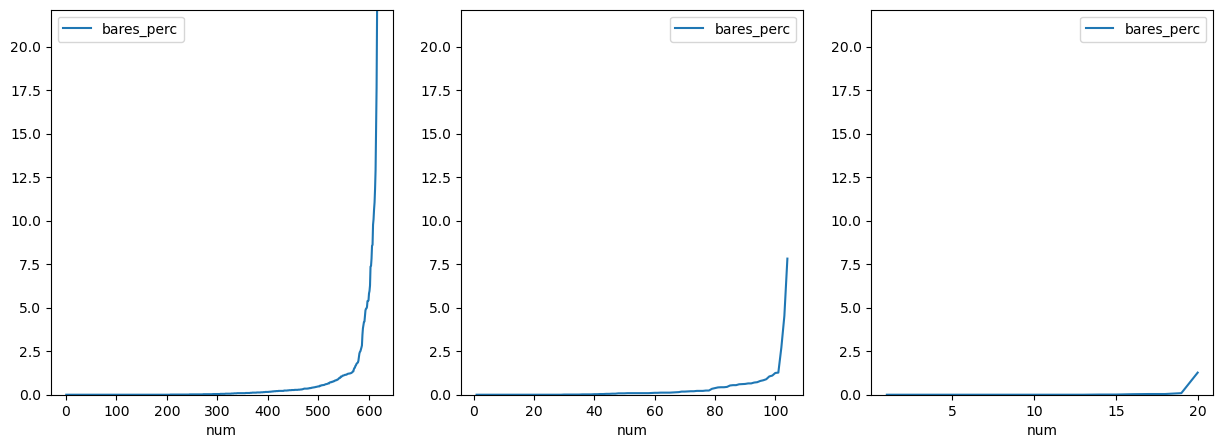

TypeError: no numeric data to plot

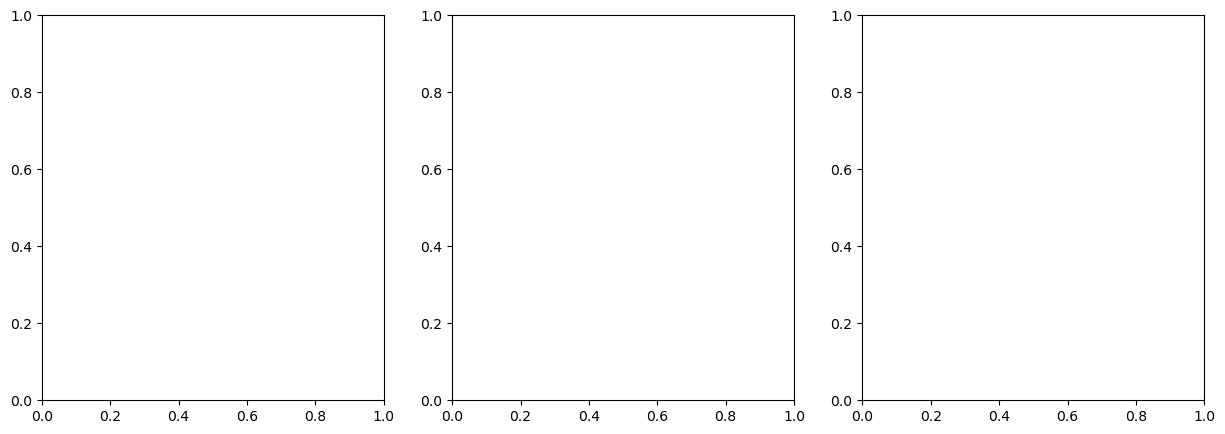

In [223]:
df = pd.read_csv(land_file, index_col='gauge_id')

gdf_all = gdf_results[gdf_results.kge_np  < 1]
gdf_all = gdf_all['kge_np'].to_frame()
gdf_all = gdf_all.join(df)

gdf_small = gdf_results[gdf_results.kge_np  < 0]
gdf_small = gdf_small['kge_np'].to_frame()
gdf_small = gdf_small.join(df)

gdf_low = gdf_results[gdf_results.kge_np  < -1]
gdf_low = gdf_low['kge_np'].to_frame()
gdf_low = gdf_low.join(df)

for column in df.columns:
    fig, axes = plt.subplots(1,3,figsize=(15, 5))

    gdf_all = gdf_all.sort_values(by=column)
    gdf_all['num'] = list(range(1,len(gdf_all)+1))
    gdf_all = gdf_all.set_index('num')
    gdf_all[column].plot(ax=axes[0],label=column).legend()
    
    gdf_small = gdf_small.sort_values(by=column)
    gdf_small['num'] = list(range(1,len(gdf_small)+1))
    gdf_small = gdf_small.set_index('num')
    gdf_small[column].plot(ax=axes[1],label=column).legend()
    
    #edfsdf
    gdf_low = gdf_low.sort_values(by=column)
    gdf_low['num'] = list(range(1,len(gdf_low)+1))
    gdf_low = gdf_low.set_index('num')
    gdf_low[column].plot(ax=axes[2],label=column).legend()
    
    axes[0].set_ylim([0, gdf_all[column].max()])
    axes[1].set_ylim([0, gdf_all[column].max()])
    axes[2].set_ylim([0, gdf_all[column].max()])
    
    plt.show()
    

# hydrologic

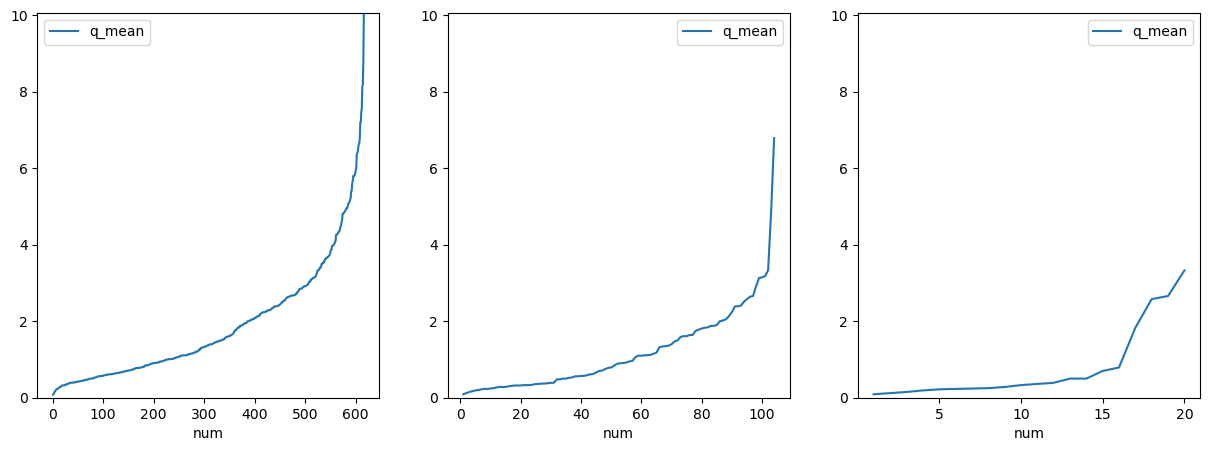

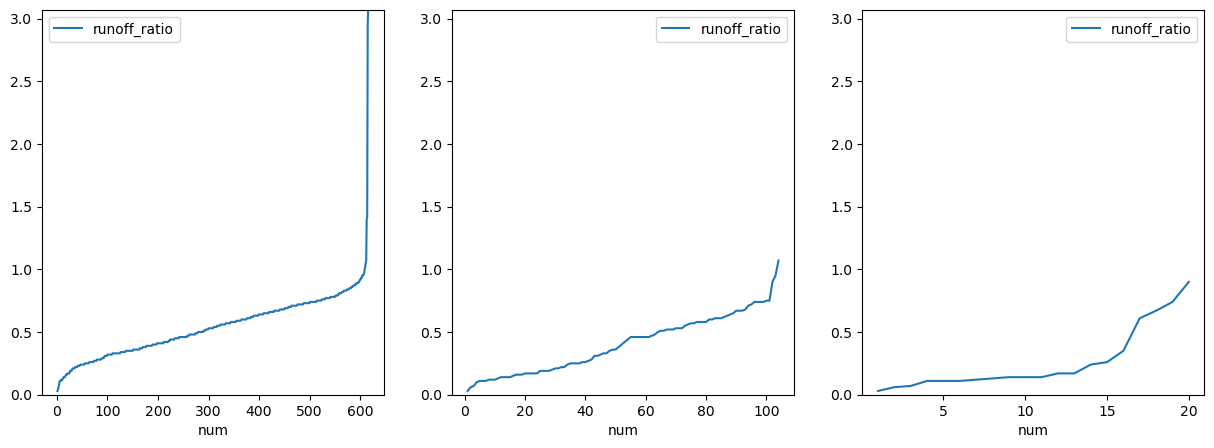

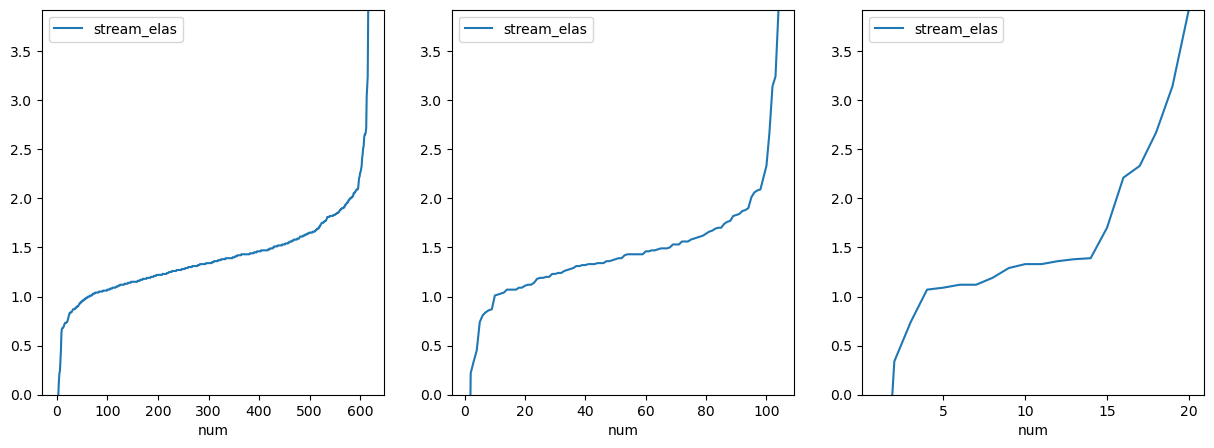

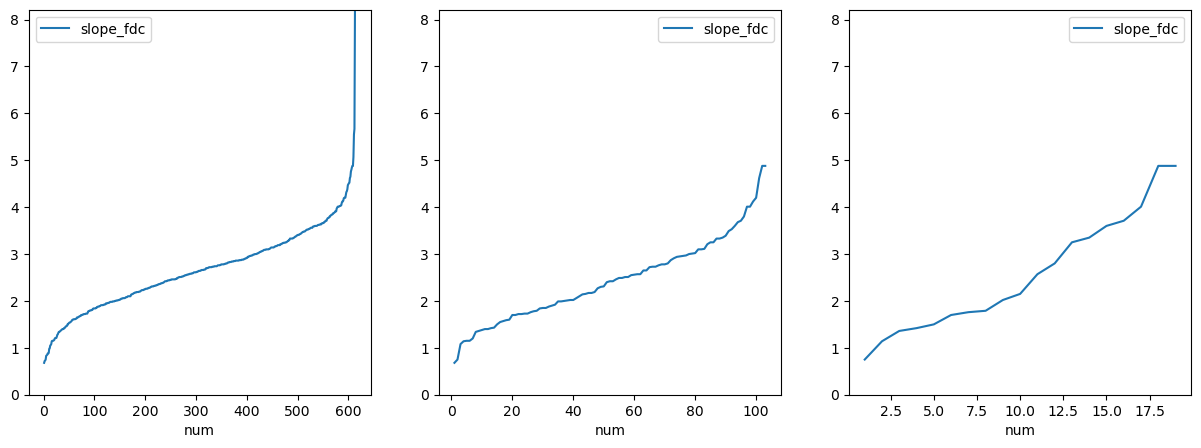

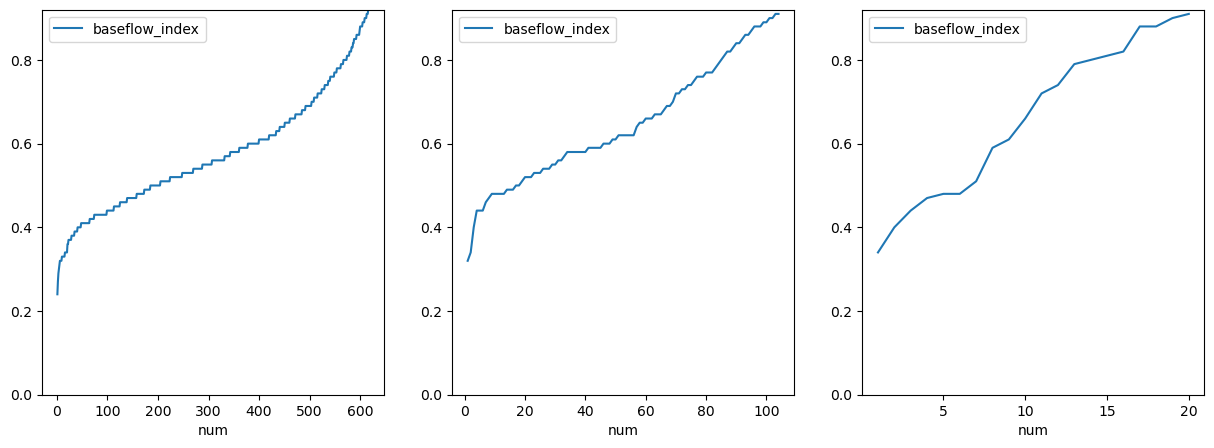

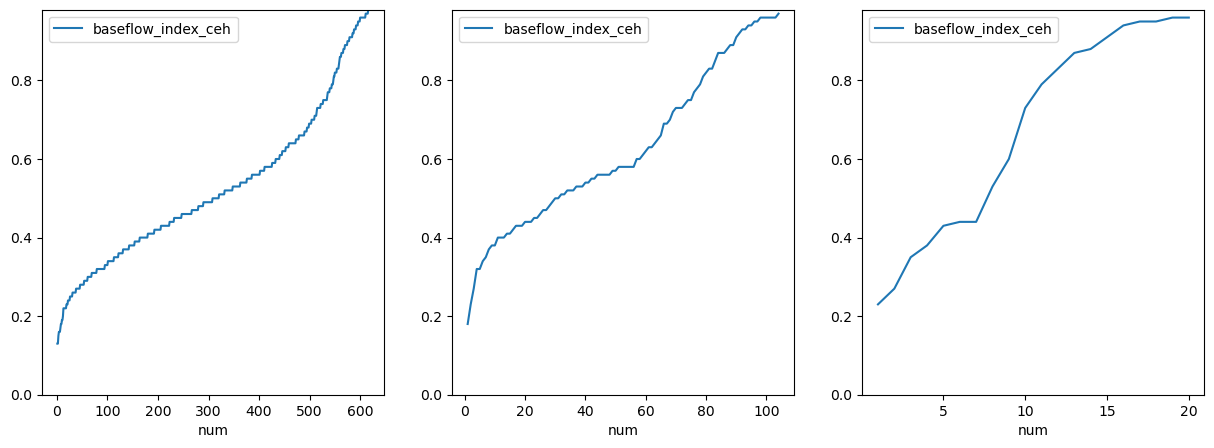

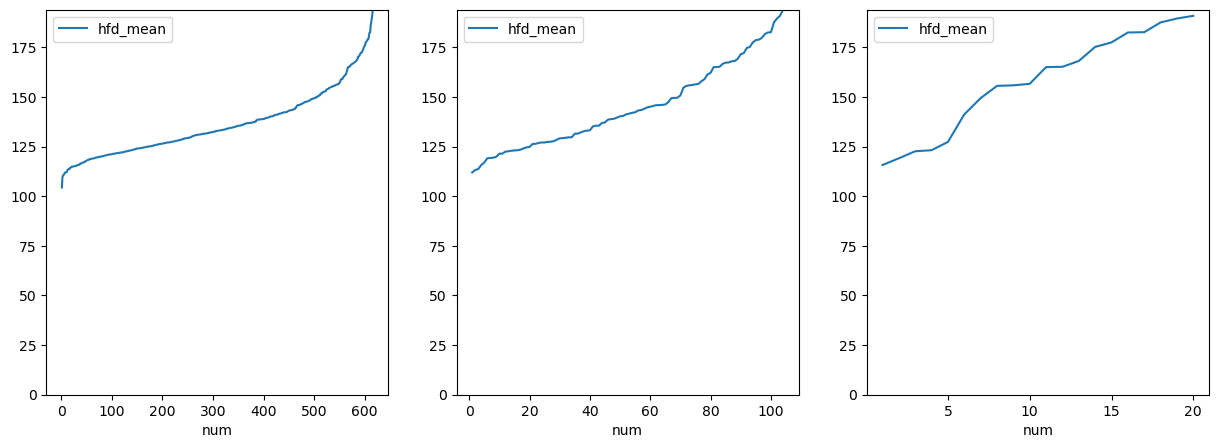

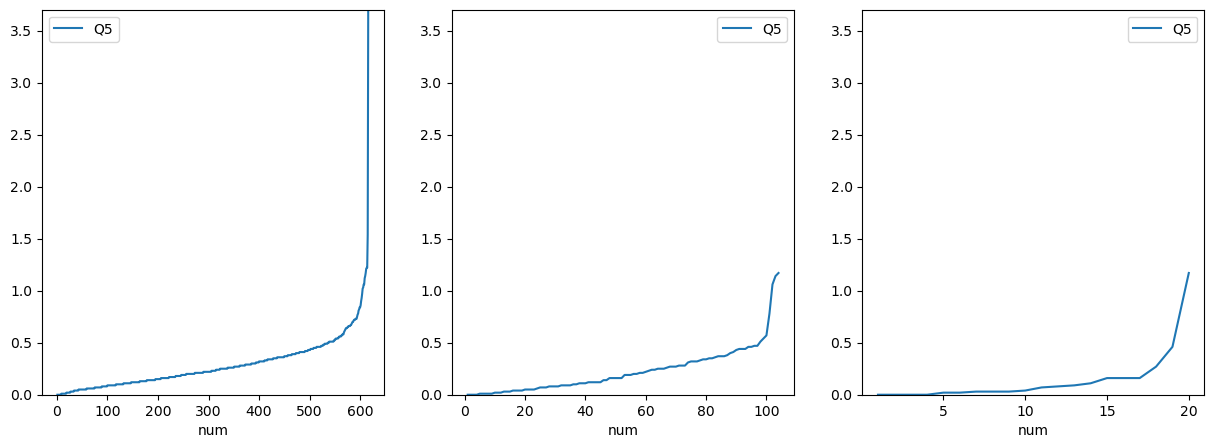

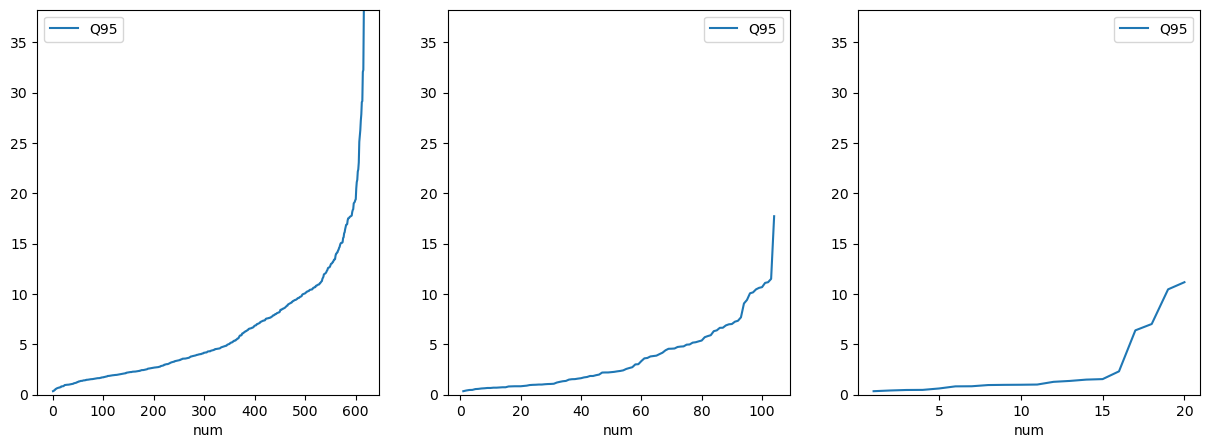

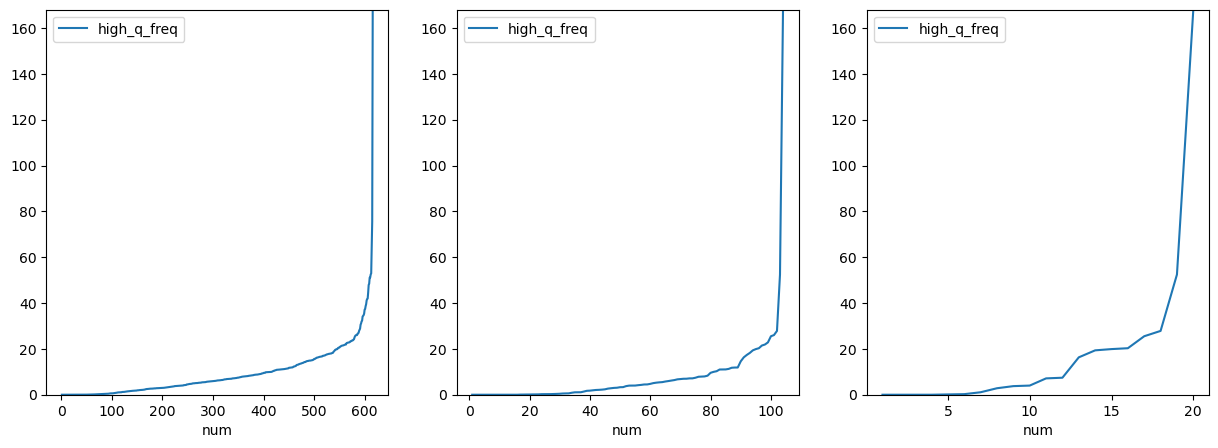

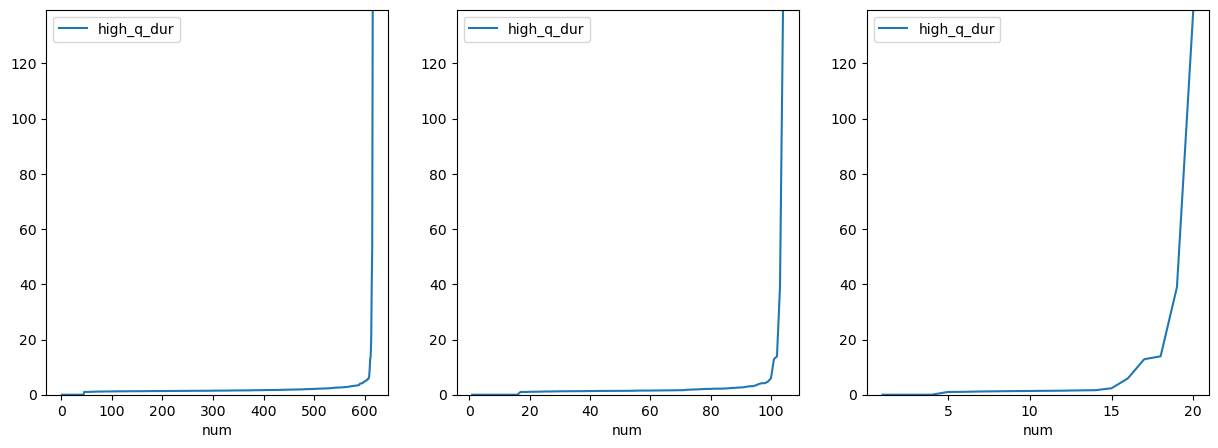

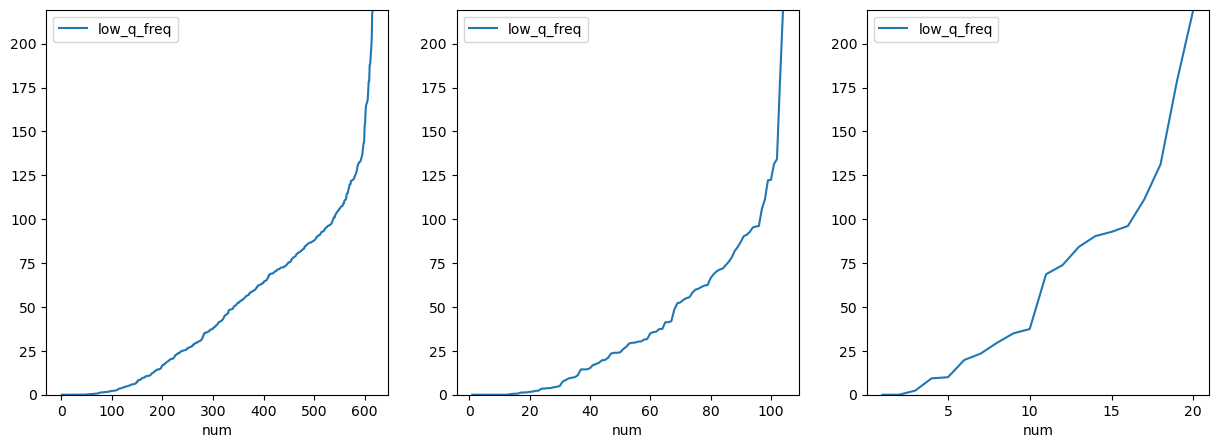

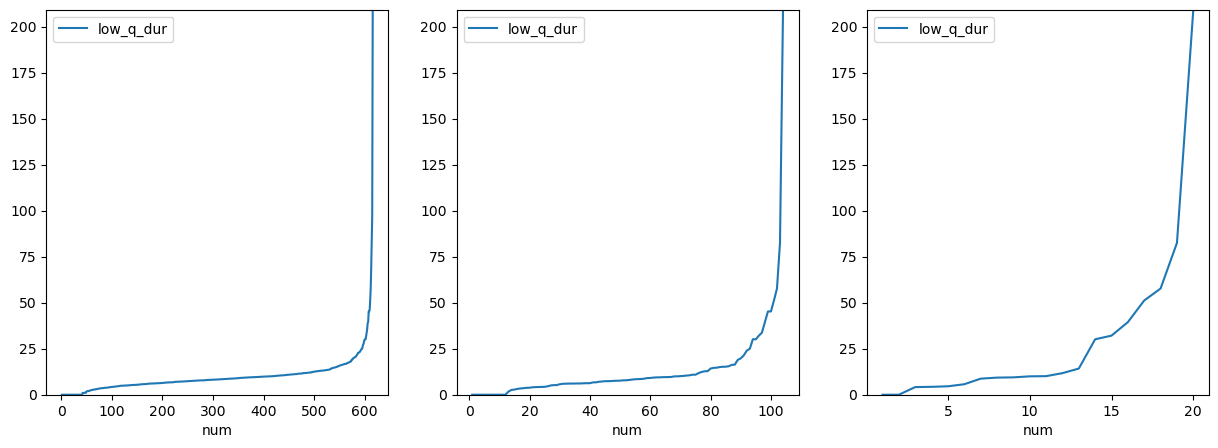

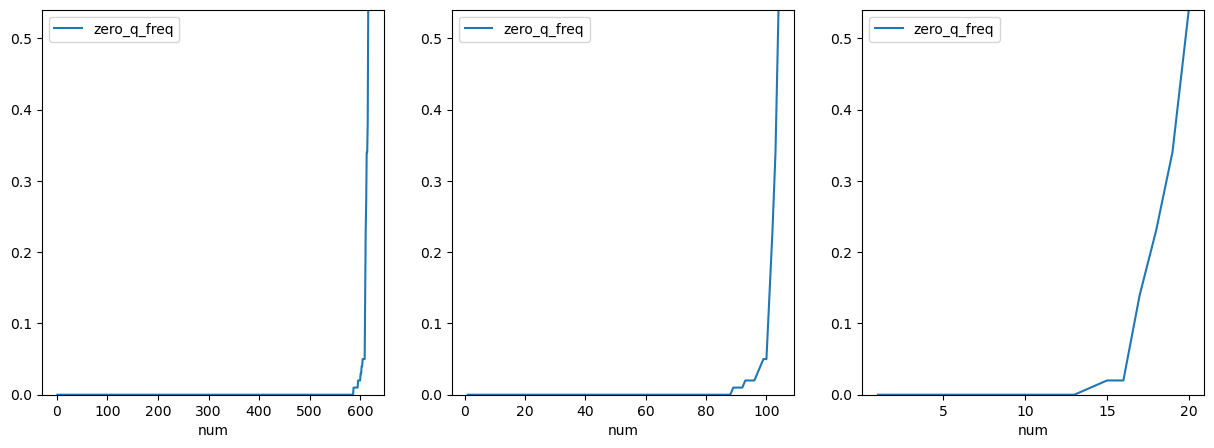

In [221]:
df = pd.read_csv(hydro_file, index_col='gauge_id')

gdf_all = gdf_results[gdf_results.kge_np  < 1]
gdf_all = gdf_all['kge_np'].to_frame()
gdf_all = gdf_all.join(df)

gdf_small = gdf_results[gdf_results.kge_np  < 0]
gdf_small = gdf_small['kge_np'].to_frame()
gdf_small = gdf_small.join(df)

gdf_low = gdf_results[gdf_results.kge_np  < -1]
gdf_low = gdf_low['kge_np'].to_frame()
gdf_low = gdf_low.join(df)

for column in df_hydro.columns:
    fig, axes = plt.subplots(1,3,figsize=(15, 5))

    gdf_all = gdf_all.sort_values(by=column)
    gdf_all['num'] = list(range(1,len(gdf_all)+1))
    gdf_all = gdf_all.set_index('num')
    gdf_all[column].plot(ax=axes[0],label=column).legend()
    
    gdf_small = gdf_small.sort_values(by=column)
    gdf_small['num'] = list(range(1,len(gdf_small)+1))
    gdf_small = gdf_small.set_index('num')
    gdf_small[column].plot(ax=axes[1],label=column).legend()
    
    #edfsdf
    gdf_low = gdf_low.sort_values(by=column)
    gdf_low['num'] = list(range(1,len(gdf_low)+1))
    gdf_low = gdf_low.set_index('num')
    gdf_low[column].plot(ax=axes[2],label=column).legend()
    
    axes[0].set_ylim([0, gdf_all[column].max()])
    axes[1].set_ylim([0, gdf_all[column].max()])
    axes[2].set_ylim([0, gdf_all[column].max()])
    
    plt.show()
    

# Hydrometry

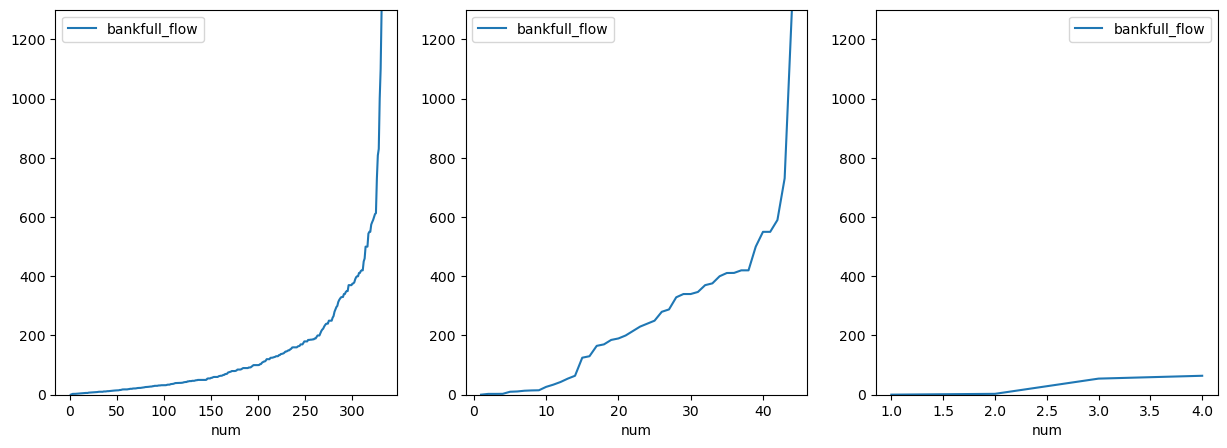

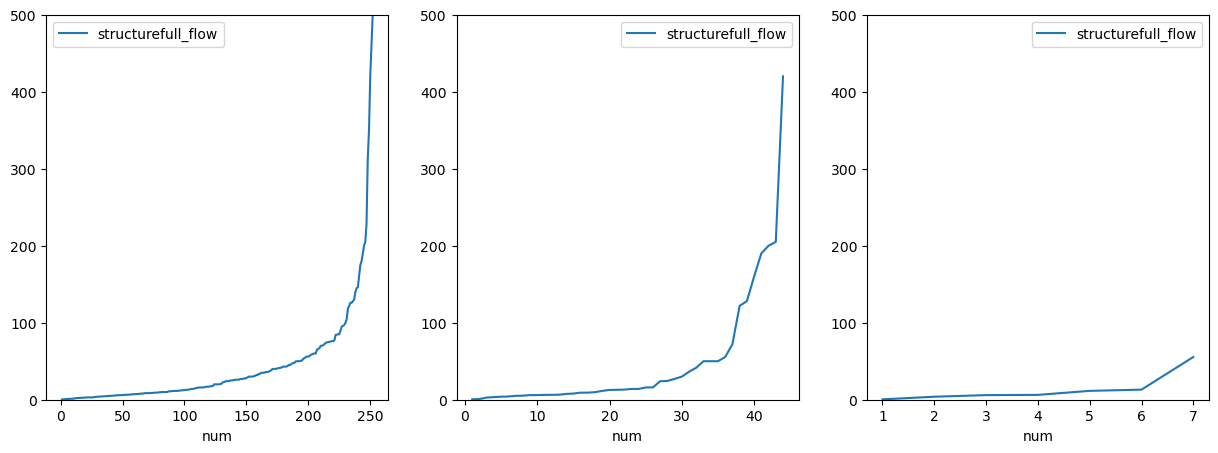

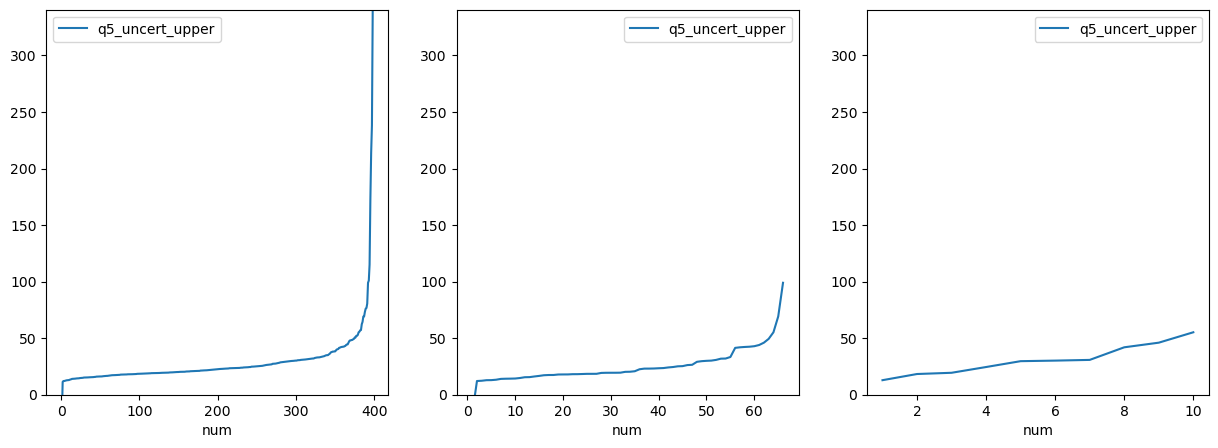

/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:43: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:44: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[2].set_ylim([0, gdf_all[column].max()])


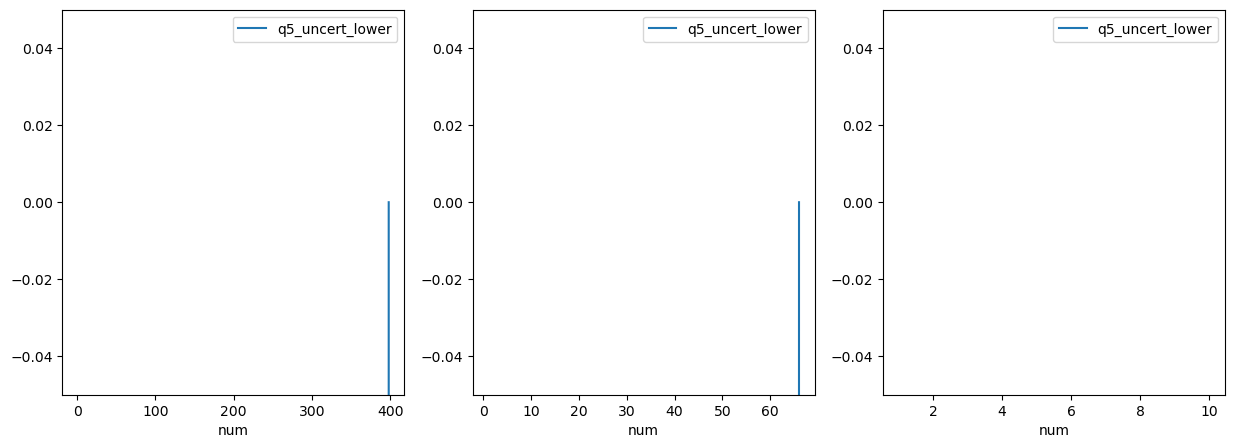

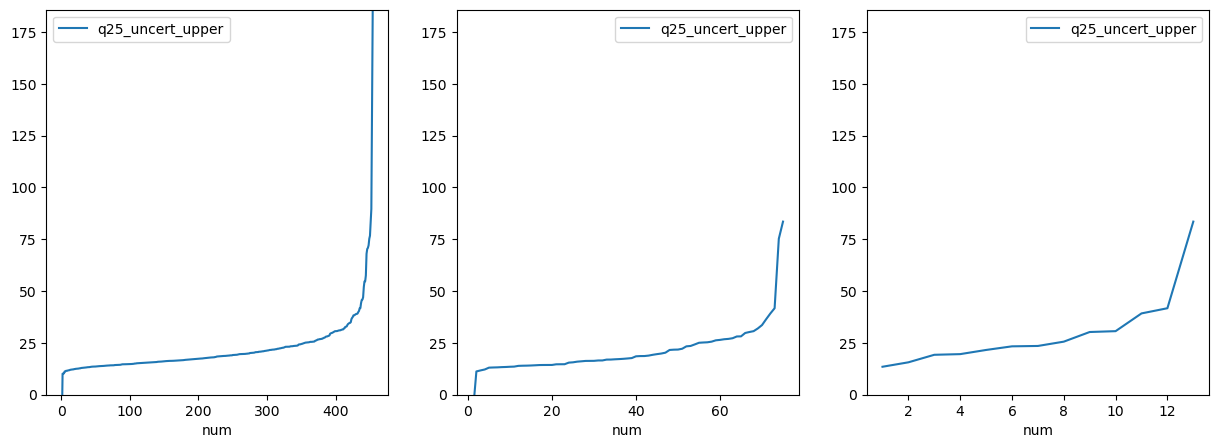

/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:43: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:44: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[2].set_ylim([0, gdf_all[column].max()])


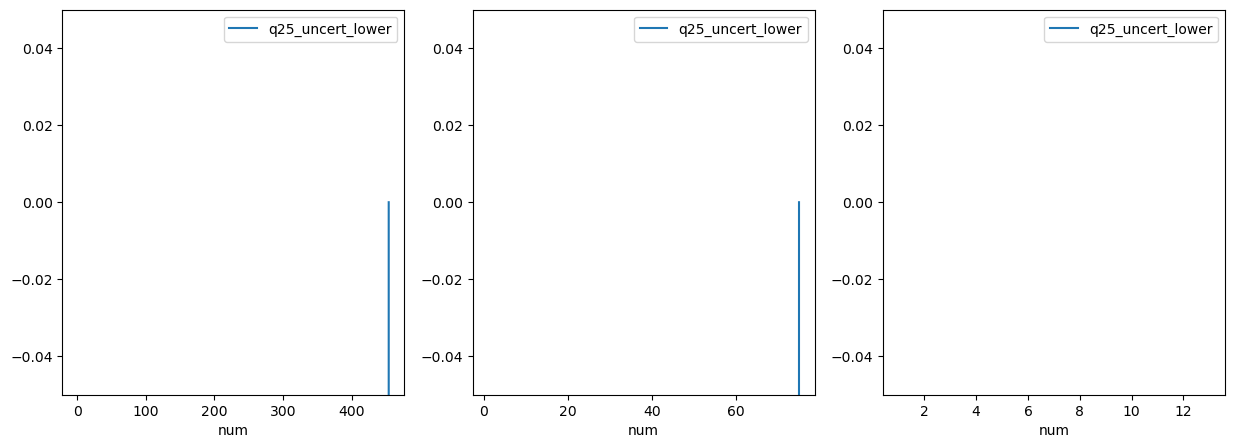

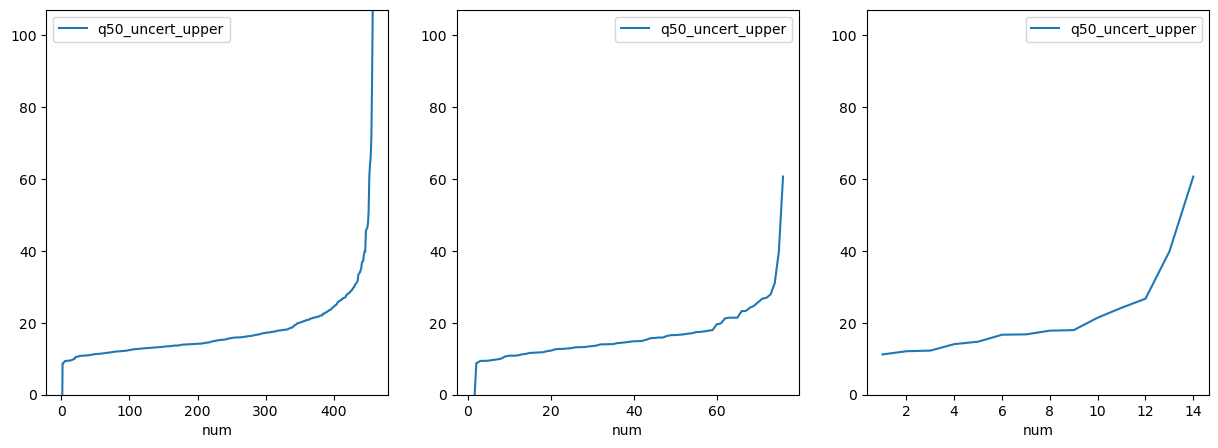

/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:43: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:44: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[2].set_ylim([0, gdf_all[column].max()])


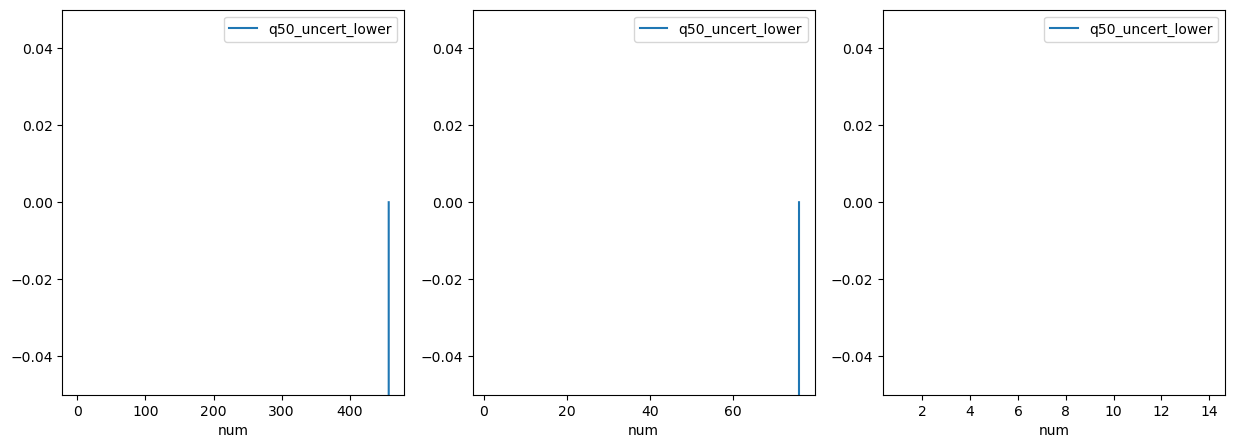

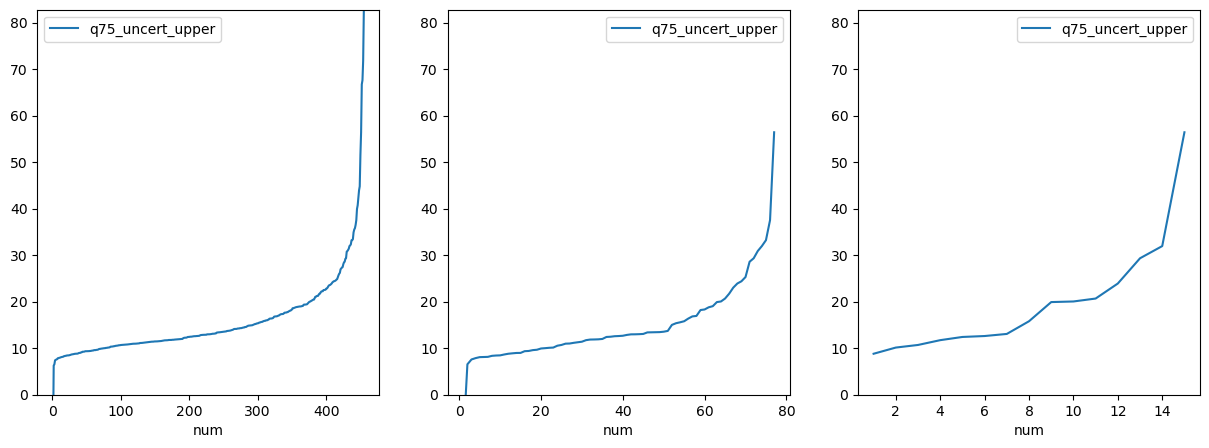

/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:43: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:44: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[2].set_ylim([0, gdf_all[column].max()])


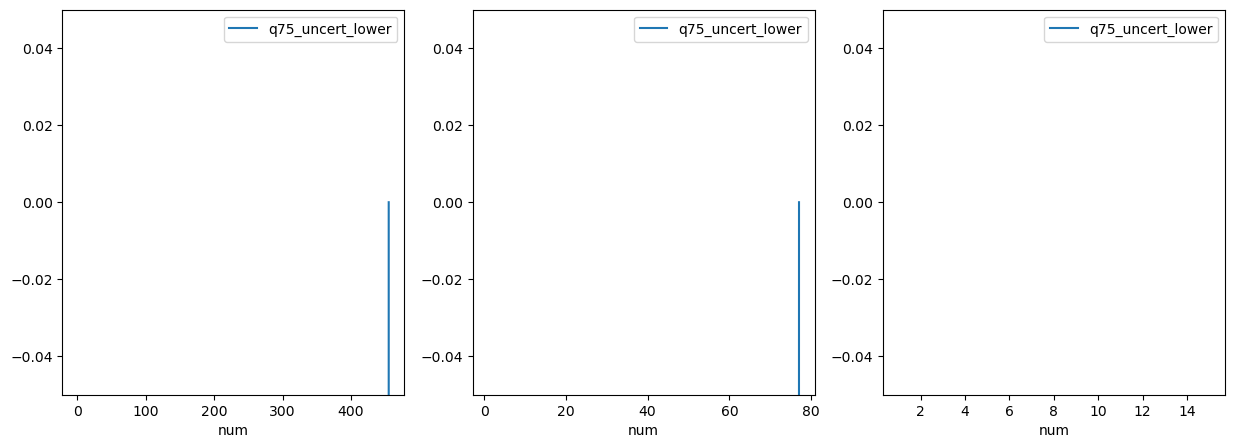

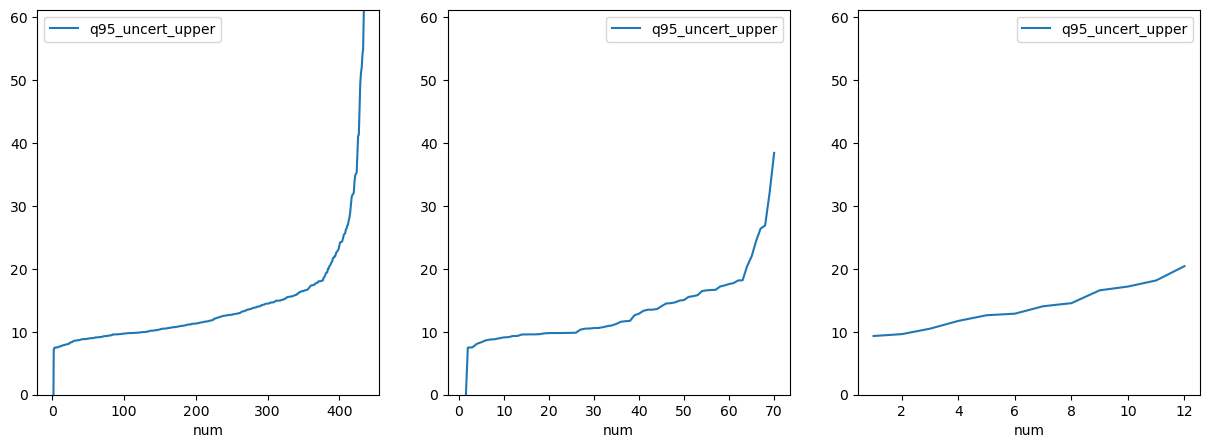

/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:43: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:44: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[2].set_ylim([0, gdf_all[column].max()])


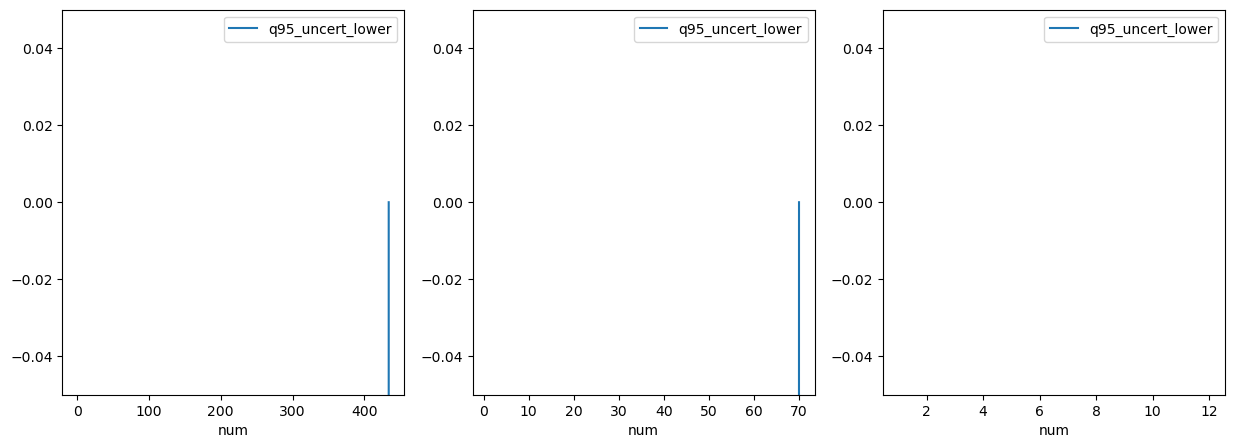

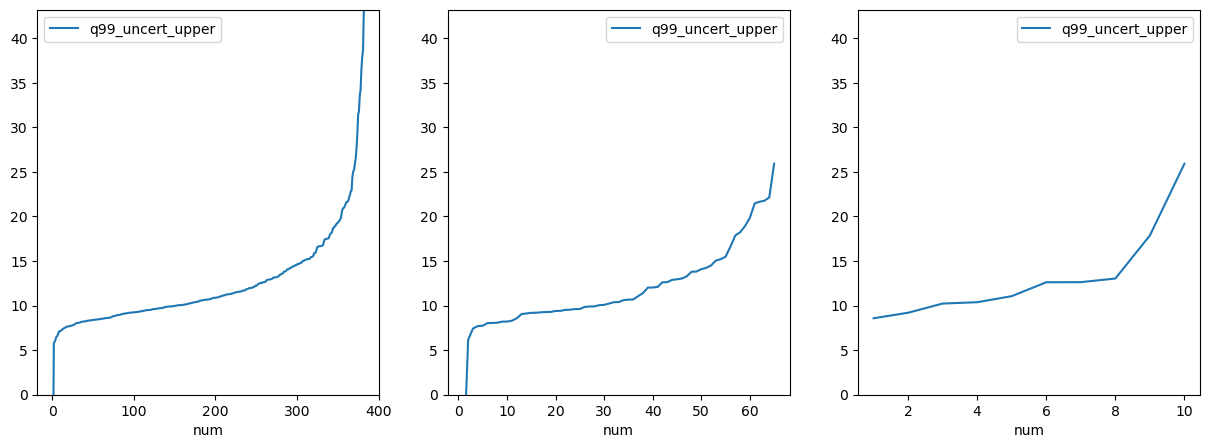

/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[0].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:43: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[1].set_ylim([0, gdf_all[column].max()])
/scratch-local/jaerts.1636796/ipykernel_2007344/1128627239.py:44: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[2].set_ylim([0, gdf_all[column].max()])


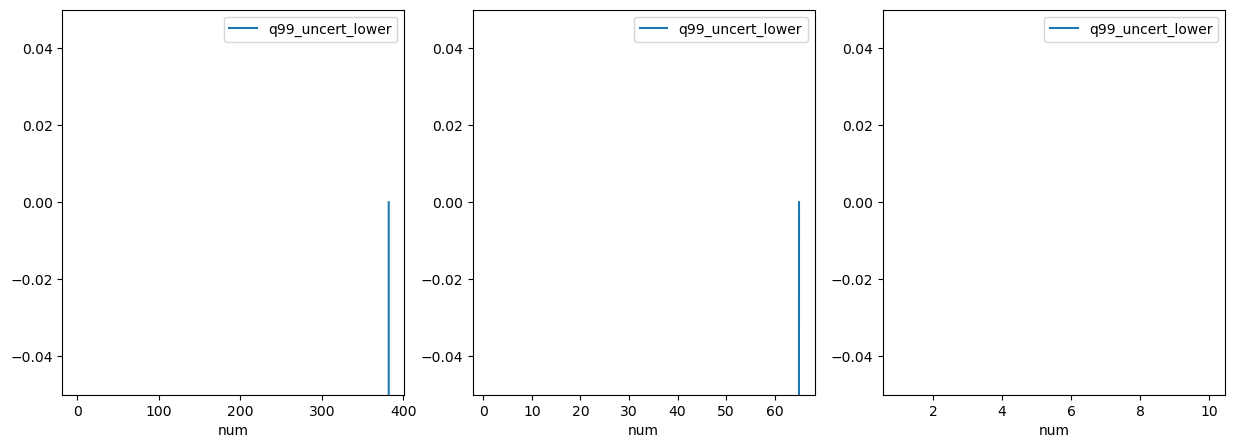

In [239]:
df = pd.read_csv(hydrometry_file, index_col='gauge_id')

gdf_all = gdf_results[gdf_results.kge_np  < 1]
gdf_all = gdf_all['kge_np'].to_frame()
gdf_all = gdf_all.join(df)

gdf_small = gdf_results[gdf_results.kge_np  < 0]
gdf_small = gdf_small['kge_np'].to_frame()
gdf_small = gdf_small.join(df)

gdf_low = gdf_results[gdf_results.kge_np  < -1]
gdf_low = gdf_low['kge_np'].to_frame()
gdf_low = gdf_low.join(df)

columns = [
       'bankfull_flow', 'structurefull_flow',
       'q5_uncert_upper', 'q5_uncert_lower', 'q25_uncert_upper',
       'q25_uncert_lower', 'q50_uncert_upper', 'q50_uncert_lower',
       'q75_uncert_upper', 'q75_uncert_lower', 'q95_uncert_upper',
       'q95_uncert_lower', 'q99_uncert_upper', 'q99_uncert_lower',
       ]

for column in columns:
    fig, axes = plt.subplots(1,3,figsize=(15, 5))

    gdf_all = gdf_all.sort_values(by=column)
    gdf_all['num'] = list(range(1,len(gdf_all)+1))
    gdf_all = gdf_all.set_index('num')
    gdf_all[column].plot(ax=axes[0],label=column).legend()
    
    gdf_small = gdf_small.sort_values(by=column)
    gdf_small['num'] = list(range(1,len(gdf_small)+1))
    gdf_small = gdf_small.set_index('num')
    gdf_small[column].plot(ax=axes[1],label=column).legend()
    
    #edfsdf
    gdf_low = gdf_low.sort_values(by=column)
    gdf_low['num'] = list(range(1,len(gdf_low)+1))
    gdf_low = gdf_low.set_index('num')
    gdf_low[column].plot(ax=axes[2],label=column).legend()
    
    axes[0].set_ylim([0, gdf_all[column].max()])
    axes[1].set_ylim([0, gdf_all[column].max()])
    axes[2].set_ylim([0, gdf_all[column].max()])
    
    plt.show()
    

# Climate

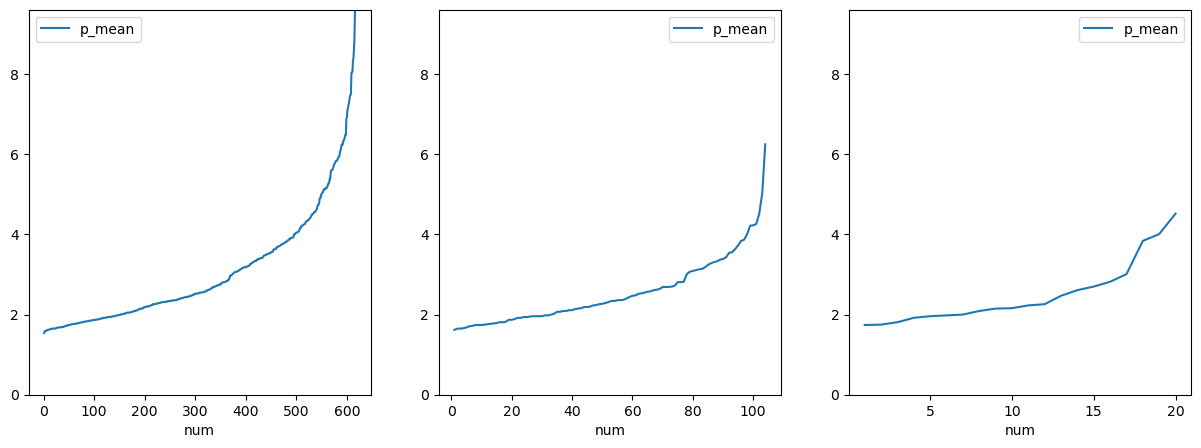

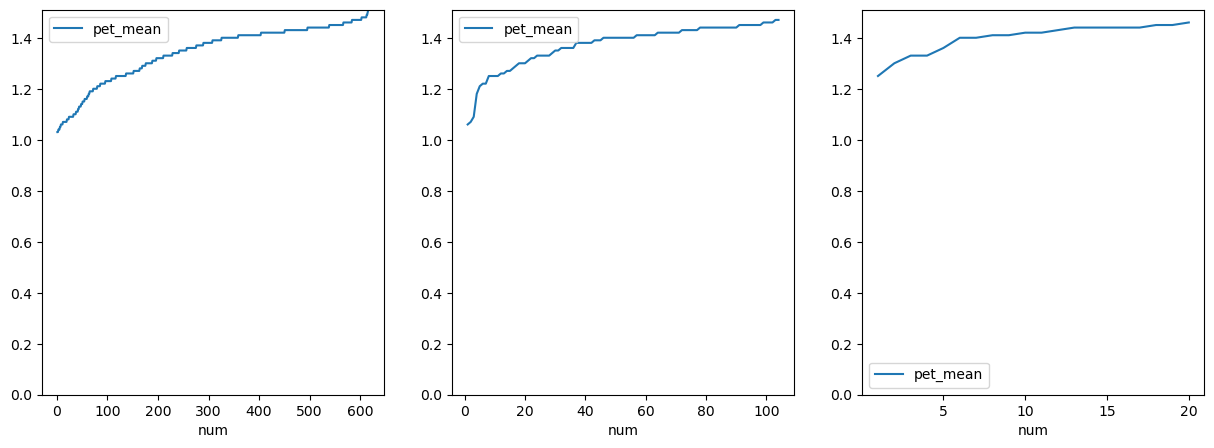

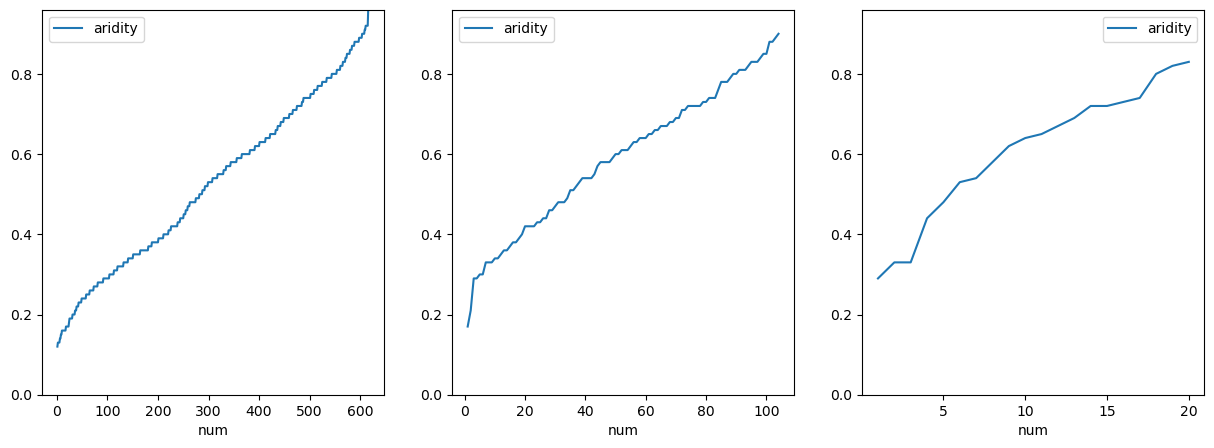

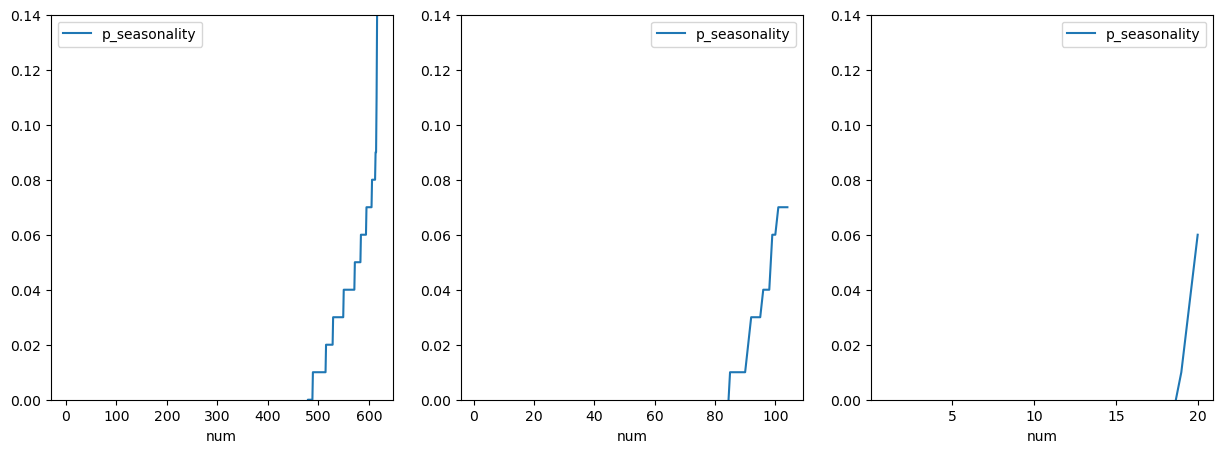

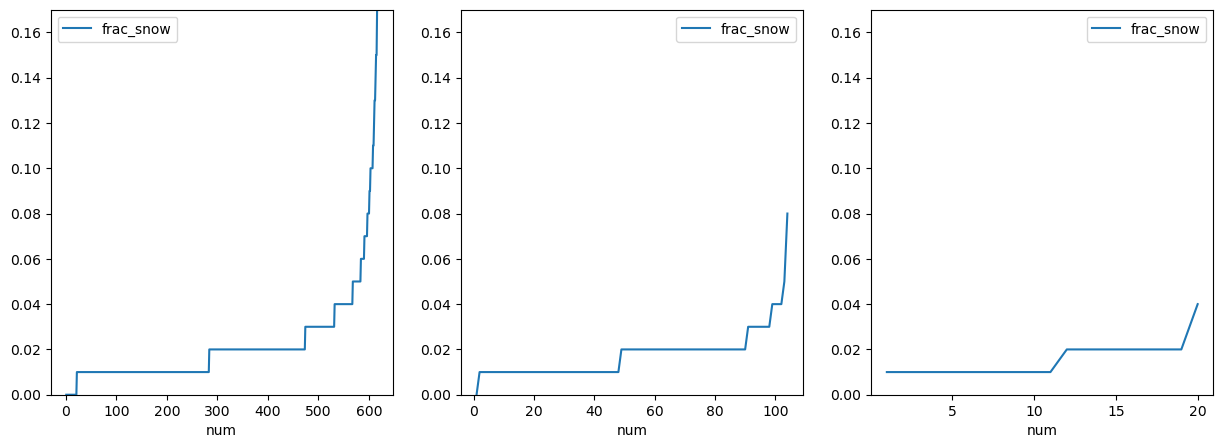

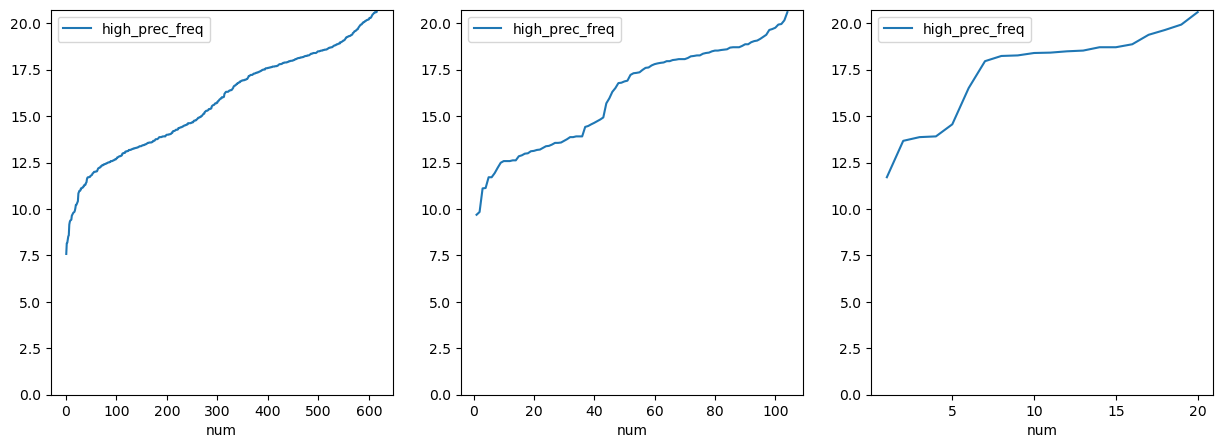

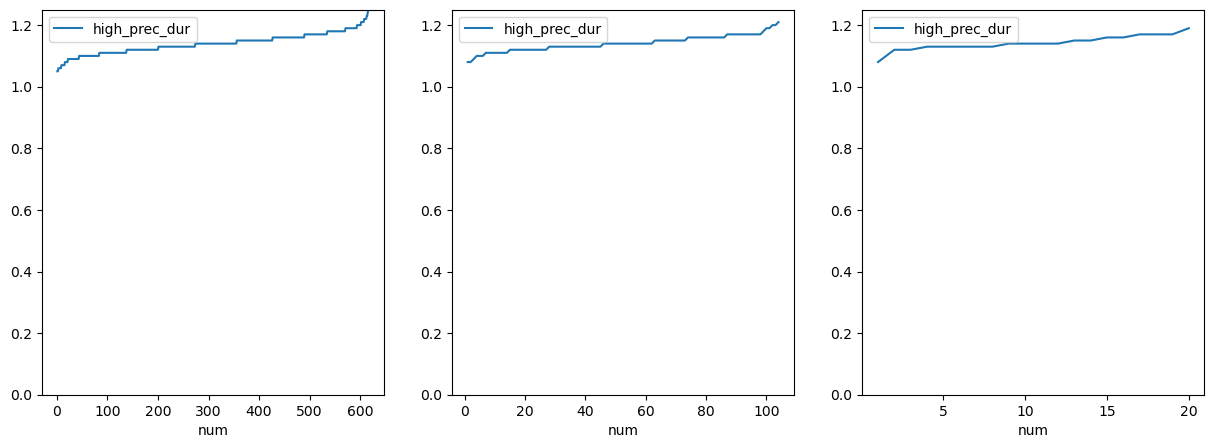

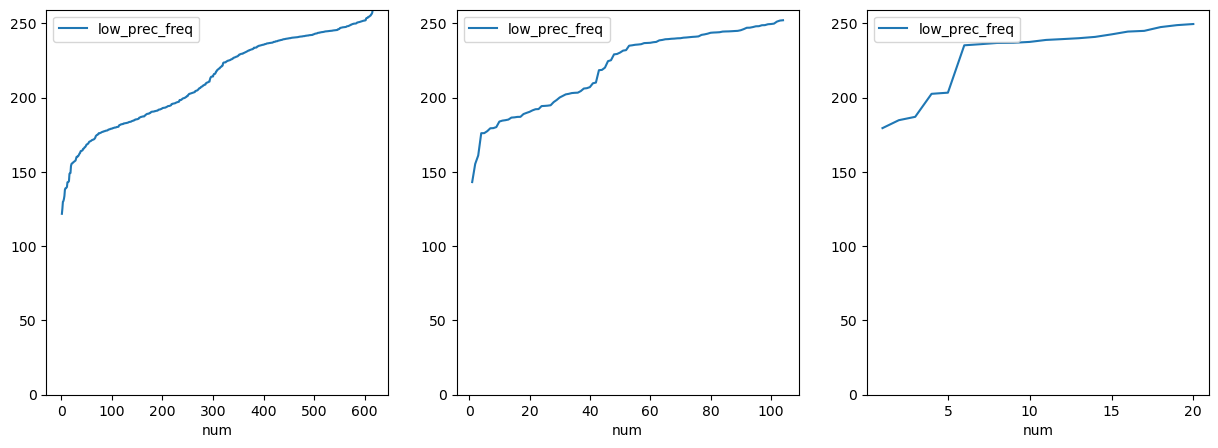

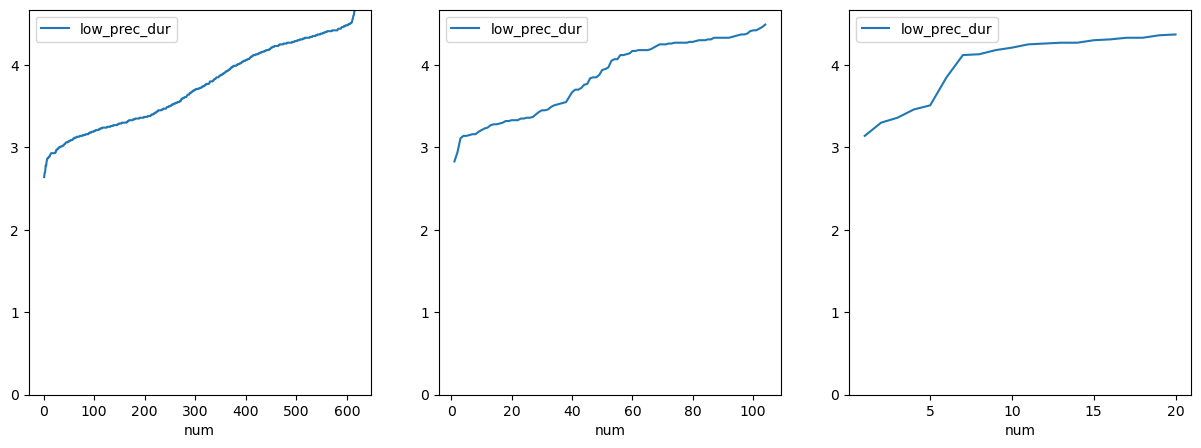

In [249]:
df = pd.read_csv(climate_file, index_col='gauge_id')

gdf_all = gdf_results[gdf_results.kge_np  < 1]
gdf_all = gdf_all['kge_np'].to_frame()
gdf_all = gdf_all.join(df)

gdf_small = gdf_results[gdf_results.kge_np  < 0]
gdf_small = gdf_small['kge_np'].to_frame()
gdf_small = gdf_small.join(df)

gdf_low = gdf_results[gdf_results.kge_np  < -1]
gdf_low = gdf_low['kge_np'].to_frame()
gdf_low = gdf_low.join(df)

columns = ['p_mean', 'pet_mean', 'aridity', 'p_seasonality', 'frac_snow',
       'high_prec_freq', 'high_prec_dur','low_prec_freq',
       'low_prec_dur']

for column in columns:
    fig, axes = plt.subplots(1,3,figsize=(15, 5))

    gdf_all = gdf_all.sort_values(by=column)
    gdf_all['num'] = list(range(1,len(gdf_all)+1))
    gdf_all = gdf_all.set_index('num')
    gdf_all[column].plot(ax=axes[0],label=column).legend()
    
    gdf_small = gdf_small.sort_values(by=column)
    gdf_small['num'] = list(range(1,len(gdf_small)+1))
    gdf_small = gdf_small.set_index('num')
    gdf_small[column].plot(ax=axes[1],label=column).legend()
    
    #edfsdf
    gdf_low = gdf_low.sort_values(by=column)
    gdf_low['num'] = list(range(1,len(gdf_low)+1))
    gdf_low = gdf_low.set_index('num')
    gdf_low[column].plot(ax=axes[2],label=column).legend()
    
    axes[0].set_ylim([0, gdf_all[column].max()])
    axes[1].set_ylim([0, gdf_all[column].max()])
    axes[2].set_ylim([0, gdf_all[column].max()])
    
    plt.show()
    